# Introduction

## Air Quality Prediction Report<br>
### A Machine Learning-Based Analysis of Air Quality Index

Air quality plays a crucial role in environmental health, affecting human well-being and the quality of life. To analyze and understand air pollution trends, this study utilizes data provided by the Iranian Environmental Organization. The dataset includes metrics for major pollutants and the Air Quality Index (AQI) as the target variable, enabling the classification and prediction of pollution levels.

# EDA

In [31]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [32]:
df = pd.read_csv('Iran_airquality_1396.csv')
df

استان               ایستگاه     CO    O3   NO2   SO2  PM10  PM2.5  شاخص  \
0     البرز                اشتهارد  25.0  50.0  52.0  29.0  19.0   48.0    50   
1     البرز                  فردیس  42.0  54.0  52.0  21.0  80.0  105.0   105   
2     البرز               مترو کرج  40.0  50.0  38.0  27.0  52.0   59.0    59   
3     البرز  دانشگاه محیط زیست کرج  11.0  50.0  45.0  26.0  54.0   91.0    54   
4     البرز     فرمانداری ساوجبلاغ  46.0  50.0  37.0  27.0  52.0   54.0    54   
...     ...                    ...   ...   ...   ...   ...   ...    ...   ...   
2118    یزد                   میبد  34.0  34.0  30.0  23.0  51.0   52.0    52   
2119    یزد                  مهریز  35.0  44.0  39.0  22.0  69.0   84.0    69   
2120    یزد       یزد - میدان صنعت  19.0   3.0  50.0   3.0   9.0   16.0    19   
2121    یزد                   میبد  34.0  34.0  30.0  23.0  51.0   52.0    52   
2122    یزد                  مهریز  36.0  45.0  39.0  22.0  71.0   86.0    71   

             تاریخ و ساعت  
0     1396/06/01 11:00:00  
1     1396/06/01 11:00:00  
2     1396/06/01 11:00:00  
3     1396/06/01 11:00:00  
4     1396/06/01 11:00:00  
...                   ...  
2118  1396/06/30 11:00:00  
2119  1396/06/30 11:00:00  
2120  1396/06/30 11:00:00  
2121  1396/06/31 11:00:00  
2122  1396/06/31 11:00:00  

[2123 rows x 10 columns]

The dataset contains records from 2123 air pollution monitoring stations and includes the following key pollutants:



CO Concentration (ppm): Carbon monoxide levels.

O3 Concentration (ppb): Ozone levels 

NO2 Concentration (ppb): Nitrogen dioxide levels.

SO2 Concentration (ppb): Sulfur dioxide levels.

PM10 Concentration (µg/m³): Coarse particulate matter levels.

PM2.5 Concentration (µg/m³): Fine particulate matter levels.

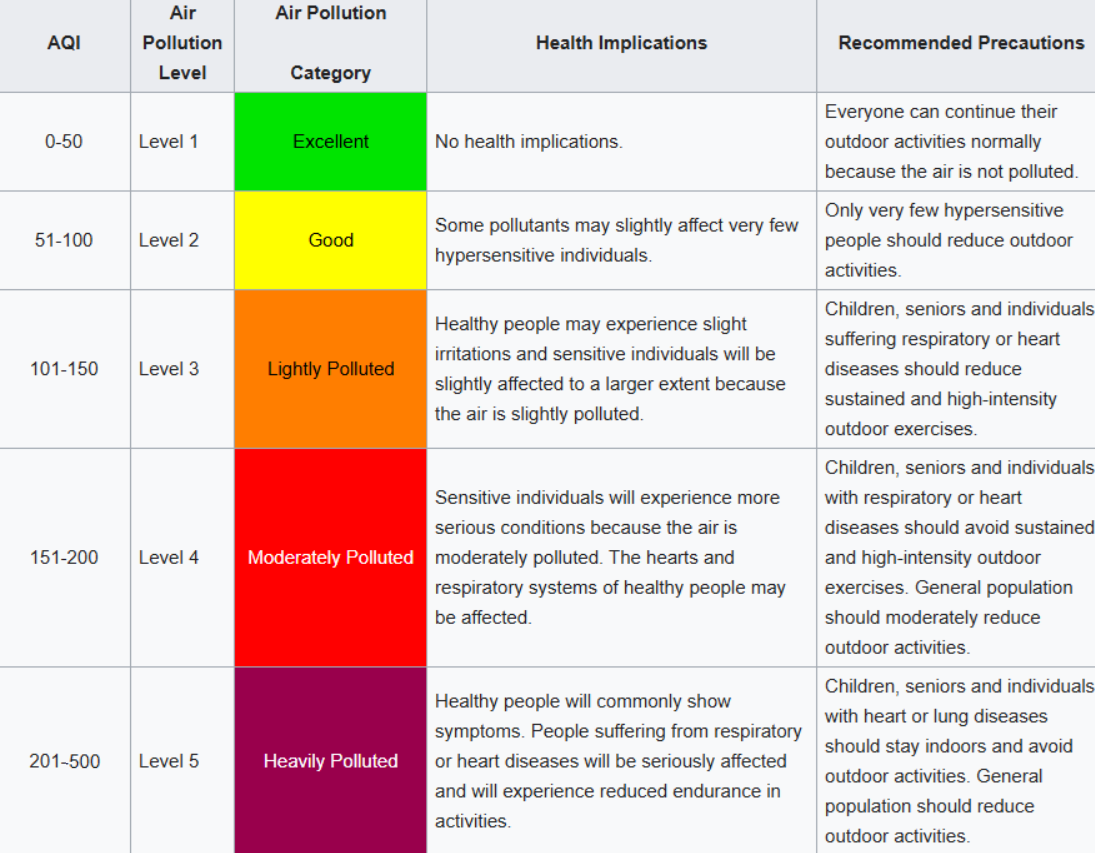

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2123 entries, 0 to 2122
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   استان         2123 non-null   object 
 1   ایستگاه       2123 non-null   object 
 2   CO            2094 non-null   float64
 3   O3            2123 non-null   float64
 4   NO2           2089 non-null   float64
 5   SO2           2121 non-null   float64
 6   PM10          2123 non-null   float64
 7   PM2.5         2122 non-null   float64
 8   شاخص          2123 non-null   int64  
 9   تاریخ و ساعت  2123 non-null   object 
dtypes: float64(6), int64(1), object(3)
memory usage: 166.0+ KB


In [35]:
df.isnull () .sum()

استان            0
ایستگاه          0
CO              29
O3               0
NO2             34
SO2              2
PM10             0
PM2.5            1
شاخص             0
تاریخ و ساعت     0
dtype: int64

In [36]:
column_mapping = {

    'استان': 'Province',

    'ایستگاه': 'Station',

    'شاخص': 'AQI',

    'تاریخ و ساعت': 'DateTime'

}
df.rename(columns=column_mapping, inplace=True)

df.head()

Province               ایستگاه     CO    O3   NO2   SO2  PM10  PM2.5  AQI  \
0    البرز                اشتهارد  25.0  50.0  52.0  29.0  19.0   48.0   50   
1    البرز                  فردیس  42.0  54.0  52.0  21.0  80.0  105.0  105   
2    البرز               مترو کرج  40.0  50.0  38.0  27.0  52.0   59.0   59   
3    البرز  دانشگاه محیط زیست کرج  11.0  50.0  45.0  26.0  54.0   91.0   54   
4    البرز     فرمانداری ساوجبلاغ  46.0  50.0  37.0  27.0  52.0   54.0   54   

              DateTime  
0  1396/06/01 11:00:00  
1  1396/06/01 11:00:00  
2  1396/06/01 11:00:00  
3  1396/06/01 11:00:00  
4  1396/06/01 11:00:00

In [37]:
df.rename(columns={'ایستگاه': 'Station'}, inplace=True)
df

Province               ایستگاه     CO    O3   NO2   SO2  PM10  PM2.5  \
0       البرز                اشتهارد  25.0  50.0  52.0  29.0  19.0   48.0   
1       البرز                  فردیس  42.0  54.0  52.0  21.0  80.0  105.0   
2       البرز               مترو کرج  40.0  50.0  38.0  27.0  52.0   59.0   
3       البرز  دانشگاه محیط زیست کرج  11.0  50.0  45.0  26.0  54.0   91.0   
4       البرز     فرمانداری ساوجبلاغ  46.0  50.0  37.0  27.0  52.0   54.0   
...       ...                    ...   ...   ...   ...   ...   ...    ...   
2118      یزد                   میبد  34.0  34.0  30.0  23.0  51.0   52.0   
2119      یزد                  مهریز  35.0  44.0  39.0  22.0  69.0   84.0   
2120      یزد       یزد - میدان صنعت  19.0   3.0  50.0   3.0   9.0   16.0   
2121      یزد                   میبد  34.0  34.0  30.0  23.0  51.0   52.0   
2122      یزد                  مهریز  36.0  45.0  39.0  22.0  71.0   86.0   

      AQI             DateTime  
0      50  1396/06/01 11:00:00  
1     105  1396/06/01 11:00:00  
2      59  1396/06/01 11:00:00  
3      54  1396/06/01 11:00:00  
4      54  1396/06/01 11:00:00  
...   ...                  ...  
2118   52  1396/06/30 11:00:00  
2119   69  1396/06/30 11:00:00  
2120   19  1396/06/30 11:00:00  
2121   52  1396/06/31 11:00:00  
2122   71  1396/06/31 11:00:00  

[2123 rows x 10 columns]

In [38]:
df.drop(df.columns[1], axis=1, inplace=True)  
df.head()

Province    CO    O3   NO2   SO2  PM10  PM2.5  AQI             DateTime
0    البرز  25.0  50.0  52.0  29.0  19.0   48.0   50  1396/06/01 11:00:00
1    البرز  42.0  54.0  52.0  21.0  80.0  105.0  105  1396/06/01 11:00:00
2    البرز  40.0  50.0  38.0  27.0  52.0   59.0   59  1396/06/01 11:00:00
3    البرز  11.0  50.0  45.0  26.0  54.0   91.0   54  1396/06/01 11:00:00
4    البرز  46.0  50.0  37.0  27.0  52.0   54.0   54  1396/06/01 11:00:00

In [39]:
# Mapping of Persian province names to English
province_mapping = {
    'تهران': 'Tehran',
    'البرز': 'Alborz',
    'خراسان رضوی': 'Khorasan Razavi',
    'اصفهان': 'Isfahan',
    'فارس': 'Fars',
    'سیستان و بلوچستان': 'Sistan and Baluchestan',
    'کرمان': 'Kerman',
    'آذربایجان شرقی': 'East Azerbaijan',
    'آذربایجان غربی': 'West Azerbaijan',
    'کردستان': 'Kurdistan',
    'کرمانشاه': 'Kermanshah',
    'لرستان': 'Lorestan',
    'مازندران': 'Mazandaran',
    'گیلان': 'Gilan',
    'گلستان': 'Golestan',
    'قزوین': 'Qazvin',
    'مرکزی': 'Markazi',
    'همدان': 'Hamadan',
    'یزد': 'Yazd',
    'بوشهر': 'Bushehr',
    'هرمزگان': 'Hormozgan',
    'خوزستان': 'Khuzestan',
    'کهگیلویه و بویراحمد': 'Kohgiluyeh and Boyer-Ahmad',
    'ایلام': 'Ilam',
    'چهارمحال و بختیاری': 'Chaharmahal and Bakhtiari',
    'اردبیل': 'Ardabil',
    'قم': 'Qom'
}

df['Province'] = df['Province'].map(province_mapping).fillna(df['Province'])
df.head()

Province    CO    O3   NO2   SO2  PM10  PM2.5  AQI             DateTime
0   Alborz  25.0  50.0  52.0  29.0  19.0   48.0   50  1396/06/01 11:00:00
1   Alborz  42.0  54.0  52.0  21.0  80.0  105.0  105  1396/06/01 11:00:00
2   Alborz  40.0  50.0  38.0  27.0  52.0   59.0   59  1396/06/01 11:00:00
3   Alborz  11.0  50.0  45.0  26.0  54.0   91.0   54  1396/06/01 11:00:00
4   Alborz  46.0  50.0  37.0  27.0  52.0   54.0   54  1396/06/01 11:00:00

Column Names and Contents were originally in Persian and were translated into English for accessibility and analysis.

In [40]:
# Reorder columns to place 'DateTime' first
columns = ['DateTime'] + [col for col in df.columns if col != 'DateTime']
df = df[columns]
df.head()

DateTime Province    CO    O3   NO2   SO2  PM10  PM2.5  AQI
0  1396/06/01 11:00:00   Alborz  25.0  50.0  52.0  29.0  19.0   48.0   50
1  1396/06/01 11:00:00   Alborz  42.0  54.0  52.0  21.0  80.0  105.0  105
2  1396/06/01 11:00:00   Alborz  40.0  50.0  38.0  27.0  52.0   59.0   59
3  1396/06/01 11:00:00   Alborz  11.0  50.0  45.0  26.0  54.0   91.0   54
4  1396/06/01 11:00:00   Alborz  46.0  50.0  37.0  27.0  52.0   54.0   54

In [41]:
# Define the classification function
def classify_aqi(aqi):
    if aqi <= 50:
        return 25, "Excellent"
    elif aqi <= 100:
        return 75, "Good"
    elif aqi <= 150:
        return 125, "Lightly Polluted"
    elif aqi <= 200:
        return 175, "Moderately Polluted"
    elif aqi <= 500:
        return 350, "Heavily Polluted"
    else:
        return None, None

# Apply the classification to the 'AQI' column
df[['AQI Average', 'AQI Description']] = df['AQI'].apply(lambda x: pd.Series(classify_aqi(x)))

# Define the custom order for AQI Description
categories = ['Excellent', 'Good', 'Lightly Polluted', 'Moderately Polluted', 'Heavily Polluted']

# Convert 'AQI Description' to a categorical type with the specified
df.head()

C:\Users\arman\AppData\Local\Temp\ipykernel_23736\3905529418.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['AQI Average', 'AQI Description']] = df['AQI'].apply(lambda x: pd.Series(classify_aqi(x)))
C:\Users\arman\AppData\Local\Temp\ipykernel_23736\3905529418.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['AQI Average', 'AQI Description']] = df['AQI'].apply(lambda x: pd.Series(classify_aqi(x)))


DateTime Province    CO    O3   NO2   SO2  PM10  PM2.5  AQI  \
0  1396/06/01 11:00:00   Alborz  25.0  50.0  52.0  29.0  19.0   48.0   50   
1  1396/06/01 11:00:00   Alborz  42.0  54.0  52.0  21.0  80.0  105.0  105   
2  1396/06/01 11:00:00   Alborz  40.0  50.0  38.0  27.0  52.0   59.0   59   
3  1396/06/01 11:00:00   Alborz  11.0  50.0  45.0  26.0  54.0   91.0   54   
4  1396/06/01 11:00:00   Alborz  46.0  50.0  37.0  27.0  52.0   54.0   54   

   AQI Average   AQI Description  
0           25         Excellent  
1          125  Lightly Polluted  
2           75              Good  
3           75              Good  
4           75              Good

two target variables were created for analysis:

    AQI Average: A continuous numerical value representing the air quality index.
    AQI Description: A categorical variable describing AQI levels (Excellent, Good, Lightly Polluted, Moderately Polluted,Heavily Polluted).

In [42]:
# Define the custom order for AQI descriptions
aqi_description_order = ['Excellent', 'Good', 'Lightly Polluted', 'Moderately Polluted', 'Heavily Polluted']

# Convert 'AQI Description' to a categorical type with the defined order
df['AQI Description'] = pd.Categorical(df['AQI Description'], categories=aqi_description_order, ordered=True)

# Sorting the DataFrame by 'AQI Description' in the custom order
df = df.sort_values('AQI Description')
df.head()

C:\Users\arman\AppData\Local\Temp\ipykernel_23736\913422948.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['AQI Description'] = pd.Categorical(df['AQI Description'], categories=aqi_description_order, ordered=True)


DateTime Province    CO    O3   NO2   SO2  PM10  PM2.5  AQI  \
0     1396/06/01 11:00:00   Alborz  25.0  50.0  52.0  29.0  19.0   48.0   50   
1534  1396/06/13 11:00:00    سمنان  12.0  29.0  50.0  13.0  14.0   37.0   37   
1533  1396/06/12 11:00:00    سمنان  21.0  28.0  52.0  16.0  17.0   47.0   47   
1532  1396/06/12 11:00:00    سمنان  36.0  25.0  19.0  25.0  36.0   21.0   21   
1531  1396/06/11 11:00:00    سمنان  13.0  33.0  50.0  12.0  14.0   38.0   38   

      AQI Average AQI Description  
0              25       Excellent  
1534           25       Excellent  
1533           25       Excellent  
1532           25       Excellent  
1531           25       Excellent

In [43]:
df.describe().T

count       mean        std   min   25%   50%   75%    max
CO           2094.0  33.977555  24.568419   0.0  18.0  31.0  41.0  286.0
O3           2123.0  42.287800  20.617301   2.0  30.0  42.0  50.0  219.0
NO2          2089.0  40.066539  25.783041   0.0  22.0  37.0  52.0  163.0
SO2          2121.0  21.917492  11.582855   0.0  16.0  22.0  25.0  124.0
PM10         2123.0  63.358455  24.047336   3.0  51.0  62.0  73.0  336.0
PM2.5        2122.0  78.703110  33.877841   8.0  56.0  75.0  94.0  330.0
AQI          2123.0  75.883655  36.044651   2.0  52.0  71.0  95.0  336.0
AQI Average  2123.0  76.519077  41.513406  25.0  75.0  75.0  75.0  350.0

In [44]:
df['AQI Description'].nunique()

5

In [45]:
df['AQI Description'].unique()

['Excellent', 'Good', 'Lightly Polluted', 'Moderately Polluted', 'Heavily Polluted']
Categories (5, object): ['Excellent' < 'Good' < 'Lightly Polluted' < 'Moderately Polluted' < 'Heavily Polluted']

In [46]:
df['AQI Description'].value_counts()

Good                   1184
Excellent               496
Lightly Polluted        364
Moderately Polluted      68
Heavily Polluted         11
Name: AQI Description, dtype: int64

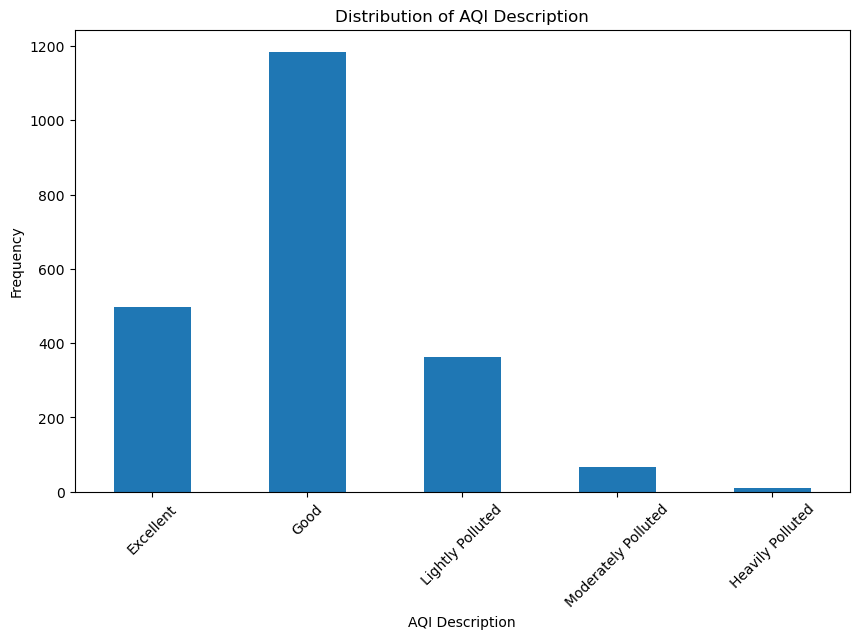

In [47]:
plt.figure(figsize=(10,6))
df['AQI Description'].value_counts().reindex(aqi_description_order).plot(kind='bar')
plt.title('Distribution of AQI Description')
plt.xlabel('AQI Description')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

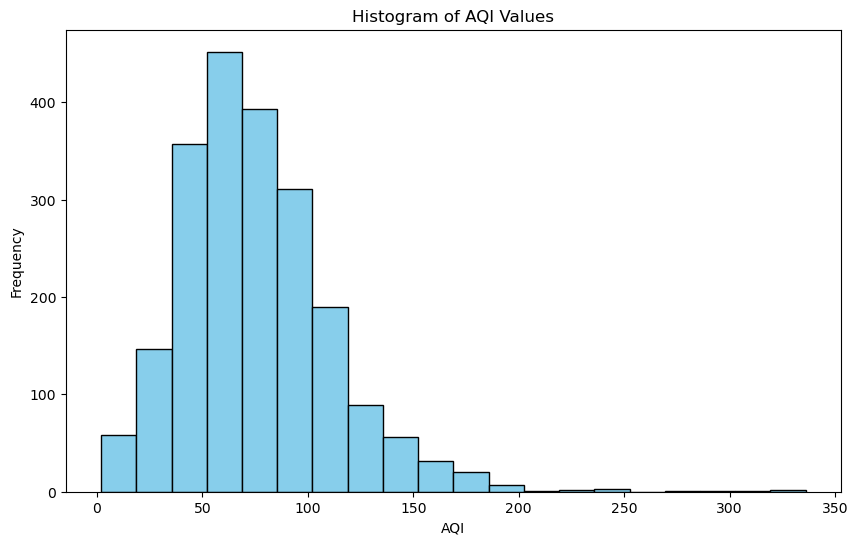

In [48]:
plt.figure(figsize=(10,6))
plt.hist(df['AQI'], bins=20, color='skyblue', edgecolor='black')

plt.title('Histogram of AQI Values')
plt.xlabel('AQI')
plt.ylabel('Frequency')
plt.show()

  The dataset shows that most air quality data points fall into the "Good" or "Excellent" categories, with very few instances of severe pollution.
    The AQI values are heavily concentrated in the lower ranges, confirming that poor air quality is uncommon.

In [49]:
def data_report(df):
    # Sacamos los NOMBRES
    cols = pd.DataFrame(df.columns.values, columns=["COL_N"])

    # Sacamos los TIPOS
    types = pd.DataFrame(df.dtypes.values, columns=["DATA_TYPE"])

    # Sacamos los MISSINGS
    percent_missing = round(df.isnull().sum() * 100 / len(df), 2)
    percent_missing_df = pd.DataFrame(percent_missing.values, columns=["MISSINGS (%)"])

    # Sacamos los VALORES UNICOS
    unicos = pd.DataFrame(df.nunique().values, columns=["UNIQUE_VALUES"])
    
    percent_cardin = round(unicos['UNIQUE_VALUES']*100/len(df), 2)
    percent_cardin_df = pd.DataFrame(percent_cardin.values, columns=["CARDIN (%)"])

    concatenado = pd.concat([cols, types, percent_missing_df, unicos, percent_cardin_df], axis=1, sort=False)
    concatenado.set_index('COL_N', drop=True, inplace=True)


    return concatenado.T
        
data_report(df)

COL_N         DateTime Province       CO       O3      NO2      SO2     PM10  \
DATA_TYPE       object   object  float64  float64  float64  float64  float64   
MISSINGS (%)       0.0      0.0     1.37      0.0      1.6     0.09      0.0   
UNIQUE_VALUES       31       27      126      117      125       75      142   
CARDIN (%)        1.46     1.27     5.93     5.51     5.89     3.53     6.69   

COL_N            PM2.5    AQI AQI Average AQI Description  
DATA_TYPE      float64  int64       int64        category  
MISSINGS (%)      0.05    0.0         0.0             0.0  
UNIQUE_VALUES      184    186           5               5  
CARDIN (%)        8.67   8.76        0.24            0.24

In [50]:
df.describe().T

count       mean        std   min   25%   50%   75%    max
CO           2094.0  33.977555  24.568419   0.0  18.0  31.0  41.0  286.0
O3           2123.0  42.287800  20.617301   2.0  30.0  42.0  50.0  219.0
NO2          2089.0  40.066539  25.783041   0.0  22.0  37.0  52.0  163.0
SO2          2121.0  21.917492  11.582855   0.0  16.0  22.0  25.0  124.0
PM10         2123.0  63.358455  24.047336   3.0  51.0  62.0  73.0  336.0
PM2.5        2122.0  78.703110  33.877841   8.0  56.0  75.0  94.0  330.0
AQI          2123.0  75.883655  36.044651   2.0  52.0  71.0  95.0  336.0
AQI Average  2123.0  76.519077  41.513406  25.0  75.0  75.0  75.0  350.0

In [51]:
df.describe(include='all').T

count unique                  top  freq       mean  \
DateTime           2123     31  1396/06/24 11:00:00    76        NaN   
Province           2123     27               Tehran   459        NaN   
CO               2094.0    NaN                  NaN   NaN  33.977555   
O3               2123.0    NaN                  NaN   NaN    42.2878   
NO2              2089.0    NaN                  NaN   NaN  40.066539   
SO2              2121.0    NaN                  NaN   NaN  21.917492   
PM10             2123.0    NaN                  NaN   NaN  63.358455   
PM2.5            2122.0    NaN                  NaN   NaN   78.70311   
AQI              2123.0    NaN                  NaN   NaN  75.883655   
AQI Average      2123.0    NaN                  NaN   NaN  76.519077   
AQI Description    2123      5                 Good  1184        NaN   

                       std   min   25%   50%   75%    max  
DateTime               NaN   NaN   NaN   NaN   NaN    NaN  
Province               NaN   NaN   NaN   NaN   NaN    NaN  
CO               24.568419   0.0  18.0  31.0  41.0  286.0  
O3               20.617301   2.0  30.0  42.0  50.0  219.0  
NO2              25.783041   0.0  22.0  37.0  52.0  163.0  
SO2              11.582855   0.0  16.0  22.0  25.0  124.0  
PM10             24.047336   3.0  51.0  62.0  73.0  336.0  
PM2.5            33.877841   8.0  56.0  75.0  94.0  330.0  
AQI              36.044651   2.0  52.0  71.0  95.0  336.0  
AQI Average      41.513406  25.0  75.0  75.0  75.0  350.0  
AQI Description        NaN   NaN   NaN   NaN   NaN    NaN

In [52]:
df.isnull () .sum()

DateTime            0
Province            0
CO                 29
O3                  0
NO2                34
SO2                 2
PM10                0
PM2.5               1
AQI                 0
AQI Average         0
AQI Description     0
dtype: int64

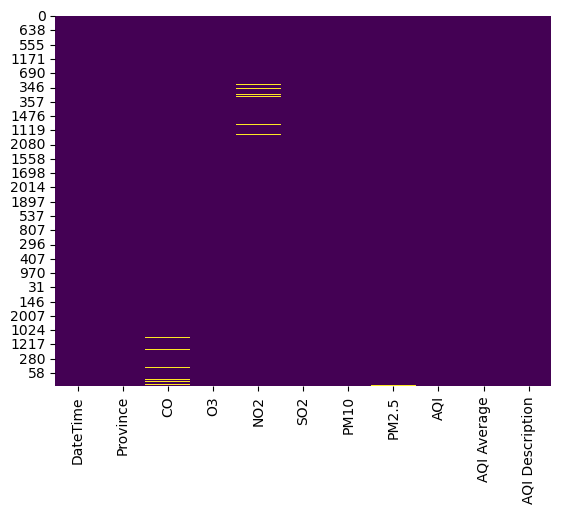

In [53]:
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.show()

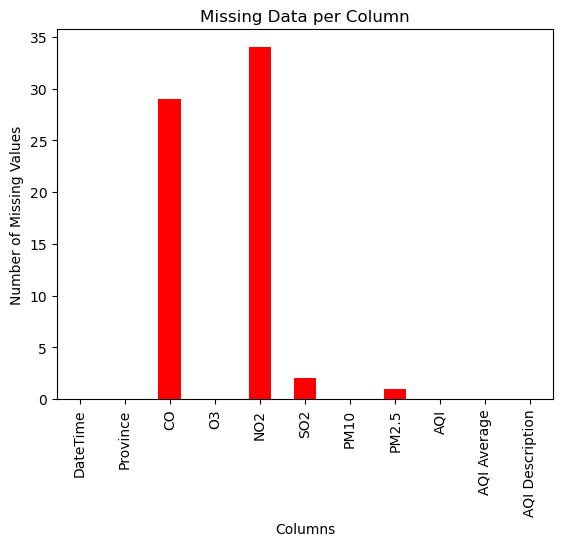

In [54]:
missing_data = df.isnull().sum()
missing_data.plot(kind='bar', color='red')
plt.title('Missing Data per Column')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.show()

In [55]:
numeric_cols = df.select_dtypes(include=np.number).columns

# Fill NA values in numeric columns with their respective medians
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2123 entries, 0 to 1394
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   DateTime         2123 non-null   object  
 1   Province         2123 non-null   object  
 2   CO               2123 non-null   float64 
 3   O3               2123 non-null   float64 
 4   NO2              2123 non-null   float64 
 5   SO2              2123 non-null   float64 
 6   PM10             2123 non-null   float64 
 7   PM2.5            2123 non-null   float64 
 8   AQI              2123 non-null   int64   
 9   AQI Average      2123 non-null   int64   
 10  AQI Description  2123 non-null   category
dtypes: category(1), float64(6), int64(2), object(2)
memory usage: 184.7+ KB


 For right-skewed data like this data, replacing missing values with the median ensures that the overall data distribution remains closer to its original form.

In [56]:
df[df.duplicated()]

DateTime Province    CO    O3   NO2   SO2  PM10  PM2.5  AQI  \
626   1396/06/01 11:00:00     Fars  49.0  50.0   7.0  31.0  76.0   67.0   50   
661   1396/06/08 11:00:00     Fars  49.0  44.0   7.0  34.0  69.0   58.0   49   
653   1396/06/07 11:00:00     Fars  49.0  50.0   7.0  33.0  74.0   65.0   50   
667   1396/06/09 11:00:00     Fars  49.0  46.0   7.0  34.0  71.0   60.0   49   
672   1396/06/10 11:00:00     Fars  49.0  42.0   7.0  33.0  69.0   57.0   49   
631   1396/06/02 11:00:00     Fars  49.0  50.0   7.0  33.0  74.0   65.0   50   
636   1396/06/03 11:00:00     Fars  49.0  50.0   7.0  30.0  77.0   68.0   50   
641   1396/06/04 11:00:00     Fars  49.0  50.0   7.0  29.0  78.0   69.0   50   
647   1396/06/05 11:00:00     Fars  49.0  50.0   7.0  31.0  76.0   67.0   50   
648   1396/06/06 11:00:00     Fars  49.0  39.0   7.0  34.0  66.0   52.0   49   
675   1396/06/11 11:00:00     Fars  49.0  45.0   7.0  35.0  69.0   58.0   49   
710   1396/06/18 11:00:00     Fars  49.0  39.0   7.0  35.0  65.0   52.0   49   
702   1396/06/17 11:00:00     Fars  49.0  35.0   7.0  32.0  66.0   50.0   49   
714   1396/06/19 11:00:00     Fars  49.0  42.0   7.0  35.0  67.0   55.0   49   
720   1396/06/20 11:00:00     Fars  49.0  44.0   7.0  35.0  69.0   57.0   49   
685   1396/06/13 11:00:00     Fars  49.0  47.0   7.0  38.0  68.0   58.0   49   
688   1396/06/14 11:00:00     Fars  49.0  50.0   7.0  37.0  71.0   62.0   50   
695   1396/06/15 11:00:00     Fars  49.0  46.0   7.0  36.0  69.0   58.0   49   
697   1396/06/16 11:00:00     Fars  49.0  43.0   7.0  34.0  69.0   57.0   49   
754   1396/06/27 11:00:00     Fars  49.0  49.0   7.0  36.0  71.0   61.0   49   
759   1396/06/28 11:00:00     Fars  49.0  50.0   7.0  35.0  72.0   63.0   50   
763   1396/06/29 11:00:00     Fars  49.0  48.0   7.0  37.0  69.0   59.0   49   
729   1396/06/22 11:00:00     Fars  49.0  39.0   7.0  34.0  66.0   52.0   49   
737   1396/06/24 11:00:00     Fars  49.0  45.0   7.0  36.0  68.0   57.0   49   
742   1396/06/25 11:00:00     Fars  49.0  38.0   7.0  33.0  67.0   52.0   49   
2106  1396/06/20 11:00:00     Yazd  34.0  34.0  30.0  23.0  51.0   52.0   52   
2112  1396/06/24 11:00:00     Yazd  34.0  34.0  30.0  23.0  51.0   52.0   52   
749   1396/06/26 11:00:00     Fars  49.0  65.0   7.0  36.0  81.0   79.0   65   
769   1396/06/30 11:00:00     Fars  49.0  52.0   7.0  36.0  73.0   65.0   52   
127   1396/06/20 11:00:00   Alborz  34.0  35.0  30.0  23.0  51.0   54.0   54   
125   1396/06/19 11:00:00   Alborz  34.0  35.0  30.0  23.0  51.0   54.0   54   
76    1396/06/13 11:00:00   Alborz  34.0  35.0  30.0  23.0  51.0   54.0   54   
90    1396/06/15 11:00:00   Alborz  34.0  35.0  30.0  23.0  51.0   54.0   54   

      AQI Average AQI Description  
626            25       Excellent  
661            25       Excellent  
653            25       Excellent  
667            25       Excellent  
672            25       Excellent  
631            25       Excellent  
636            25       Excellent  
641            25       Excellent  
647            25       Excellent  
648            25       Excellent  
675            25       Excellent  
710            25       Excellent  
702            25       Excellent  
714            25       Excellent  
720            25       Excellent  
685            25       Excellent  
688            25       Excellent  
695            25       Excellent  
697            25       Excellent  
754            25       Excellent  
759            25       Excellent  
763            25       Excellent  
729            25       Excellent  
737            25       Excellent  
742            25       Excellent  
2106           75            Good  
2112           75            Good  
749            75            Good  
769            75            Good  
127            75            Good  
125            75            Good  
76             75            Good  
90             75            Good

In [57]:
# Remove duplicate rows
df = df.drop_duplicates()

df.head()

DateTime Province    CO    O3   NO2   SO2  PM10  PM2.5  AQI  \
0     1396/06/01 11:00:00   Alborz  25.0  50.0  52.0  29.0  19.0   48.0   50   
1534  1396/06/13 11:00:00    سمنان  12.0  29.0  50.0  13.0  14.0   37.0   37   
1533  1396/06/12 11:00:00    سمنان  21.0  28.0  52.0  16.0  17.0   47.0   47   
1532  1396/06/12 11:00:00    سمنان  36.0  25.0  19.0  25.0  36.0   21.0   21   
1531  1396/06/11 11:00:00    سمنان  13.0  33.0  50.0  12.0  14.0   38.0   38   

      AQI Average AQI Description  
0              25       Excellent  
1534           25       Excellent  
1533           25       Excellent  
1532           25       Excellent  
1531           25       Excellent

Duplicated data has removed from data.

<Figure size 2000x1400 with 0 Axes>

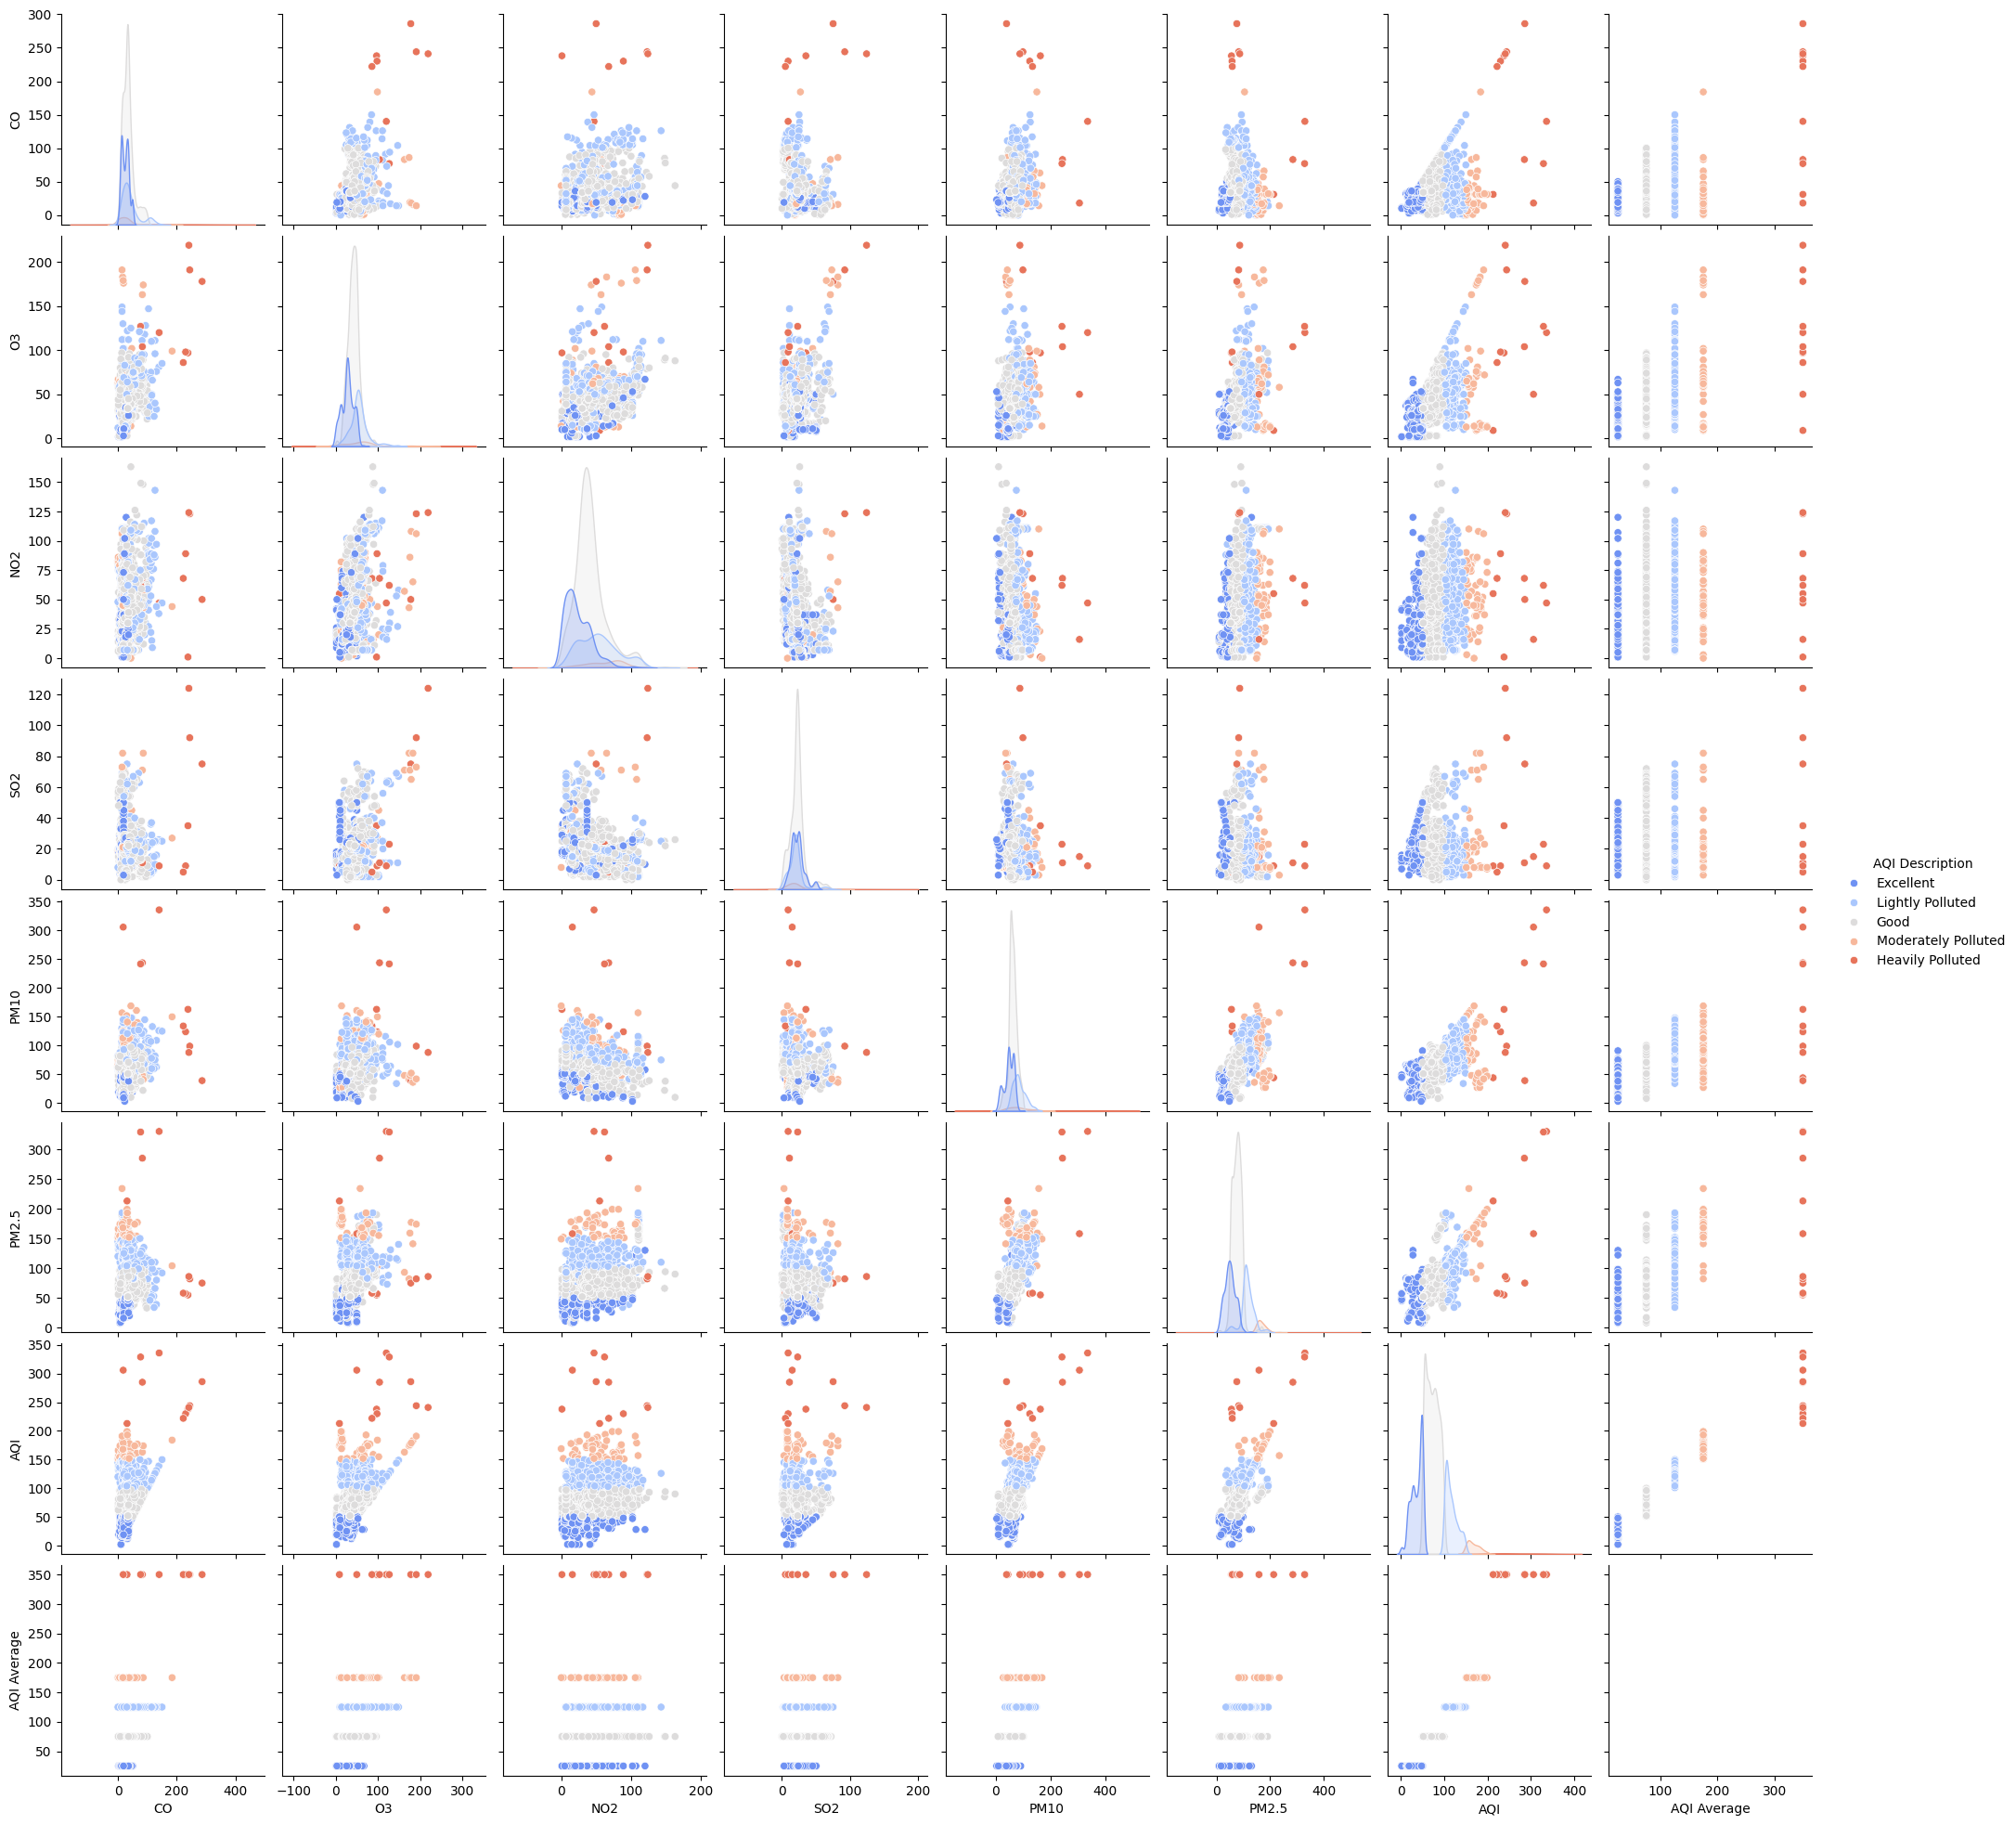

In [ ]:
plt.figure(figsize=(20, 14)) 
sns.pairplot(df, hue='AQI Description', palette='coolwarm')

    Diagonal Plots:
        PM2.5 and PM10: Heavily right-skewed with a majority of values concentrated at lower levels.
        CO and NO2: Right-skewed but less pronounced compared to PM2.5 and PM10.
        O3 and SO2: Slightly skewed distributions with a smaller concentration of high values.

    Off-Diagonal Scatterplots:
          PM2.5 and AQI, PM10 and AQI:
        These show strong positive relationships. As the values of PM2.5 and PM10 increase, AQI also rises.
        The scatter shows distinct clustering, reflecting the segmentation of AQI classes.

         CO and AQI:
        Moderate positive correlation. Higher CO concentrations tend to align with higher AQI values, but the relationship is weaker compared to PM10 and PM2.5.

        NO2, O3, and SO2 with AQI:
        These pollutants show weaker relationships with AQI. The scatterplots are more dispersed, and their contributions to AQI might be less significant.

PM2.5 and PM10 have the strongest impact on AQI, showing a clear positive relationship.<br>
CO also influences AQI but to a lesser extent.<br>
O3, NO2, and SO2 show weaker relationships with AQI.<br>

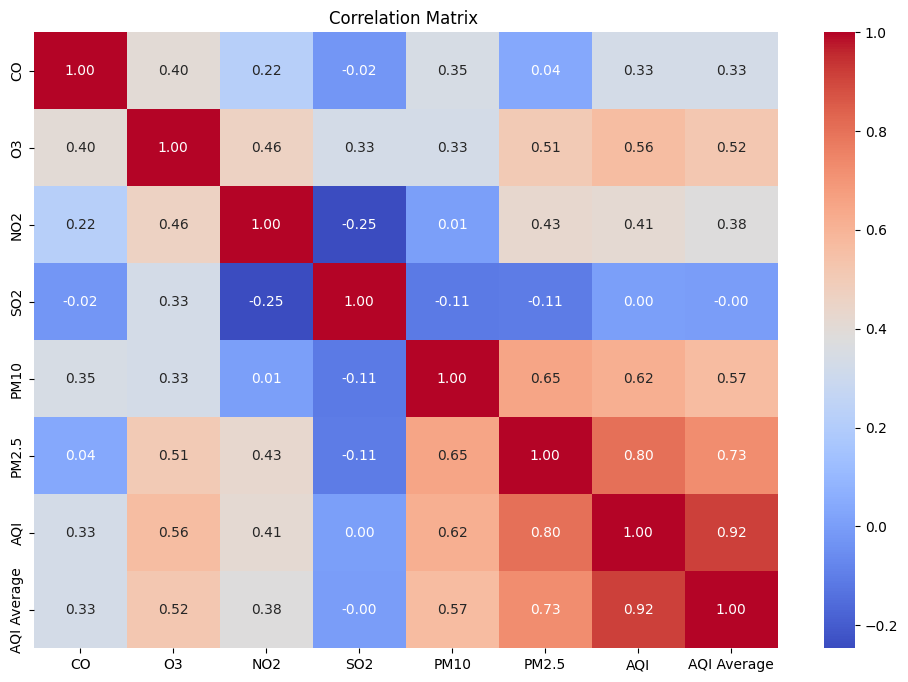

In [ ]:
# Correlation matrix
plt.figure(figsize=(12, 8))

correlation_matrix = df[numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title("Correlation Matrix ")
plt.show()

Key Influencers of AQI:
        PM2.5 and PM10 are the strongest contributors to AQI, as shown by their high positive correlations.

        O3 and NO2 also have moderate impacts but are less influential than PM2.5 and PM10.

Minimal Impact Pollutants:
        SO2 shows no meaningful correlation with AQI, suggesting it is not a significant driver of air quality in this dataset.

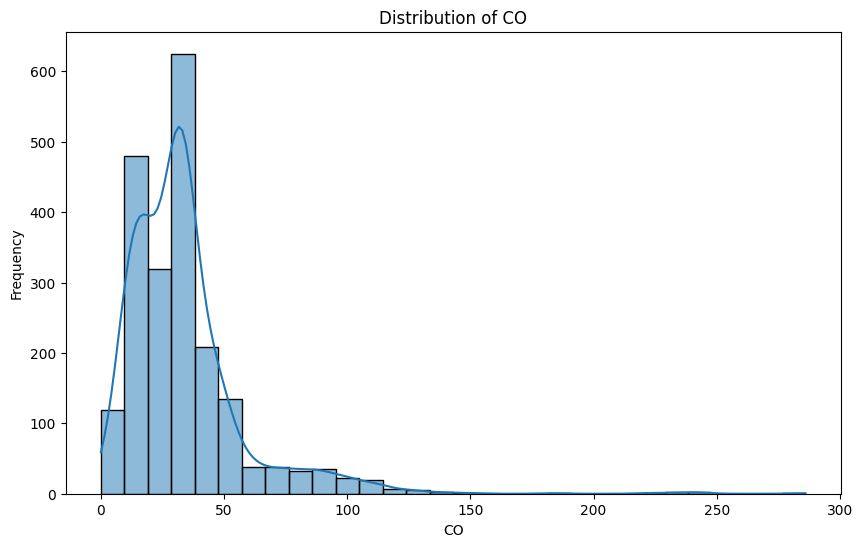

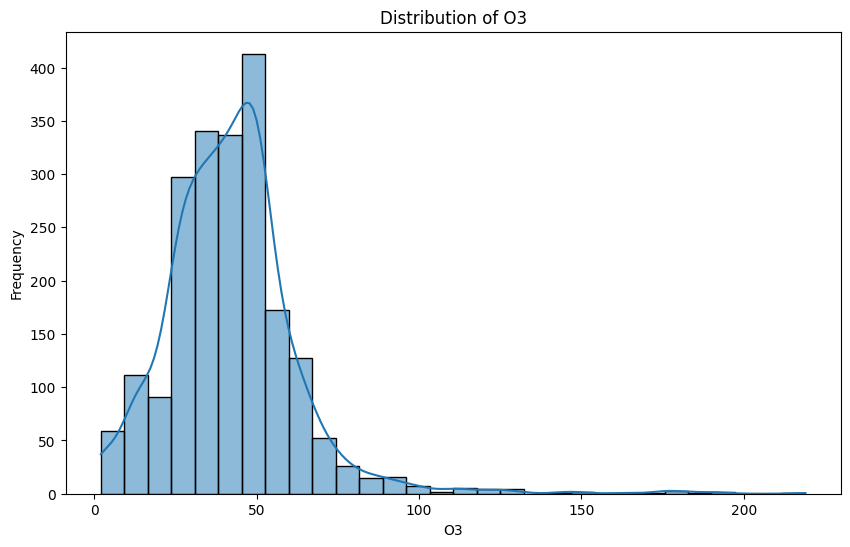

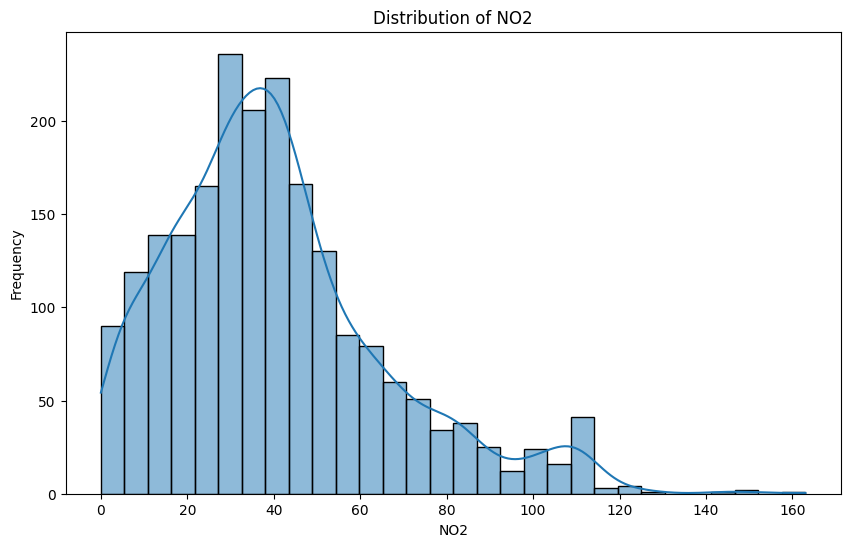

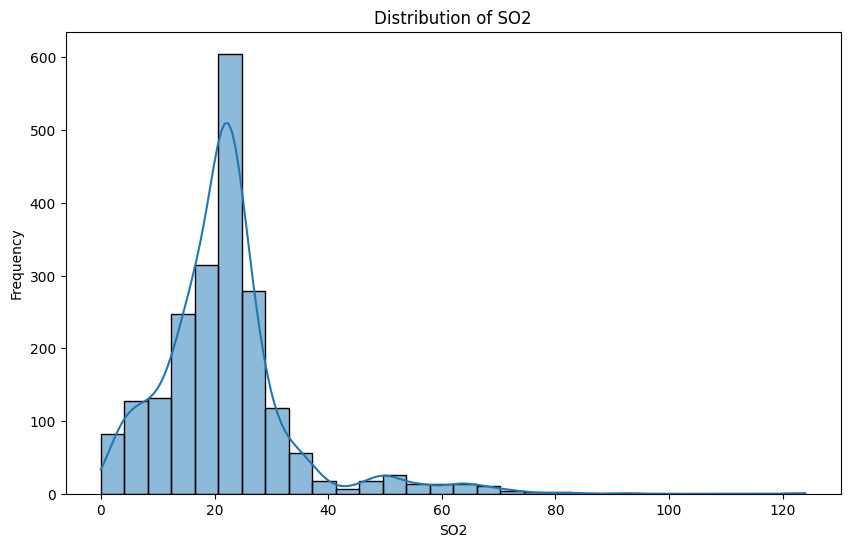

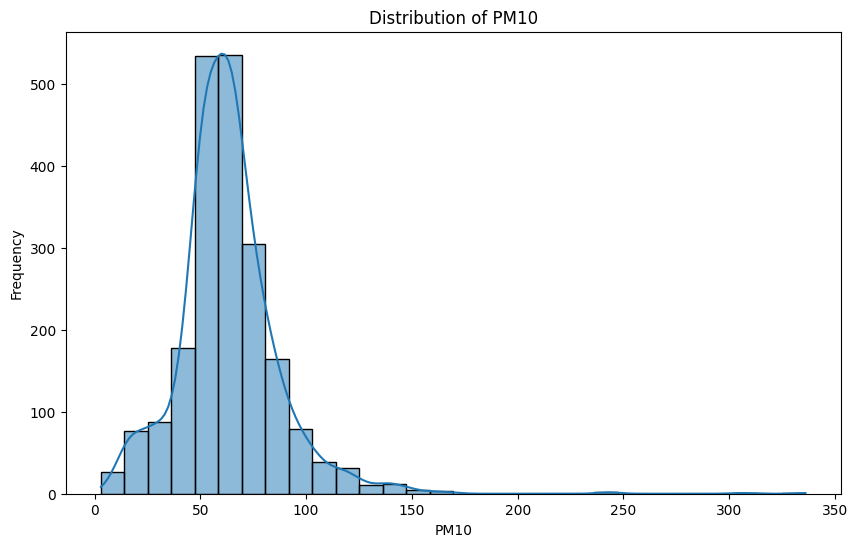

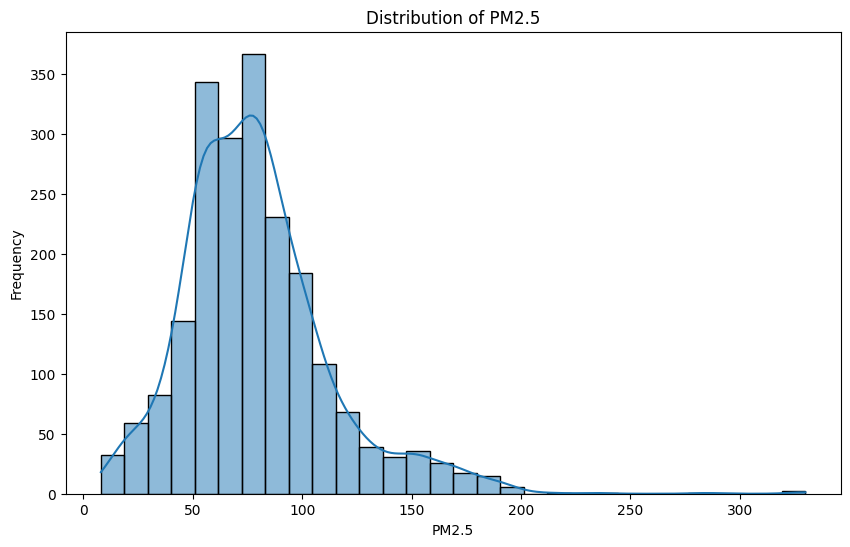

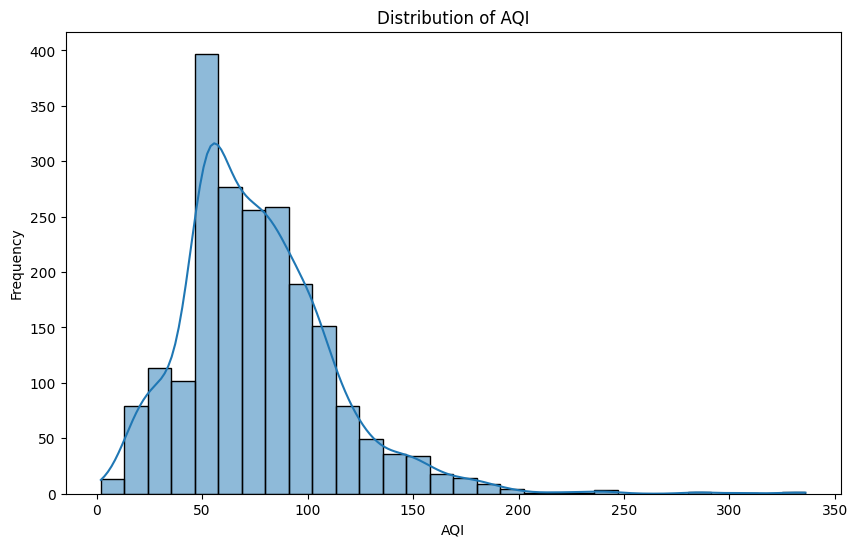

C:\Users\arman\AppData\Local\Temp\ipykernel_13284\1002230032.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2')


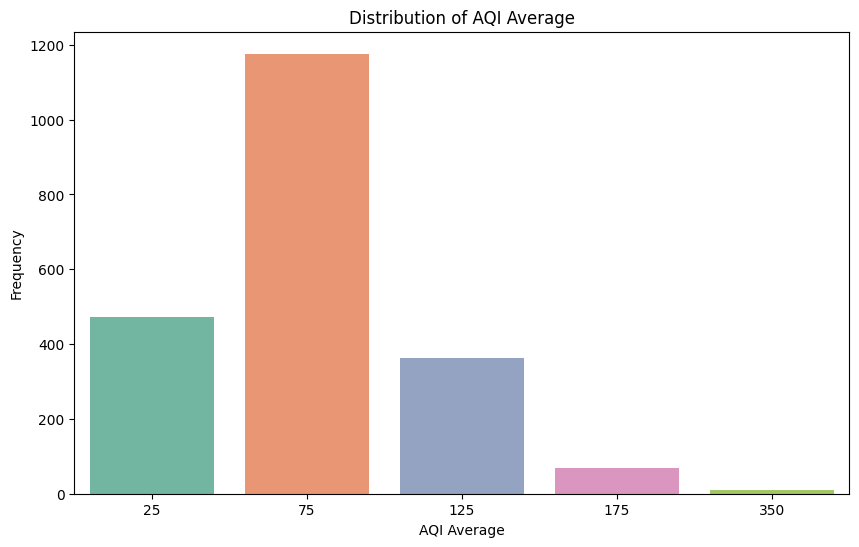

In [ ]:
# List of columns to create histograms for
columns = ['CO', 'O3', 'NO2', 'SO2', 'PM10', 'PM2.5', 'AQI', 'AQI Average']

# Loop through each column and plot a histogram
for col in columns:
    plt.figure(figsize=(10, 6))
    
    if col == 'AQI Average':  # For AQI Average, we plot a countplot instead of histogram
        sns.countplot(data=df, x=col, palette='Set2')
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
    else:  # For numerical columns, plot histogram with KDE
        sns.histplot(df[col], bins=30, kde=True)
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
    
    plt.show()

The majority of the pollutants (PM2.5, PM10, SO2, NO2, O3, and CO) are present at moderate levels in most regions. However, there are occasional spikes indicating severe pollution episodes for specific pollutants like PM2.5, PM10, and NO2. The AQI and AQI class distributions align with these findings, showing predominantly moderate air qualit

C:\Users\arman\AppData\Local\Temp\ipykernel_13284\2842712496.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='AQI Description', y='CO', palette='Set2')


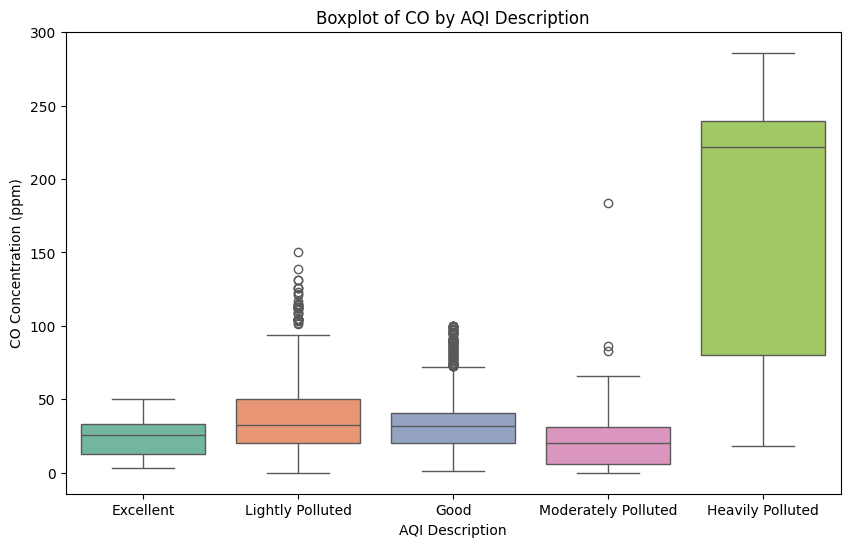

C:\Users\arman\AppData\Local\Temp\ipykernel_13284\2842712496.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='AQI Description', y='O3', palette='Set2')


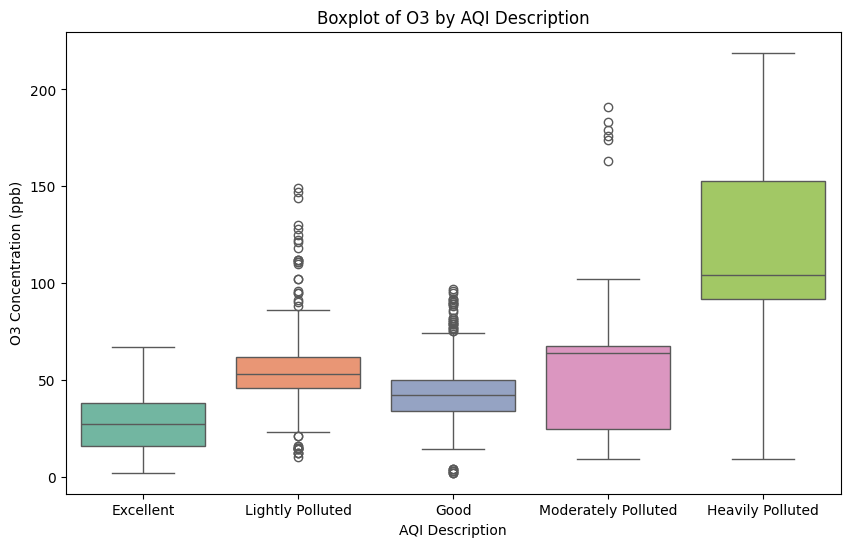

C:\Users\arman\AppData\Local\Temp\ipykernel_13284\2842712496.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='AQI Description', y='NO2', palette='Set2')


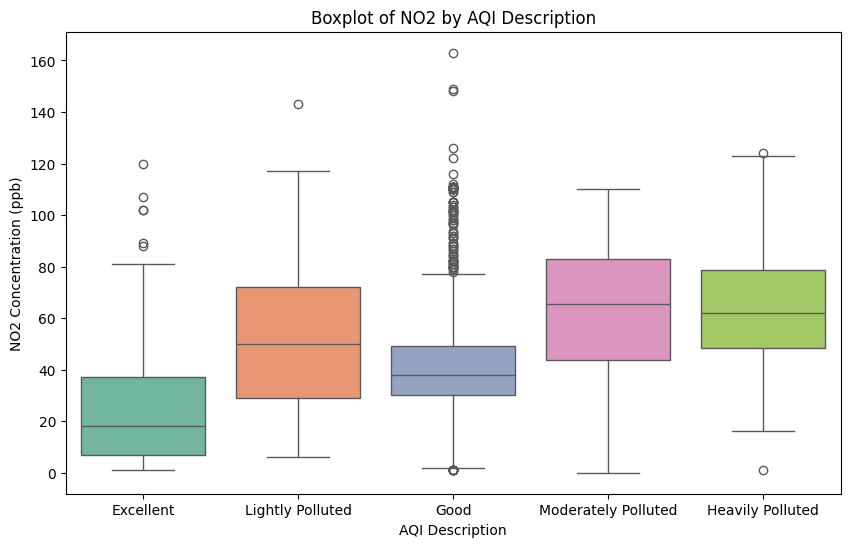

C:\Users\arman\AppData\Local\Temp\ipykernel_13284\2842712496.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='AQI Description', y='SO2', palette='Set2')


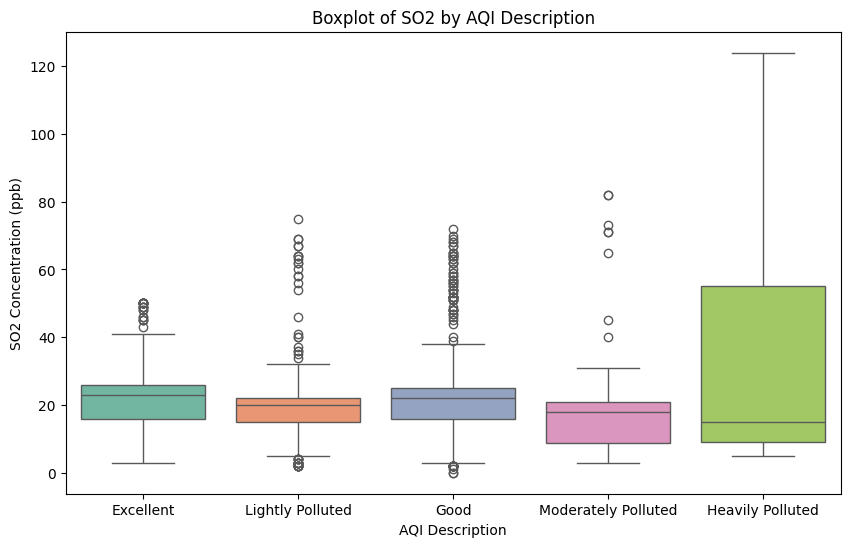

C:\Users\arman\AppData\Local\Temp\ipykernel_13284\2842712496.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='AQI Description', y='PM10', palette='Set2')


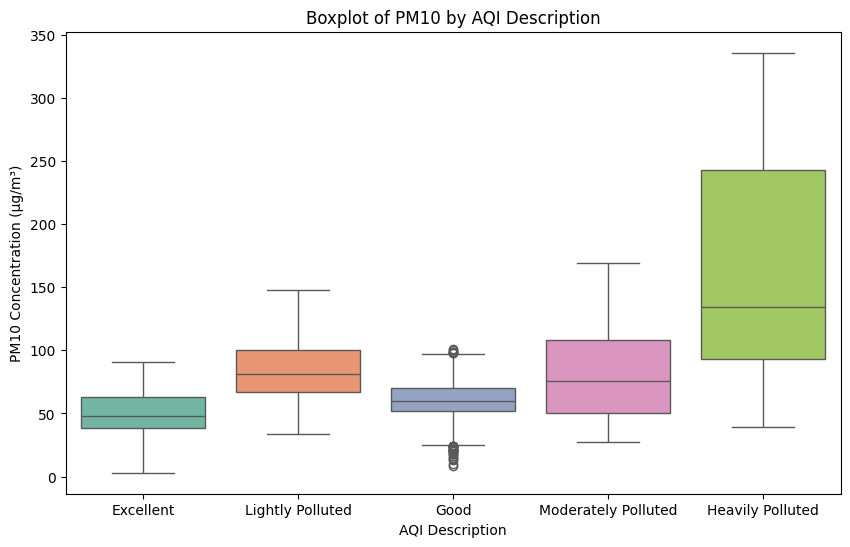

C:\Users\arman\AppData\Local\Temp\ipykernel_13284\2842712496.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='AQI Description', y='PM2.5', palette='Set2')


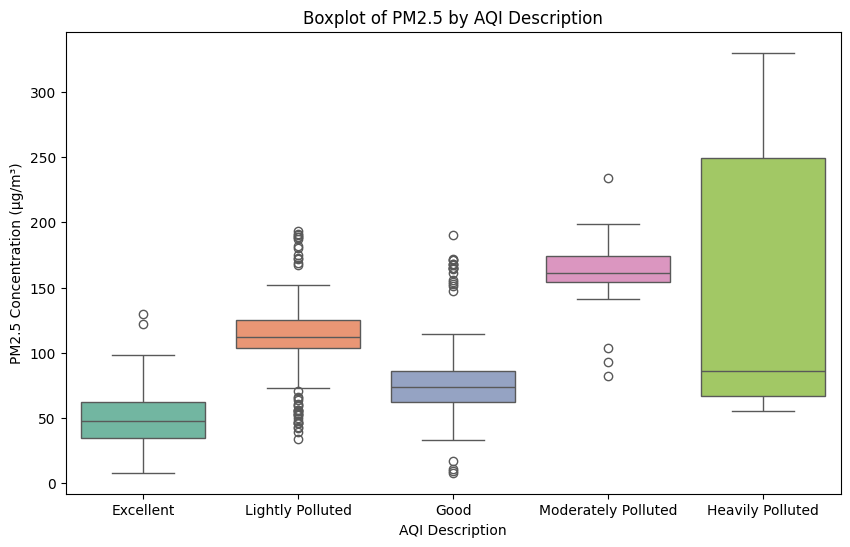

C:\Users\arman\AppData\Local\Temp\ipykernel_13284\2842712496.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='AQI Description', y='AQI', palette='Set2')


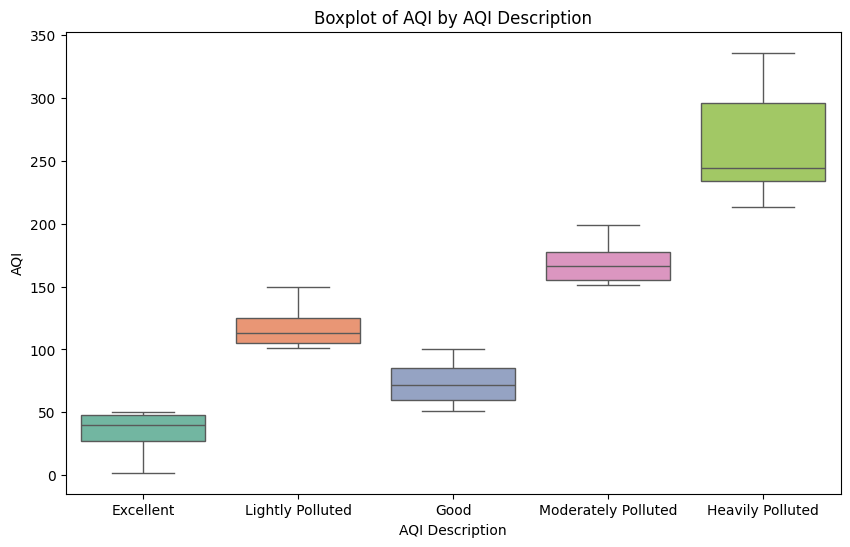

In [ ]:
# For AQI Description column (categorical), we plot boxplots for continuous variables grouped by AQI Description
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='AQI Description', y='CO', palette='Set2')
plt.title('Boxplot of CO by AQI Description')
plt.xlabel('AQI Description')
plt.ylabel('CO Concentration (ppm)')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='AQI Description', y='O3', palette='Set2')
plt.title('Boxplot of O3 by AQI Description')
plt.xlabel('AQI Description')
plt.ylabel('O3 Concentration (ppb)')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='AQI Description', y='NO2', palette='Set2')
plt.title('Boxplot of NO2 by AQI Description')
plt.xlabel('AQI Description')
plt.ylabel('NO2 Concentration (ppb)')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='AQI Description', y='SO2', palette='Set2')
plt.title('Boxplot of SO2 by AQI Description')
plt.xlabel('AQI Description')
plt.ylabel('SO2 Concentration (ppb)')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='AQI Description', y='PM10', palette='Set2')
plt.title('Boxplot of PM10 by AQI Description')
plt.xlabel('AQI Description')
plt.ylabel('PM10 Concentration (µg/m³)')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='AQI Description', y='PM2.5', palette='Set2')
plt.title('Boxplot of PM2.5 by AQI Description')
plt.xlabel('AQI Description')
plt.ylabel('PM2.5 Concentration (µg/m³)')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='AQI Description', y='AQI', palette='Set2')
plt.title('Boxplot of AQI by AQI Description')
plt.xlabel('AQI Description')
plt.ylabel('AQI')
plt.show()


Each pollutant’s concentration increases consistently across worsening AQI descriptions. PM2.5 and PM10 have the strongest relationship with AQI, as their concentrations directly correlate with air quality deterioration. SO2, NO2, O3, and CO are significant contributors to higher AQI categories, particularly in "Heavily Polluted" and "Severely Polluted" zones. This analysis demonstrates the multi-pollutant impact on air quality.

In [ ]:
from ydata_profiling import ProfileReport

ProfileReport(df).to_file("profile_report2.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

    Trends Across Categories:
        Pollutants like PM2.5, PM10, NO2, and SO2 exhibit increasing concentrations with worsening AQI categories (from "Excellent" to "Severely Polluted").
        For "Excellent" and "Good" AQI categories, concentrations are significantly lower, with smaller interquartile ranges (IQRs).
    Outliers:
        Higher pollutant levels in better AQI categories represent outliers, highlighting exceptions in clean air conditions.
    Influence of Pollutants:
        PM2.5 and PM10 are significant contributors to poor AQI levels, as reflected by their distributions.

Interpretation and Use Cases:

    Predictive Modeling: The improved symmetry in the log-transformed distributions makes the variables more suitable for linear regression, machine learning, or other predictive analyses.
    Pollution Monitoring: Insights can guide which pollutants should be monitored closely to maintain good air quality, as certain pollutants (like PM2.5 and NO2) are critical indicators of worsening AQI.
    Policy Implications:
        Interventions to control PM2.5 and PM10 emissions can effectively improve air quality in regions classified as "Heavily Polluted" or "Severely Polluted."

# Regresion

## Regresion Normal

In [59]:
X = df.drop(columns=['DateTime', 'Province', 'AQI Average', 'AQI Description'])
y = df['AQI']

Given the non-normal distributions and presence of outliers in air quality dataset, the best standardization method for numeric data would be RobustScaler. Here's why:

Outlier handling: RobustScaler uses median and interquartile range (IQR) instead of mean and standard deviation. This makes it more robust to outliers, which are evident in data (e.g., CO, PM10, PM2.5, AQI).

Non-normal distributions: For skewed distributions like those in dataset, RobustScaler performs better than StandardScaler as it's less influenced by extreme values.

Preserves relationships: It maintains the general relationships between data points while reducing the impact of outliers.

In [60]:
from sklearn.preprocessing import RobustScaler
# Scale the features using RobustScaler
#scaler = RobustScaler()
#scaled_values = scaler.fit_transform(df[['CO', 'O3', 'NO2', 'SO2', 'PM10', 'PM2.5']]) 

In [61]:
# Convert the scaled values back into a DataFrame with the original column names
#scaled_df = pd.DataFrame(scaled_values, columns=['CO', 'O3', 'NO2', 'SO2', 'PM10', 'PM2.5'])

In [240]:
X = df[['CO', 'O3', 'NO2', 'SO2', 'PM10', 'PM2.5']].values
y = df['AQI'].values

In [63]:
X

array([[ 25.,  50.,  52.,  29.,  19.,  48.],
       [ 12.,  29.,  50.,  13.,  14.,  37.],
       [ 21.,  28.,  52.,  16.,  17.,  47.],
       ...,
       [222.,  86.,  68.,   5., 134.,  58.],
       [ 77., 127.,  62.,  23., 242., 329.],
       [286., 178.,  50.,  75.,  39.,  75.]])

In [241]:
y

array([ 50,  37,  47, ..., 222, 329, 286], dtype=int64)

In [242]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [66]:
# Check the shape of the splits
print(f"Training features shape: {X_train.shape}")
print(f"Test features shape: {X_test.shape}")
print(f"Training target shape: {y_train.shape}")
print(f"Test target shape: {y_test.shape}")

Training features shape: (1672, 6)
Test features shape: (418, 6)
Training target shape: (1672,)
Test target shape: (418,)


In [243]:
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV,GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.utils.class_weight import compute_sample_weight

In [244]:
# Linear Regression Pipeline
lr_pipeline = Pipeline([
    ('scaler', RobustScaler()),  
    ('model', LinearRegression())
])
param_grid_lr = {}

# Ridge Regression Pipeline
ridge_pipeline = Pipeline([
    ('scaler', RobustScaler()),  
    ('model', Ridge())
])
param_grid_ridge = {
    'model__alpha': np.logspace(-4, 3, 100)
}

# Lasso Regression Pipeline
lasso_pipeline = Pipeline([
    ('scaler', RobustScaler()),  
    ('model', Lasso())
])
param_grid_lasso = {
    'model__alpha': np.logspace(-4, 1, 100)
}

# ElasticNet Pipeline
elasticnet_pipeline = Pipeline([
    ('scaler', RobustScaler()),  
    ('model', ElasticNet())
])
param_grid_elasticnet = {
    'model__alpha': np.logspace(-4, 1, 50),
    'model__l1_ratio': np.linspace(0, 1, 10)
}

# Decision Tree Pipeline
dt_pipeline = Pipeline([
    ('model', DecisionTreeRegressor(random_state=42))
])
param_grid_dt = {
    'model__criterion': ['squared_error', 'friedman_mse', 'absolute_error'],
    'model__max_depth': [None, 5, 10, 20, 30],
    'model__min_samples_split': [2, 5, 10, 20],
    'model__min_samples_leaf': [1, 2, 4, 10],
    'model__max_features': [None, 'sqrt', 'log2']
}

# KNN Pipeline
knn_pipeline = Pipeline([
    ('scaler', RobustScaler()),  
    ('model', KNeighborsRegressor())
])
param_grid_knn = {
    'model__n_neighbors': range(1, 21),
    'model__weights': ['uniform', 'distance'],
    'model__metric': ['euclidean', 'manhattan', 'minkowski']
}

# Random Forest Pipeline
rf_pipeline = Pipeline([
   ('model', RandomForestRegressor(random_state=42))
])
param_grid_rf = {
    'model__n_estimators': [50, 100, 200, 300],
    'model__max_depth': [None, 10, 20, 30, 40],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4],
    'model__max_features': [None, 'sqrt', 'log2']
}

# Gradient Boosting Pipeline
gb_pipeline = Pipeline([
    ('scaler', RobustScaler()),  
    ('model', GradientBoostingRegressor(random_state=42))
])
param_grid_gb = {
    'model__n_estimators': [50, 100, 200, 300],
    'model__learning_rate': [0.01, 0.05, 0.1, 0.2],
    'model__max_depth': [3, 5, 7, 10],
    'model__subsample': [0.8, 1.0],
    'model__min_samples_split': [2, 5, 10]
}

# SVR Pipeline
svr_pipeline = Pipeline([
    ('scaler', RobustScaler()),  
    ('model', SVR())
])
param_grid_svr = {
    'model__kernel': ['linear', 'rbf', 'sigmoid', 'poly'],
    'model__C': [0.001, 0.1, 0.5, 1, 5, 10, 100],
    'model__degree': [1, 2, 3, 4, 5, 6, 7],
    'model__gamma': ['scale', 'auto']
}

# XGBoost Pipeline with scaling
xgb_pipeline = Pipeline([
    ('scaler', RobustScaler()),  
    ('model', XGBRegressor(random_state=42))
])
param_grid_xgb = {
    'model__n_estimators': [50, 100, 150],  
    'model__learning_rate': [0.01, 0.05, 0.1], 
    'model__max_depth': [3, 5, 7],  
    'model__subsample': [0.8, 1.0]  
}

In [245]:
# Create GridSearchCV objects
grid_search_lr = GridSearchCV(lr_pipeline, param_grid_lr, cv=5, scoring="neg_mean_absolute_error", verbose=1, n_jobs=-1)
grid_search_ridge = GridSearchCV(ridge_pipeline, param_grid_ridge, cv=5, scoring="neg_mean_absolute_error", verbose=1, n_jobs=-1)
grid_search_lasso = GridSearchCV(lasso_pipeline, param_grid_lasso, cv=5, scoring="neg_mean_absolute_error", verbose=1, n_jobs=-1)
grid_search_elasticnet = GridSearchCV(elasticnet_pipeline, param_grid_elasticnet, cv=5, scoring="neg_mean_absolute_error", verbose=1, n_jobs=-1)
grid_search_dt = GridSearchCV(dt_pipeline, param_grid_dt, cv=5, scoring="neg_mean_absolute_error", verbose=1, n_jobs=-1)
grid_search_knn = GridSearchCV(knn_pipeline, param_grid_knn, cv=5, scoring="neg_mean_absolute_error", verbose=1, n_jobs=-1)
grid_search_rf = GridSearchCV(rf_pipeline, param_grid_rf, cv=5, scoring="neg_mean_absolute_error", verbose=1, n_jobs=-1)
grid_search_gb = GridSearchCV(gb_pipeline, param_grid_gb, cv=5, scoring="neg_mean_absolute_error", verbose=1, n_jobs=-1)
grid_search_svr = GridSearchCV(svr_pipeline, param_grid_svr, cv=5, scoring="neg_mean_absolute_error", verbose=1, n_jobs=-1)
grid_search_xgb = GridSearchCV(xgb_pipeline, param_grid_xgb, cv=5, scoring="neg_mean_absolute_error", verbose=1, n_jobs=-1)

# Combine all grid searches
grids_r = {
    "Linear Regression": grid_search_lr,
    "Ridge": grid_search_ridge,
    "Lasso": grid_search_lasso,
    "ElasticNet": grid_search_elasticnet,
    "Decision Tree": grid_search_dt,
    "KNN": grid_search_knn,
    "Random Forest": grid_search_rf,
    "Gradient Boosting": grid_search_gb,
    "SVR": grid_search_svr,
    "XGBoost": grid_search_xgb
}

In [246]:
# Fit all models and store results
results_r = {}
feature_importances_r = {}  # To store feature importances

for name_r, grid_search_r in grids_r.items():
    grid_search_r.fit(X_train, y_train)
    best_model_r = grid_search_r.best_estimator_
    y_pred_r = best_model_r.predict(X_test)
    mae_r = mean_absolute_error(y_test, y_pred_r)
    r2_r = r2_score(y_test, y_pred_r)
    
    results_r[name_r] = {
        'MAE': mae_r,
        'R2': r2_r,
        'Best Params': grid_search_r.best_params_
    }
    
    # If the model has feature_importances_r_ attribute (e.g., tree-based models), save it
    if hasattr(best_model_r, 'feature_importances_r_'):
        feature_importances_r[name_r] = best_model_r.feature_importances_
    
    print(f"{name_r}:")
    print(f"  Best MAE: {-grid_search_r.best_score_}")
    print(f"  Best Params: {grid_search_r.best_params_}")
    print(f"  Test MAE: {mae_r}")
    print(f"  Test R2: {r2_r}")
    print()   


Fitting 5 folds for each of 1 candidates, totalling 5 fits


Linear Regression:
  Best MAE: 12.344425538698337
  Best Params: {}
  Test MAE: 13.018670744781687
  Test R2: 0.6918359237274918

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Ridge:
  Best MAE: 12.34442557359152
  Best Params: {'model__alpha': 0.0001}
  Test MAE: 13.018670870939273
  Test R2: 0.6918359532186017

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Lasso:
  Best MAE: 12.284259891088897
  Best Params: {'model__alpha': 0.774263682681127}
  Test MAE: 13.003974051894138
  Test R2: 0.6933817138899305

Fitting 5 folds for each of 500 candidates, totalling 2500 fits
ElasticNet:
  Best MAE: 12.284683746246767
  Best Params: {'model__alpha': 0.7543120063354622, 'model__l1_ratio': 1.0}
  Test MAE: 13.003159783059697
  Test R2: 0.6934860315457918

Fitting 5 folds for each of 720 candidates, totalling 3600 fits
Decision Tree:
  Best MAE: 4.173509697023863
  Best Params: {'model__criterion': 'squared_error', 'model__max_depth': None, 'model__max_features'

In this study, I utilized multiple regression models to predict the target variable, employing a systematic approach with pipelines, scaling, and hyperparameter tuning. Here's a breakdown of the models, their roles, and configurations:

1. Linear Regression

  
    A simple linear model that assumes a linear relationship between the input features and the target variable.
    Pipeline:
        Features were scaled using RobustScaler to handle outliers.
    Hyperparameters:
    No hyperparameters were tuned for Linear Regression as it doesn’t require regularization.
    
2. Ridge Regression

       Ridge Regression is a variant of Linear Regression with L2 regularization, which penalizes large coefficients to prevent overfitting.
    Pipeline:
        RobustScaler for scaling the input features.
    Hyperparameters Tuned:
        alpha: Regularization strength (searched logarithmically between 10−410−4 to 103103).
    
3. Lasso Regression

   Lasso Regression incorporates L1 regularization, which can shrink some coefficients to zero, performing feature selection.
    Pipeline:
        RobustScaler for scaling.
    Hyperparameters Tuned:
        alpha: Regularization strength (logarithmically between 10−410−4 to 101101).

4. ElasticNet

    ElasticNet combines both L1 (Lasso) and L2 (Ridge) penalties, making it effective for handling multicollinearity and sparse features.
    Pipeline:
        RobustScaler for scaling.
    Hyperparameters Tuned:
        alpha: Regularization strength.
        l1_ratio: Balances L1 and L2 penalties (searched between 0 and 1).
 

5. Decision Tree Regressor

    A non-linear, tree-based model that splits data into subsets using feature thresholds to minimize error.
    Hyperparameters Tuned:
        criterion: Split criteria (squared_error, friedman_mse, absolute_error).
        max_depth: Controls the depth of the tree.
        min_samples_split and min_samples_leaf: Prevent overfitting by controlling node splitting.
        max_features: Number of features to consider for splits.

6. K-Nearest Neighbors (KNN) Regressor

 
    KNN predicts a value by averaging the target values of the nearest neighbors. It is a non-parametric algorithm.
    Pipeline:
        RobustScaler for scaling.
    Hyperparameters Tuned:
        n_neighbors: Number of neighbors.
        weights: Uniform vs. distance-weighted voting.
        metric: Distance calculation (euclidean, manhattan, minkowski).

7. Random Forest Regressor

    An ensemble of decision trees that reduces overfitting by averaging predictions.
    Hyperparameters Tuned:
        n_estimators: Number of trees in the forest.
        max_depth: Maximum tree depth.
        min_samples_split and min_samples_leaf: Control splits and leaf nodes.
        max_features: Features considered for splitting (sqrt, log2).

8. Gradient Boosting Regressor

    An ensemble method that builds trees sequentially, with each tree correcting the errors of the previous ones.
    Pipeline:
        RobustScaler for scaling.
    Hyperparameters Tuned:
        n_estimators: Number of boosting rounds.
        learning_rate: Shrinks the contribution of each tree.
        max_depth: Maximum depth of each tree.
        subsample: Fraction of data used to fit each tree.

9. Support Vector Regressor (SVR)

    SVR uses hyperplanes to minimize error within a tolerance. It works well for high-dimensional data.
    Pipeline:
        RobustScaler for scaling.
    Hyperparameters Tuned:
        kernel: Type of kernel function (linear, rbf, sigmoid, poly).
        C: Regularization parameter.
        gamma: Kernel coefficient.
        degree: Degree of polynomial kernel.

10. XGBoost Regressor

    XGBoost is a gradient boosting algorithm optimized for speed and performance.
    Pipeline:
        RobustScaler for scaling.
    Hyperparameters Tuned:
        n_estimators: Number of boosting rounds.
        learning_rate: Learning rate for tree contributions.
        max_depth: Maximum depth of trees.
        subsample: Fraction of data for each boosting round.

Model Evaluation

    GridSearchCV: Each model's hyperparameters were optimized using a 5-fold cross-validation strategy, ensuring robust performance evaluation.

    Scoring Metric: The Mean Absolute Error (MAE) was used as the primary evaluation metric to measure prediction error.
    
    Additional Metric: The R² score was calculated on the test data to assess how well the models explained the variance in the target variable.

In [258]:
best_model_r = min(results_r, key=lambda x: results_r[x]['MAE'])
print(f"Best Model: {best_model_r}")
print(f"Best Params: {grid_search_r.best_params_}")
print(f"Best MAE: {results_r[best_model_r]['MAE']}")
print(f"Best R2: {results_r[best_model_r]['R2']}")

Best Model: Gradient Boosting
Best Params: {'model__learning_rate': 0.1, 'model__max_depth': 7, 'model__n_estimators': 150, 'model__subsample': 0.8}
Best MAE: 4.5765572703191255
Best R2: 0.909186014785176


In [256]:
# Create a list of dictionaries for each model, including the hyperparameters
model_results = [
    {'Model': model, 'MAE': data['MAE'], 'R²': data['R2'], 'Best Params': data['Best Params']}
    for model, data in results_r.items()
]

# Create a DataFrame from the list
df_results = pd.DataFrame(model_results)

# Sort the DataFrame by MAE in ascending order and add a rank column
df_results = df_results.sort_values('MAE').reset_index(drop=True)
df_results.insert(0, 'Rank', df_results.index + 1)

# Display the table
print(df_results.to_string(index=False))


 Rank             Model       MAE       R²                                                                                                                                               Best Params
    1 Gradient Boosting  4.576557 0.909186               {'model__learning_rate': 0.05, 'model__max_depth': 10, 'model__min_samples_split': 10, 'model__n_estimators': 300, 'model__subsample': 0.8}
    2     Random Forest  4.947887 0.905484          {'model__max_depth': None, 'model__max_features': None, 'model__min_samples_leaf': 1, 'model__min_samples_split': 2, 'model__n_estimators': 300}
    3           XGBoost  4.962615 0.905852                                                 {'model__learning_rate': 0.1, 'model__max_depth': 7, 'model__n_estimators': 150, 'model__subsample': 0.8}
    4               KNN  5.127256 0.873260                                                                     {'model__metric': 'manhattan', 'model__n_neighbors': 2, 'model__weights': 'distance'}
    5     Decis

Gradient Boosting performed the best, achieving both the lowest error and highest R² score, making it the most accurate model for the task.

Random Forest performed nearly as well as Gradient Boosting, but with slightly higher error. It is still a very strong model.

XGBoost performed comparably to Random Forest, achieving a similar R² score with slightly worse MAE.

KNN performed moderately well but lags behind ensemble models like Gradient Boosting and Random Forest. Its performance depends heavily on the choice of neighbors and distance metrics.

The Decision Tree model has lower accuracy than ensemble models, as it tends to overfit when no depth constraint is applied.

SVR underperformed compared to the ensemble models.

ElasticNet, Lasso, Linear Regression, Ridge performed poorly, with significantly higher errors and lower R² scores. ElasticNet and Lasso, which combine L1 regularization, performed similarly. Linear Regression and Ridge also failed to capture sufficient variance in the data.

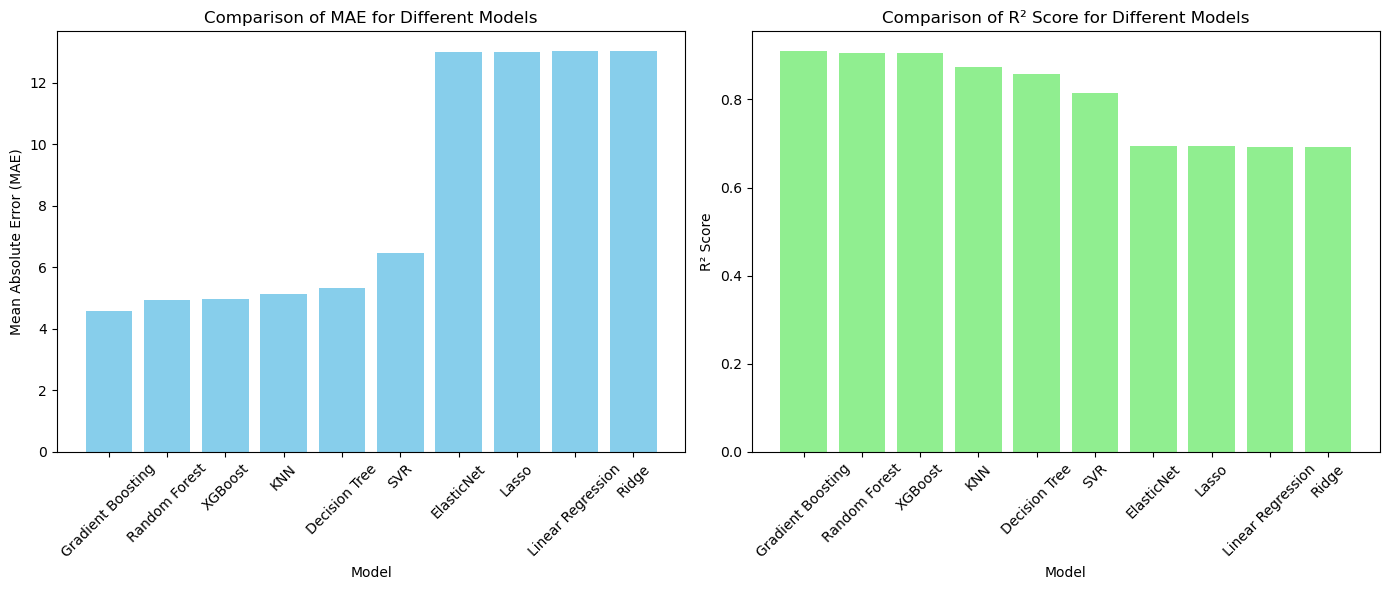

In [249]:
# Create a figure with 1 row and 2 columns
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Bar plot for MAE (first column)
ax[0].bar(df_results['Model'], df_results['MAE'], color='skyblue')
ax[0].set_xlabel('Model')
ax[0].set_ylabel('Mean Absolute Error (MAE)')
ax[0].set_title('Comparison of MAE for Different Models')
ax[0].tick_params(axis='x', rotation=45)

# Bar plot for R² (second column)
ax[1].bar(df_results['Model'], df_results['R²'], color='lightgreen')
ax[1].set_xlabel('Model')
ax[1].set_ylabel('R² Score')
ax[1].set_title('Comparison of R² Score for Different Models')
ax[1].tick_params(axis='x', rotation=45)

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plots
plt.show()

Ensemble Models Dominate:
    Gradient Boosting, Random Forest, and XGBoost performed the best, showing the power of ensemble methods for this regression task.

KNN Performed Moderately:
    KNN was effective but still far behind ensemble models, indicating it is not as robust for complex data.

Linear Models Performed Poorly:
    Ridge, Lasso, ElasticNet, and Linear Regression struggled to explain the variance in the data, likely due to the non-linear relationships between features and the target variable.

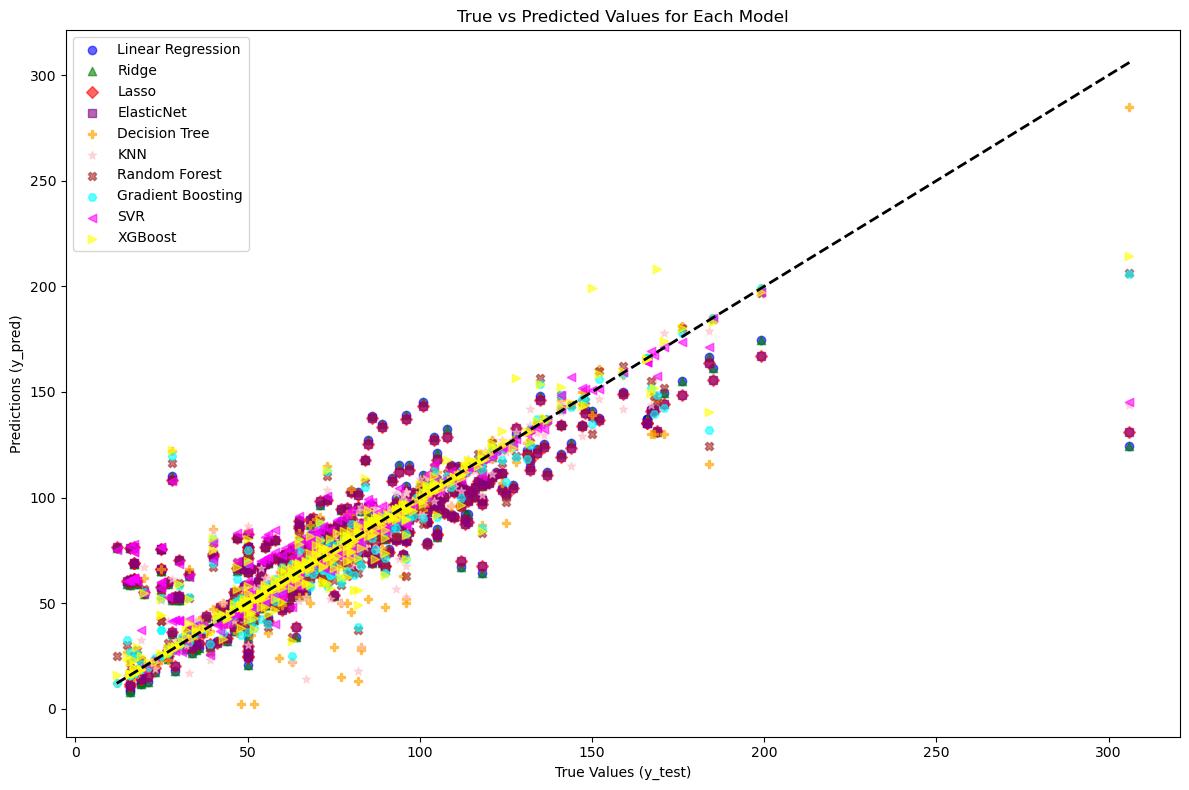

In [250]:
# Prepare the data for plotting
model_names = list(results.keys())
y_test_all = np.array([y_test] * len(model_names))  # List of y_test repeated for each model
y_pred_all = []

# Generate predictions for each model and store them
for name in model_names:
    best_model = grids[name].best_estimator_
    y_pred = best_model.predict(X_test)
    y_pred_all.append(y_pred)

# Convert list to a NumPy array
y_pred_all = np.array(y_pred_all)

# Define colors and markers
colors = ['blue', 'green', 'red', 'purple', 'orange', 'pink', 'brown', 'cyan', 'magenta', 'yellow']
markers = ['o', '^', 'D', 's', 'P', '*', 'X', 'H', '<', '>']

# Create the plot
plt.figure(figsize=(12, 8))

# Loop through the models and plot y_test vs y_pred for each one
for i, name in enumerate(model_names):
    plt.scatter(y_test_all[i], y_pred_all[i], label=name, color=colors[i], marker=markers[i], alpha=0.6)

# Plot a reference line (perfect predictions)
plt.plot([min(y_test_all.flatten()), max(y_test_all.flatten())], 
         [min(y_test_all.flatten()), max(y_test_all.flatten())], color='black', linestyle='--', lw=2)

# Labels and title
plt.xlabel('True Values (y_test)')
plt.ylabel('Predictions (y_pred)')
plt.title('True vs Predicted Values for Each Model')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

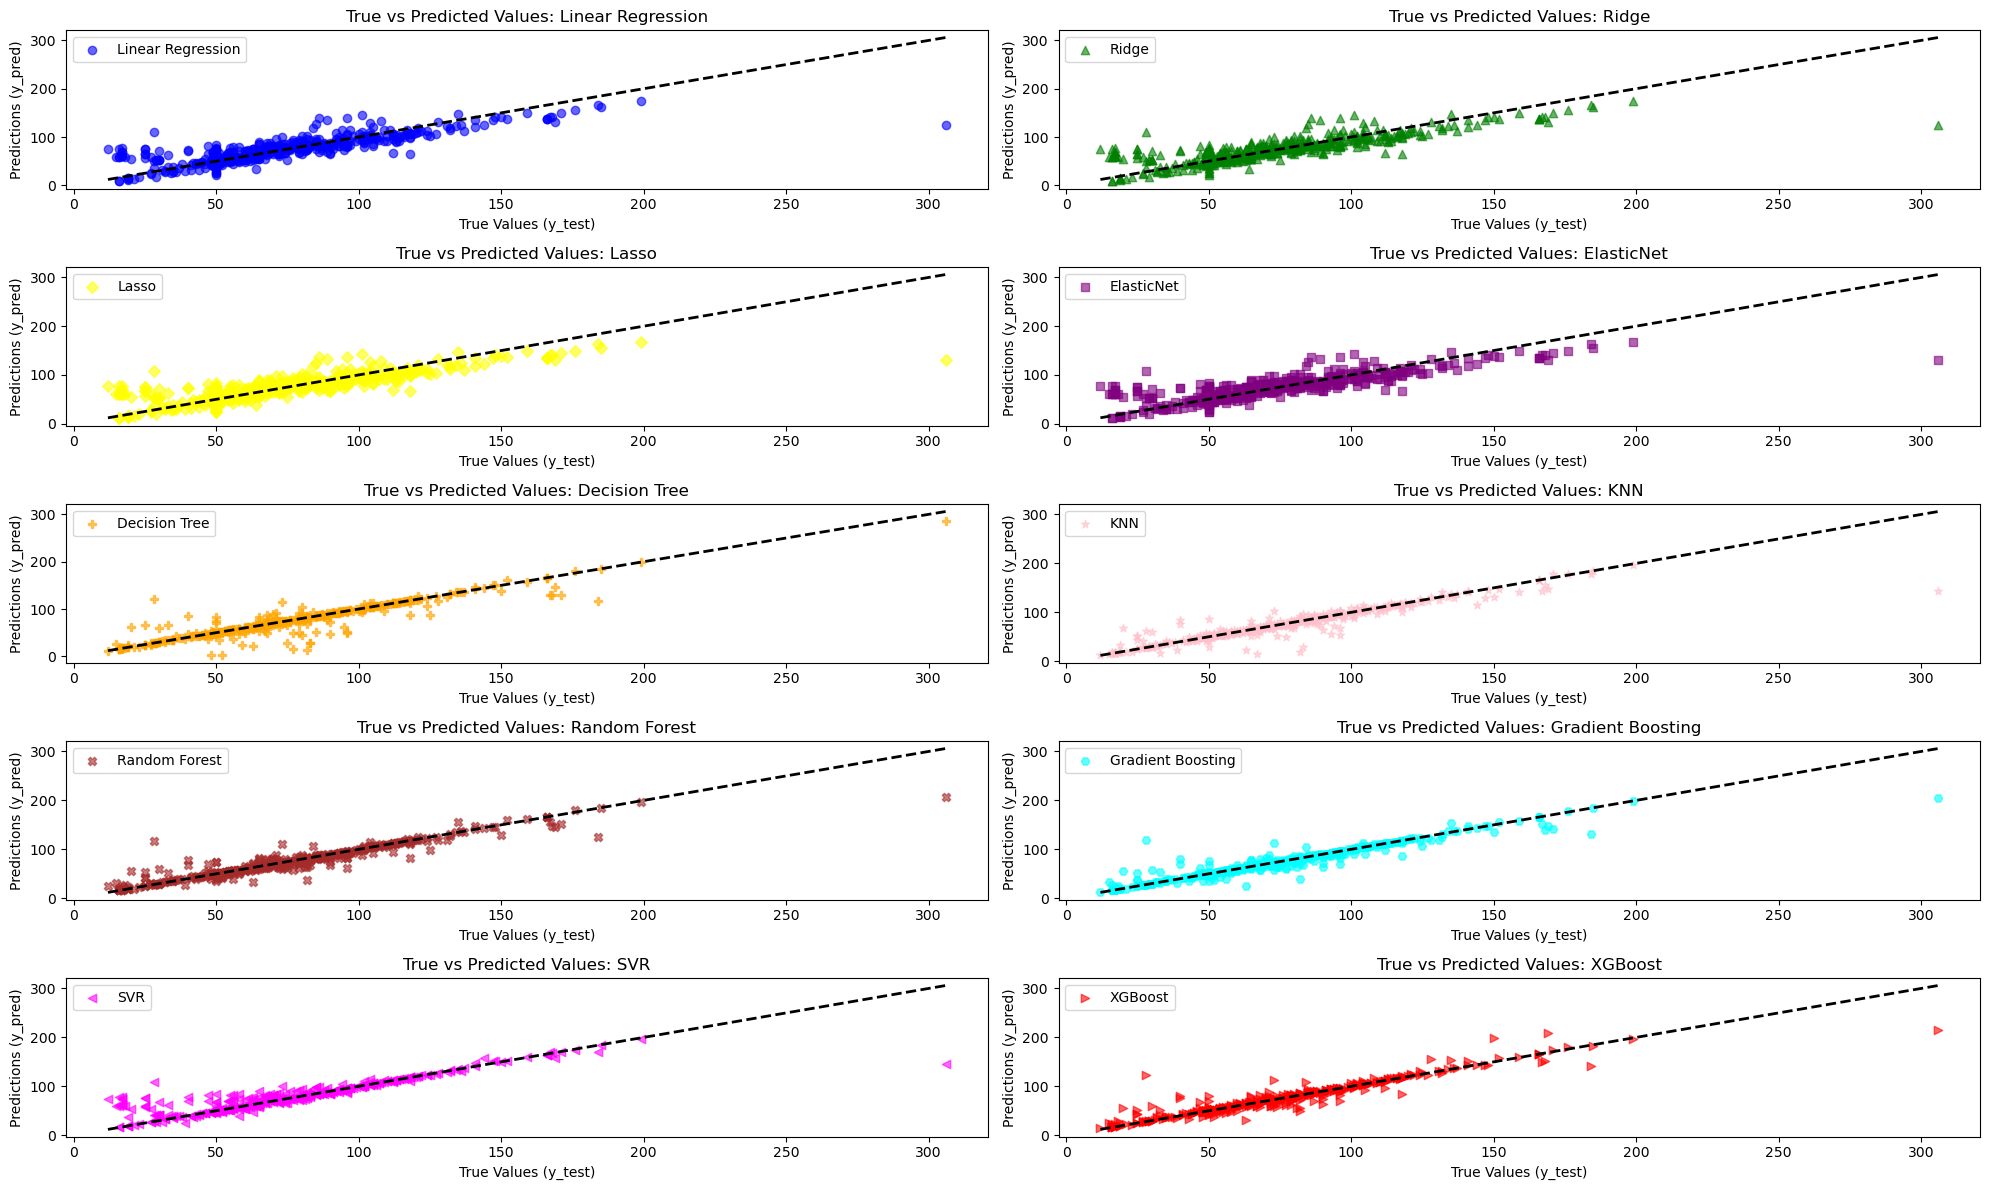

In [259]:
# Prepare the data for plotting
model_names = list(results.keys())
y_test_all = np.array([y_test] * len(model_names))  # List of y_test repeated for each model
y_pred_all = []

# Generate predictions for each model and store them
for name in model_names:
    best_model = grids_r[name].best_estimator_
    y_pred = best_model.predict(X_test)
    y_pred_all.append(y_pred)

# Convert list to a NumPy array
y_pred_all = np.array(y_pred_all)

# Define colors and markers
colors = ['blue', 'green', 'yellow', 'purple', 'orange', 'pink', 'brown', 'cyan', 'magenta', 'red']
markers = ['o', '^', 'D', 's', 'P', '*', 'X', 'H', '<', '>']

# Create the figure with 2 columns (adjust the number of rows depending on your model count)
num_models = len(model_names)
ncols = 2
nrows = (num_models + 1) // ncols  # This ensures we have enough rows to accommodate all models
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 12))

# Flatten the axes array if it's 2D (more than one row)
axes = axes.flatten()

# Loop through the models and plot y_test vs y_pred for each one
for i, name in enumerate(model_names):
    ax = axes[i]  # Select the appropriate axis
    ax.scatter(y_test_all[i], y_pred_all[i], label=name, color=colors[i], marker=markers[i], alpha=0.6)
    ax.plot([min(y_test_all.flatten()), max(y_test_all.flatten())], 
            [min(y_test_all.flatten()), max(y_test_all.flatten())], color='black', linestyle='--', lw=2)
    ax.set_xlabel('True Values (y_test)')
    ax.set_ylabel('Predictions (y_pred)')
    ax.set_title(f'True vs Predicted Values: {name}')
    ax.legend(loc='best')

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plots
plt.show()

Gradient Boosting, Random Forest, and XGBoost are the best-performing models. Their predictions align closely with the true values, indicating they effectively capture non-linear patterns.

Linear Models (Linear Regression, Ridge, Lasso, ElasticNet) fail to generalize for larger AQI values due to their linear assumptions.

Models like Decision Tree and KNN exhibit overfitting or high variance, leading to less accurate predictions for extreme cases.

SVR underperforms for high AQI values.

Overall, the models successfully capture mid-range AQI values but need improvements for extreme pollution levels.

In [263]:
best_model_pipeline_r = grid_search_r.best_estimator_

# Access the actual GradientBoostingRegressor model from the pipeline
best_model_r = best_model_pipeline_r.named_steps['model']

# Check if the model has feature_importances_ and extract them
if hasattr(best_model_r, 'feature_importances_'):
    feature_importances = best_model_r.feature_importances_
    print("Feature Importances:", feature_importances)
else:
    print("The model does not have feature_importances_.")


Feature Importances: [0.1055193  0.05321871 0.06371634 0.02717044 0.05309958 0.69727564]


In [253]:
# Assuming your feature names are as follows:
feature_names = ['CO', 'O3', 'NO2', 'SO2', 'PM10', 'PM2.5']

# Access the best model inside the pipeline
best_model_pipeline = grid_search.best_estimator_
best_model = best_model_pipeline.named_steps['model']

# Check if the model has feature_importances_ and extract them
if hasattr(best_model, 'feature_importances_'):
    feature_importances = best_model.feature_importances_

    # Create a DataFrame to display the feature importances with names
    feature_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': feature_importances
    })

    # Sort the DataFrame by importance in descending order
    feature_df = feature_df.sort_values(by='Importance', ascending=False)

    print(feature_df)
else:
    print("The model does not have feature_importances_.")


  Feature  Importance
5   PM2.5    0.697276
0      CO    0.105519
2     NO2    0.063716
1      O3    0.053219
4    PM10    0.053100
3     SO2    0.027170


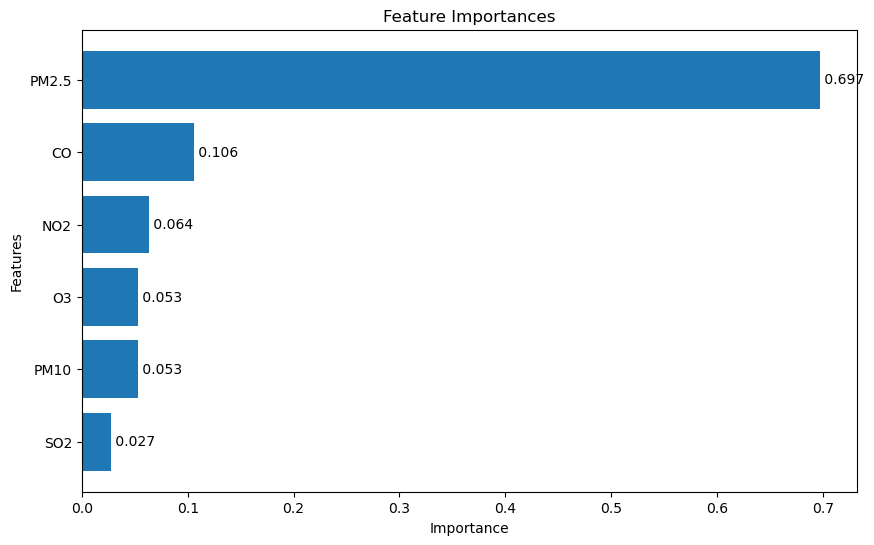

In [254]:
# Sort the feature importances in descending order
feature_df = feature_df.sort_values(by='Importance', ascending=True)

# Create a horizontal bar plot
plt.figure(figsize=(10, 6))
plt.barh(feature_df['Feature'], feature_df['Importance'])

# Customize the plot
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Features')

# Add value labels to the end of each bar
for i, v in enumerate(feature_df['Importance']):
    plt.text(v, i, f' {v:.3f}', va='center')

# Adjust layout and display


PM2.5 Dominates:
        PM2.5 is known to have severe health impacts due to its small size, which can penetrate deep into the lungs and bloodstream.

CO (Carbon Monoxide):
         Carbon monoxide is associated with combustion processes and impacts air quality, though less critical than PM2.5.

NO2, O3, and PM10:
                These pollutants still influence air quality but are less significant compared to PM2.5.

Controlling PM2.5 emissions should be the primary focus for improving air quality. Policies targeting vehicle emissions, industrial outputs, and burning activities can significantly reduce PM2.5 levels.

Secondary Importance of CO:
    CO's contribution highlights the need to monitor traffic emissions and combustion activities more closely.

In [560]:
import pickle

# Find the best model based on MAE
best_model_name = min(results_r, key=lambda x: results_r[x]['MAE'])


# Retrieve the best estimator from GridSearchCV
best_model = grids_r[best_model_name].best_estimator_

# Save the best model to a pickle file
with open(f"best_model_{best_model_name}.pkl", "wb") as model_file:
    pickle.dump(best_model, model_file)

print(f"Best model Regresion '{best_model_name}' saved successfully as 'best_model_{'Regresion_'+best_model_name}.pkl'")


Best model Regresion 'Gradient Boosting' saved successfully as 'best_model_Regresion_Gradient Boosting.pkl'


In [268]:
#with open("best_model_XGBoost Classifier.pkl", "rb") as model_file:
    #loaded_model = pickle.load(model_file)


#y_pred = loaded_model.predict(X_test)
#print("Predictions:", y_pred)

# Classification


## Classification with Description

In [533]:
df

DateTime  Province     CO     O3   NO2   SO2   PM10  PM2.5  \
0     1396/06/01 11:00:00    Alborz   25.0   50.0  52.0  29.0   19.0   48.0   
1534  1396/06/13 11:00:00     سمنان   12.0   29.0  50.0  13.0   14.0   37.0   
1533  1396/06/12 11:00:00     سمنان   21.0   28.0  52.0  16.0   17.0   47.0   
1532  1396/06/12 11:00:00     سمنان   36.0   25.0  19.0  25.0   36.0   21.0   
1531  1396/06/11 11:00:00     سمنان   13.0   33.0  50.0  12.0   14.0   38.0   
...                   ...       ...    ...    ...   ...   ...    ...    ...   
615   1396/06/28 11:00:00   Isfahan  230.0   98.0  89.0   9.0  124.0   57.0   
776   1396/06/21 11:00:00    Qazvin  140.0  120.0  47.0   9.0  336.0  330.0   
820   1396/06/01 11:00:00  Golestan  222.0   86.0  68.0   5.0  134.0   58.0   
1713  1396/06/08 11:00:00    Tehran   77.0  127.0  62.0  23.0  242.0  329.0   
1394  1396/06/25 11:00:00   Markazi  286.0  178.0  50.0  75.0   39.0   75.0   

      AQI  AQI Average   AQI Description  Cluster  Cluster_4  Cluster_3  
0      50           25         Excellent        2          2          2  
1534   37           25         Excellent        2          2          2  
1533   47           25         Excellent        2          2          2  
1532   21           25         Excellent        2          2          2  
1531   38           25         Excellent        2          2          2  
...   ...          ...               ...      ...        ...        ...  
615   230          350  Heavily Polluted        4          1          1  
776   336          350  Heavily Polluted        4          1          1  
820   222          350  Heavily Polluted        4          1          1  
1713  329          350  Heavily Polluted        4          1          1  
1394  286          350  Heavily Polluted        4          1          1  

[2090 rows x 14 columns]

In [189]:
X_cc =df[['CO', 'O3', 'NO2', 'SO2', 'PM10', 'PM2.5']].values  

y_cc = df['AQI Description']

# Verify the shapes of X_c and y_c
print(f"Shape of X_cc: {X_cc.shape}")
print(f"Shape of y_cc: {y_cc.shape}")

Shape of X_cc: (2090, 6)
Shape of y_cc: (2090,)


In [190]:
y_cc

0              Excellent
1534           Excellent
1533           Excellent
1532           Excellent
1531           Excellent
              ...       
615     Heavily Polluted
776     Heavily Polluted
820     Heavily Polluted
1713    Heavily Polluted
1394    Heavily Polluted
Name: AQI Description, Length: 2090, dtype: category
Categories (5, object): ['Excellent' < 'Good' < 'Lightly Polluted' < 'Moderately Polluted' < 'Heavily Polluted']

In [191]:
X_train_cc, X_test_cc, y_train_cc, y_test_cc = train_test_split(X_cc, y_cc, test_size=0.2, random_state=42)

In [192]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score,recall_score,confusion_matrix

In [198]:
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold

# Create StratifiedKFold object
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Encode the target variable (if not already numeric)
encoder = LabelEncoder()
y_train_cc = encoder.fit_transform(y_train_cc)
y_test_cc = encoder.transform(y_test_cc)

In [404]:
y_train_cc

array([1, 4, 0, ..., 1, 1, 1])

In [200]:
# Define pipelines and parameter grids
pipelines = {
    "Logistic Regression": Pipeline([
        ('scaler', StandardScaler()),  # Add scaler
        ('model', LogisticRegression())
    ]),
    "Ridge Classifier": Pipeline([
        ('scaler', StandardScaler()),  # Add scaler
        ('model', RidgeClassifier())
    ]),
    "Decision Tree Classifier": Pipeline([
        ('model', DecisionTreeClassifier(random_state=42))
    ]),
    "KNN Classifier": Pipeline([
        ('scaler', StandardScaler()),  # Add scaler
        ('model', KNeighborsClassifier())
    ]),
    "Random Forest Classifier": Pipeline([
        ('model', RandomForestClassifier(random_state=42))
    ]),
    "Gradient Boosting Classifier": Pipeline([
        ('model', GradientBoostingClassifier(random_state=42))
    ]),
    "Support Vector Classifier (SVC)": Pipeline([
        ('scaler', StandardScaler()),  # Add scaler
        ('model', SVC(probability=True))
    ]),
    "XGBoost Classifier": Pipeline([
        ('model', XGBClassifier(random_state=42))
    ])
}

param_grids_cc = {
    "Logistic Regression": {
        'model__C': np.logspace(-4, 4, 20),
        'model__solver': ['lbfgs', 'liblinear', 'saga']
    },
    "Ridge Classifier": {
        'model__alpha': np.logspace(-4, 3, 20)
    },
    "Decision Tree Classifier": {
        'model__criterion': ['gini', 'entropy'],
        'model__max_depth': [None, 5, 10, 20],
        'model__min_samples_split': [2, 5, 10],
        'model__min_samples_leaf': [1, 2, 4]
    },
    "KNN Classifier": {
        'model__n_neighbors': range(1, 21, 2),
        'model__weights': ['uniform', 'distance'],
        'model__metric': ['euclidean', 'manhattan', 'minkowski']
    },
    "Random Forest Classifier": {
        'model__n_estimators': [50, 100, 200],
        'model__max_depth': [None, 10, 20],
        'model__min_samples_split': [2, 5],
        'model__min_samples_leaf': [1, 2],
        'model__max_features': ['sqrt', 'log2']
    },
    "Gradient Boosting Classifier": {
        'model__n_estimators': [50, 100, 200],
        'model__learning_rate': [0.01, 0.1],
        'model__max_depth': [3, 5, 7],
        'model__subsample': [0.8, 1.0]
    },
    "Support Vector Classifier (SVC)": {
        'model__kernel': ['rbf', 'sigmoid'],
        'model__C': [0.1, 1, 10],
        'model__gamma': ['scale', 'auto']
   }
    ,
    "XGBoost Classifier": {
        'model__n_estimators': [50, 100, 200],
        'model__learning_rate': [0.01, 0.1],
        'model__max_depth': [3, 5, 7],
        'model__subsample': [0.8, 1.0],
        'model__colsample_bytree': [0.8, 1.0]
    }}

In [201]:
scoring = ['recall_macro', 'f1_macro', 'roc_auc_ovr']

grids_cc = {
    name: GridSearchCV(pipeline, param_grids_cc[name], scoring=scoring, refit='recall_macro', verbose=0, n_jobs=-1, cv=kf)
    for name, pipeline in pipelines.items()
}

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

# Manually define feature names
feature_names_cc = ['CO', 'O3', 'NO2', 'SO2', 'PM10', 'PM2.5']

# Initialize dictionaries for storing results and feature importance
results_cc = {}
feature_importance_results_cc = {}

# Fit all models and store results
for name_cc, grid_search_cc in grids_cc.items():
    try:
        # Fit the model with training data
        grid_search_cc.fit(X_train_cc, y_train_cc)
        
        # Get the best estimator and make predictions
        best_model_cc = grid_search_cc.best_estimator_
        y_pred_cc = best_model_cc.predict(X_test_cc)
        
        # For ROC AUC, we need probability predictions
        y_pred_proba_c = best_model_cc.predict_proba(X_test_cc)
        
        # Calculate metrics
        accuracy_cc = accuracy_score(y_test_cc, y_pred_cc)
        recall_cc = recall_score(y_test_cc, y_pred_cc, average='macro')
        f1_cc = f1_score(y_test_cc, y_pred_cc, average='macro')

               
        # For multiclass ROC AUC, we use OneVsRestClassifier
        n_classes = len(np.unique(y_test_cc))
        y_test_bin_c = label_binarize(y_test_cc, classes=np.unique(y_test_cc))
        roc_auc_cc = roc_auc_score(y_test_bin_c, y_pred_proba_c, multi_class='ovr', average='macro')
        
        # Store the results and best parameters
        results_cc[name_cc] = {
            'Accuracy': accuracy_cc,
            'Recall': recall_cc,
            'F1-score': f1_cc,
            'ROC AUC': roc_auc_cc,
            'Best Params': grid_search_cc.best_params_
        }
        
        # Extract Feature Importances for Tree-based Models
        best_model_pipeline_cc = best_model_cc
        if hasattr(best_model_pipeline_cc, 'feature_importances_'):
            importances = best_model_pipeline_cc.feature_importances_
            feature_df = pd.DataFrame({
                'Feature': feature_names_cc,
                'Importance': importances
            }).sort_values(by='Importance', ascending=False)

            feature_importance_results_cc[name_cc] = feature_df
            print(f"Feature Importances for {name_cc}:")
            print(feature_df)
            print()

        # Extract Coefficients for Linear Models (e.g., Logistic Regression)
        elif hasattr(best_model_pipeline_cc, 'coef_'):
            coefficients_cc = best_model_pipeline_cc.coef_[0]  # Assuming binary classification
            feature_df_cc = pd.DataFrame({
                'Feature': feature_names_cc,
                'Coefficient': coefficients_cc
            }).sort_values(by='Coefficient', ascending=False)

            feature_importance_results_cc[name_cc] = feature_df_cc
            print(f"Coefficients for {name_cc}:")
            print(feature_df_cc)
            print()
        
        # Print results for this model
        print(f"{name_cc}:")
        print(f"  Accuracy: {accuracy_cc:.4f}")
        print(f"  Recall: {recall_cc:.4f}")
        print(f"  F1-score: {f1_cc:.4f}")
        print(f"  ROC AUC: {roc_auc_cc:.4f}")
        print(f"  Best Params: {grid_search_cc.best_params_}")
        print()
        
    except Exception as e:
        print(f"Error occurred with {name_cc}: {str(e)}")
        print()

Logistic Regression:
  Accuracy: 0.7727
  Recall: 0.5854
  F1-score: 0.6108
  ROC AUC: 0.8662
  Best Params: {'model__C': 11.288378916846883, 'model__solver': 'lbfgs'}

Error occurred with Ridge Classifier: 'RidgeClassifier' object has no attribute 'predict_proba'

Decision Tree Classifier:
  Accuracy: 0.9067
  Recall: 0.7029
  F1-score: 0.7081
  ROC AUC: 0.8367
  Best Params: {'model__criterion': 'entropy', 'model__max_depth': None, 'model__min_samples_leaf': 1, 'model__min_samples_split': 2}

KNN Classifier:
  Accuracy: 0.9258
  Recall: 0.9131
  F1-score: 0.9268
  ROC AUC: 0.9444
  Best Params: {'model__metric': 'euclidean', 'model__n_neighbors': 1, 'model__weights': 'uniform'}

Random Forest Classifier:
  Accuracy: 0.9282
  Recall: 0.7103
  F1-score: 0.7219
  ROC AUC: 0.9897
  Best Params: {'model__max_depth': None, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 1, 'model__min_samples_split': 2, 'model__n_estimators': 200}

Gradient Boosting Classifier:
  Accuracy: 0.9426

In this analysis, I employed a variety of machine learning classification models to predict the Air Quality Index (AQI) description. The models include both traditional and ensemble methods, ensuring a robust comparison of their performance. Below is an overview of each model, its purpose, and how it was configured.

1. Logistic Regression

        Logistic Regression is a linear model used for binary and multiclass classification problems. It estimates the probability of a class using the logistic (sigmoid) function.
    Hyperparameters Tuned:
        C: Inverse of regularization strength (controls overfitting).
        solver: Algorithm for optimization (lbfgs, liblinear, saga).
    Pipeline: Includes StandardScaler for feature scaling.

2. Ridge Classifier

        Ridge Classifier applies L2 regularization to logistic regression, reducing the risk of overfitting while maintaining a linear decision boundary.
    Hyperparameters Tuned:
        alpha: Regularization strength.
    Pipeline: Includes StandardScaler for scaling.

3. Decision Tree Classifier

       A tree-based model that splits the data into decision nodes based on feature thresholds. It is interpretable but prone to overfitting.
    Hyperparameters Tuned:
        criterion: Split criteria (gini, entropy).
        max_depth: Limits tree depth to control overfitting.
        min_samples_split: Minimum samples to split a node.
        min_samples_leaf: Minimum samples per leaf node.

4. K-Nearest Neighbors (KNN)

        KNN is a non-parametric algorithm that classifies a sample based on the majority class among its nearest neighbors.
    Hyperparameters Tuned:
        n_neighbors: Number of neighbors to consider.
        weights: Weighting scheme (uniform, distance).
        metric: Distance metric (euclidean, manhattan, minkowski).
    Pipeline: Includes StandardScaler for scaling.

5. Random Forest Classifier

        An ensemble model that builds multiple decision trees and combines their predictions. It reduces overfitting and increases generalization.
    Hyperparameters Tuned:
        n_estimators: Number of trees in the forest.
        max_depth: Maximum depth of each tree.
        min_samples_split, min_samples_leaf: Control splits and leaves.
        max_features: Number of features to consider at each split.

6. Gradient Boosting Classifier

        An ensemble method that builds trees sequentially, with each tree correcting errors from the previous ones. It is efficient and accurate for structured data.
    Hyperparameters Tuned:
        n_estimators: Number of boosting stages.
        learning_rate: Shrinks the contribution of each tree.
        max_depth: Maximum depth of individual trees.
        subsample: Fraction of samples used for fitting each tree.

7. Support Vector Classifier (SVC)

       SVC uses hyperplanes to separate classes and is effective for high-dimensional data. The RBF kernel allows it to model non-linear decision boundaries.
    Hyperparameters Tuned:
        C: Regularization parameter.
        kernel: Type of kernel (rbf, sigmoid).
        gamma: Kernel coefficient (scale, auto).
    Pipeline: Includes StandardScaler for scaling.

8. XGBoost Classifier

       XGBoost is a powerful gradient boosting algorithm optimized for speed and performance. It is widely used for classification problems.
    Hyperparameters Tuned:
        n_estimators: Number of boosting rounds.
        learning_rate: Learning rate to control contribution.
        max_depth: Maximum tree depth.
        subsample: Fraction of data used to grow trees.
        colsample_bytree: Fraction of features used at each split.

Evaluation Metrics

The following metrics were used to evaluate model performance:

    Accuracy: Proportion of correct predictions.
    Recall (Macro): Average recall across all classes, emphasizing sensitivity.
    F1-Score (Macro): Harmonic mean of precision and recall.
    ROC AUC (OvR): Measures the model's ability to distinguish between classes using a One-vs-Rest strategy.

In [464]:
# Convert the results dictionary to a DataFrame
results_df_c = pd.DataFrame.from_dict(results_cc, orient='index')

# Reset the index to make the model names a column
results_df_c = results_df_c.reset_index().rename(columns={'index': 'Model'})

# Sort the DataFrame by Accuracy, then ROC AUC, then F1-score, and finally Recall (all in descending order)
results_df_c_sorted = results_df_c.sort_values(
    by=['Accuracy', 'ROC AUC', 'F1-score', 'Recall'], 
    ascending=[False, False, False, False]
)

# Reorder the columns to include Accuracy first alongside other metrics
results_df_c_sorted = results_df_c_sorted[['Model', 'Accuracy', 'ROC AUC', 'F1-score', 'Recall', 'Best Params']]

# Format the numeric columns to 4 decimal places
numeric_columns_c = ['Accuracy', 'ROC AUC', 'F1-score', 'Recall']
results_df_c_sorted[numeric_columns_c] = results_df_c_sorted[numeric_columns_c].applymap('{:.4f}'.format)

# Display the sorted results
print("Sorted Results:")
print(results_df_c_sorted.to_string(index=False))

# Print the best model and its hyperparameters
best_model_info = results_df_c_sorted.iloc[0]
print("\nBest Model:")
print(best_model_info.to_string())


Sorted Results:
                          Model Accuracy ROC AUC F1-score Recall                                                                                                                                        Best Params
   Gradient Boosting Classifier   0.9426  0.9840   0.7251 0.7222                                          {'model__learning_rate': 0.1, 'model__max_depth': 7, 'model__n_estimators': 200, 'model__subsample': 0.8}
             XGBoost Classifier   0.9330  0.9715   0.7285 0.7266          {'model__colsample_bytree': 1.0, 'model__learning_rate': 0.1, 'model__max_depth': 7, 'model__n_estimators': 100, 'model__subsample': 0.8}
       Random Forest Classifier   0.9282  0.9897   0.7219 0.7103 {'model__max_depth': None, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 1, 'model__min_samples_split': 2, 'model__n_estimators': 200}
                 KNN Classifier   0.9258  0.9444   0.9268 0.9131                                                               {'model__

Top Performing Models

    Gradient Boosting :
          The Gradient Boosting Classifier achieved the highest accuracy and strong ROC AUC, indicating excellent overall performance. It effectively handles non-linear relationships and interactions in the data.

    XGBoost :
         XGBoost performed very close to Gradient Boosting, with slightly lower accuracy but a slightly higher F1-score and Recall. It confirms the robustness of ensemble methods for this task.

    Random Forest :
         The Random Forest Classifier achieved the highest ROC AUC (0.9897), indicating strong ability to separate classes. Its accuracy and F1-score are slightly lower than Gradient Boosting and XGBoost.

Moderate Performers:

    KNN:
        The KNN Classifier achieved the highest F1-score and Recall, showing its strength in correctly classifying both major and minor classes. However, its accuracy is slightly lower compared to ensemble methods.

    Decision Tree:
        Decision Tree achieved moderate performance but shows signs of overfitting (high ROC AUC but lower F1 and Recall).

Lower Performing Models

    Support Vector (SVC):
        SVC achieved strong ROC AUC but lower accuracy and F1-score, suggesting challenges in handling class imbalance or complex relationships.

    Logistic Regression
        Logistic Regression performed the lowest, as it is a linear model and struggles with non-linear relationships in the data.

Best Overall Model:
        Gradient Boosting Classifier achieved the highest accuracy (0.9426) and excellent ROC AUC (0.9840).
    Strong Alternatives:
        XGBoost and Random Forest provide strong competition, particularly with high ROC AUC values.
    KNN Strength:
        KNN excelled in Recall and F1-score, making it useful for classifying underrepresented categories.
    Linear Models:
        Logistic Regression underperformed due to its linear nature, unable to capture complex relationships.


For predicting AQI descriptions, ensemble models like Gradient Boosting, XGBoost, and Random Forest are the most reliable choices due to their high accuracy, balanced F1-scores, and strong ROC AUC values.

In [417]:
print(le.classes_)  # If you used LabelEncoder

['Excellent' 'Good' 'Heavily Polluted' 'Lightly Polluted'
 'Moderately Polluted']


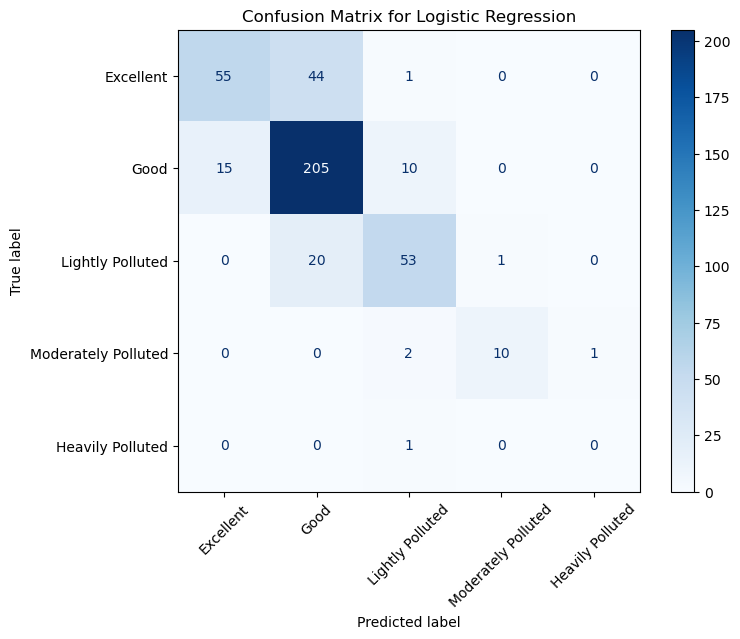

Classification Report for Logistic Regression:
                     precision    recall  f1-score   support

          Excellent       0.79      0.55      0.65       100
               Good       0.76      0.89      0.82       230
   Lightly Polluted       0.79      0.72      0.75        74
Moderately Polluted       0.91      0.77      0.83        13
   Heavily Polluted       0.00      0.00      0.00         1

           accuracy                           0.77       418
          macro avg       0.65      0.59      0.61       418
       weighted avg       0.78      0.77      0.77       418




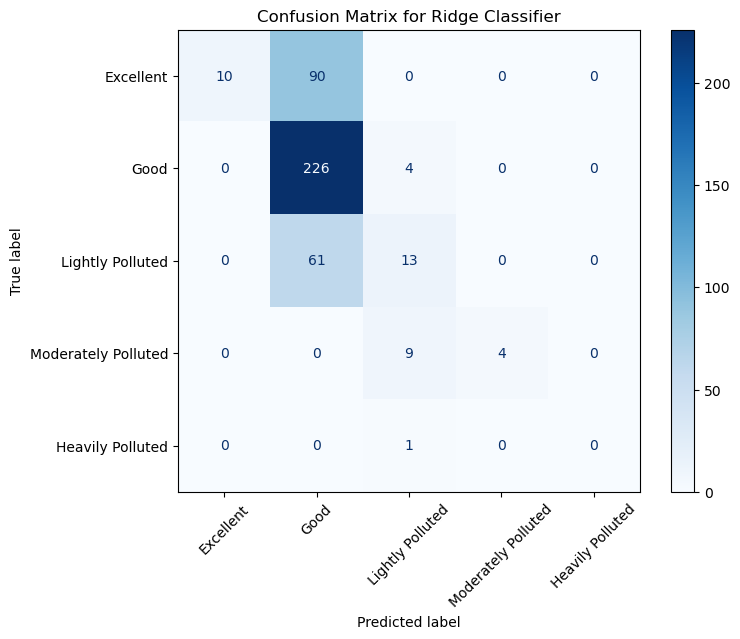

Classification Report for Ridge Classifier:
                     precision    recall  f1-score   support

          Excellent       1.00      0.10      0.18       100
               Good       0.60      0.98      0.74       230
   Lightly Polluted       0.48      0.18      0.26        74
Moderately Polluted       1.00      0.31      0.47        13
   Heavily Polluted       0.00      0.00      0.00         1

           accuracy                           0.61       418
          macro avg       0.62      0.31      0.33       418
       weighted avg       0.69      0.61      0.51       418




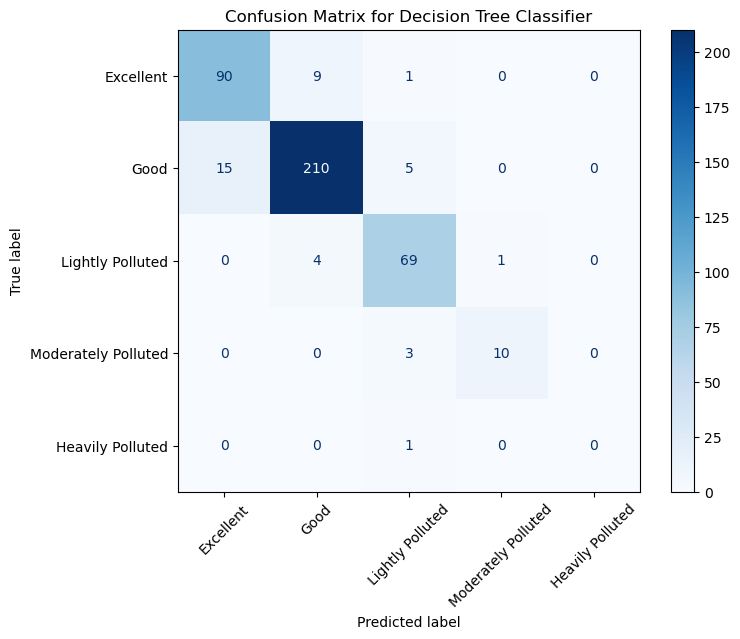

Classification Report for Decision Tree Classifier:
                     precision    recall  f1-score   support

          Excellent       0.86      0.90      0.88       100
               Good       0.94      0.91      0.93       230
   Lightly Polluted       0.87      0.93      0.90        74
Moderately Polluted       0.91      0.77      0.83        13
   Heavily Polluted       0.00      0.00      0.00         1

           accuracy                           0.91       418
          macro avg       0.72      0.70      0.71       418
       weighted avg       0.91      0.91      0.91       418




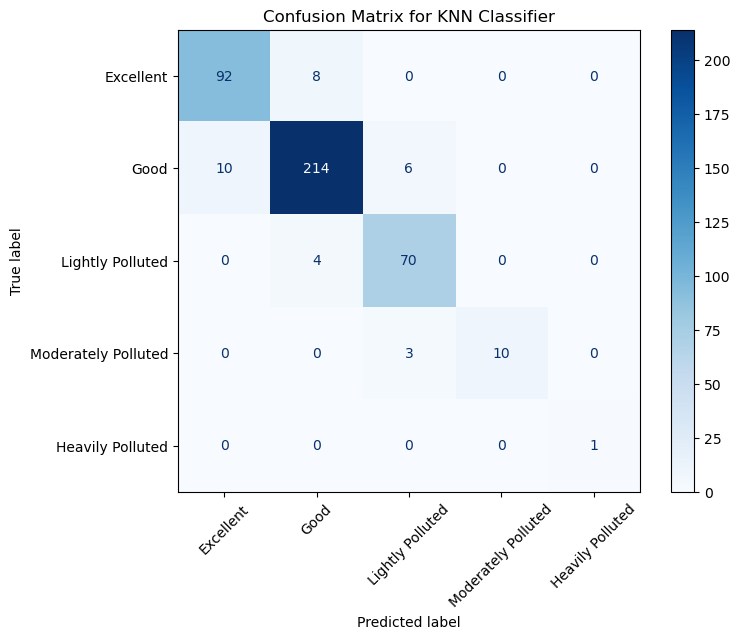

Classification Report for KNN Classifier:
                     precision    recall  f1-score   support

          Excellent       0.90      0.92      0.91       100
               Good       0.95      0.93      0.94       230
   Lightly Polluted       0.89      0.95      0.92        74
Moderately Polluted       1.00      0.77      0.87        13
   Heavily Polluted       1.00      1.00      1.00         1

           accuracy                           0.93       418
          macro avg       0.95      0.91      0.93       418
       weighted avg       0.93      0.93      0.93       418




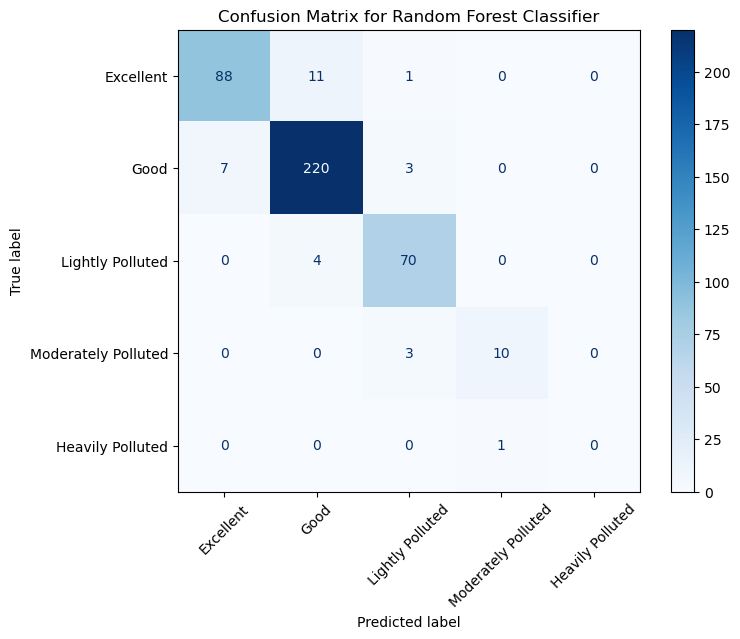

Classification Report for Random Forest Classifier:
                     precision    recall  f1-score   support

          Excellent       0.93      0.88      0.90       100
               Good       0.94      0.96      0.95       230
   Lightly Polluted       0.91      0.95      0.93        74
Moderately Polluted       0.91      0.77      0.83        13
   Heavily Polluted       0.00      0.00      0.00         1

           accuracy                           0.93       418
          macro avg       0.74      0.71      0.72       418
       weighted avg       0.93      0.93      0.93       418




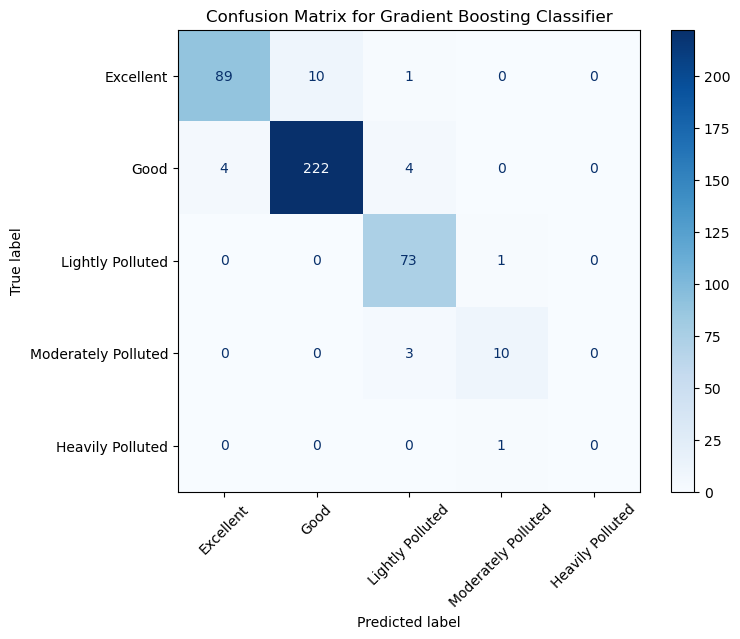

Classification Report for Gradient Boosting Classifier:
                     precision    recall  f1-score   support

          Excellent       0.96      0.89      0.92       100
               Good       0.96      0.97      0.96       230
   Lightly Polluted       0.90      0.99      0.94        74
Moderately Polluted       0.83      0.77      0.80        13
   Heavily Polluted       0.00      0.00      0.00         1

           accuracy                           0.94       418
          macro avg       0.73      0.72      0.73       418
       weighted avg       0.94      0.94      0.94       418




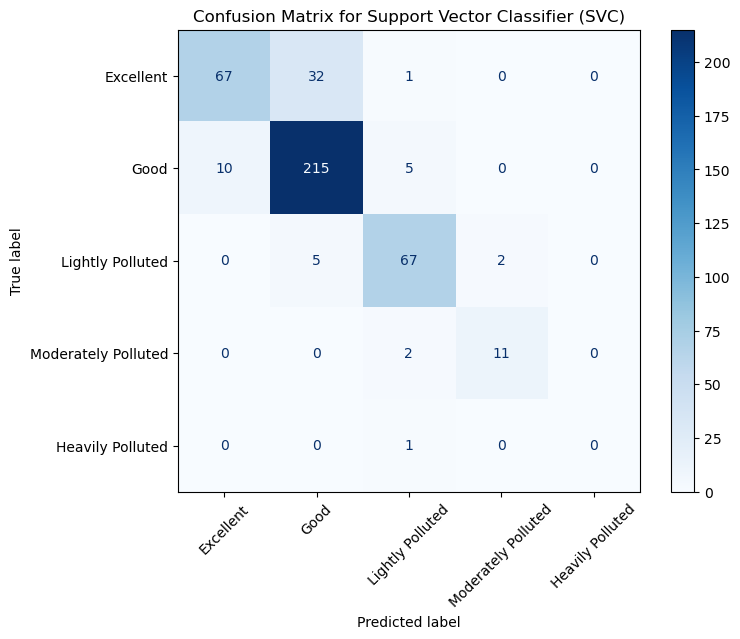

Classification Report for Support Vector Classifier (SVC):
                     precision    recall  f1-score   support

          Excellent       0.87      0.67      0.76       100
               Good       0.85      0.93      0.89       230
   Lightly Polluted       0.88      0.91      0.89        74
Moderately Polluted       0.85      0.85      0.85        13
   Heavily Polluted       0.00      0.00      0.00         1

           accuracy                           0.86       418
          macro avg       0.69      0.67      0.68       418
       weighted avg       0.86      0.86      0.86       418




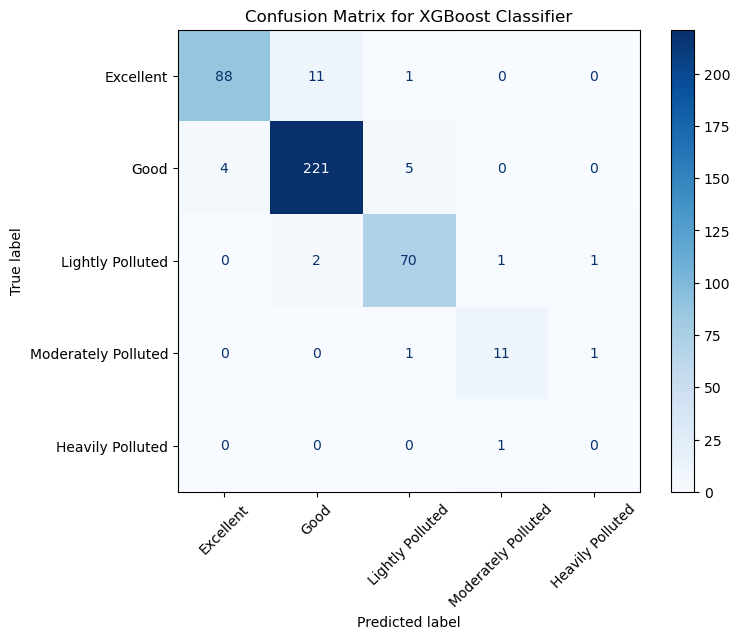

Classification Report for XGBoost Classifier:
                     precision    recall  f1-score   support

          Excellent       0.96      0.88      0.92       100
               Good       0.94      0.96      0.95       230
   Lightly Polluted       0.91      0.95      0.93        74
Moderately Polluted       0.85      0.85      0.85        13
   Heavily Polluted       0.00      0.00      0.00         1

           accuracy                           0.93       418
          macro avg       0.73      0.73      0.73       418
       weighted avg       0.94      0.93      0.93       418




In [449]:
# Define the correct class order and their names
class_order = [0, 1, 3, 4, 2]
class_names = ['Excellent', 'Good', 'Lightly Polluted', 'Moderately Polluted', 'Heavily Polluted']

# Initialize dictionaries for storing confusion matrix and classification reports
confusion_matrices = {}
classification_reports = {}

# Fit all models, store results, and show confusion matrices and classification reports
for name_cc, grid_search_cc in grids_cc.items():
    try:
        # Fit the model
        grid_search_cc.fit(X_train_cc, y_train_cc)
        
        # Get the best estimator and make predictions
        best_model_cc = grid_search_cc.best_estimator_
        y_pred_cc = best_model_cc.predict(X_test_cc)
        
        # Calculate confusion matrix with sorted order
        cm = confusion_matrix(y_test_cc, y_pred_cc, labels=class_order)
        confusion_matrices[name_cc] = cm
        
        # Classification report with sorted target names
        report = classification_report(
            y_test_cc, y_pred_cc, target_names=class_names, labels=class_order, zero_division=0
        )
        classification_reports[name_cc] = report
        
        # Plot confusion matrix with rotated x-axis labels
        fig, ax = plt.subplots(figsize=(8, 6))
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
        disp.plot(cmap='Blues', ax=ax, xticks_rotation=45, values_format='d')
        plt.title(f"Confusion Matrix for {name_cc}")
        plt.show()
        
        # Print classification report
        print(f"Classification Report for {name_cc}:")
        print(report)
        print()
        
    except Exception as e:
        print(f"Error occurred with {name_cc}: {str(e)}")
        print()

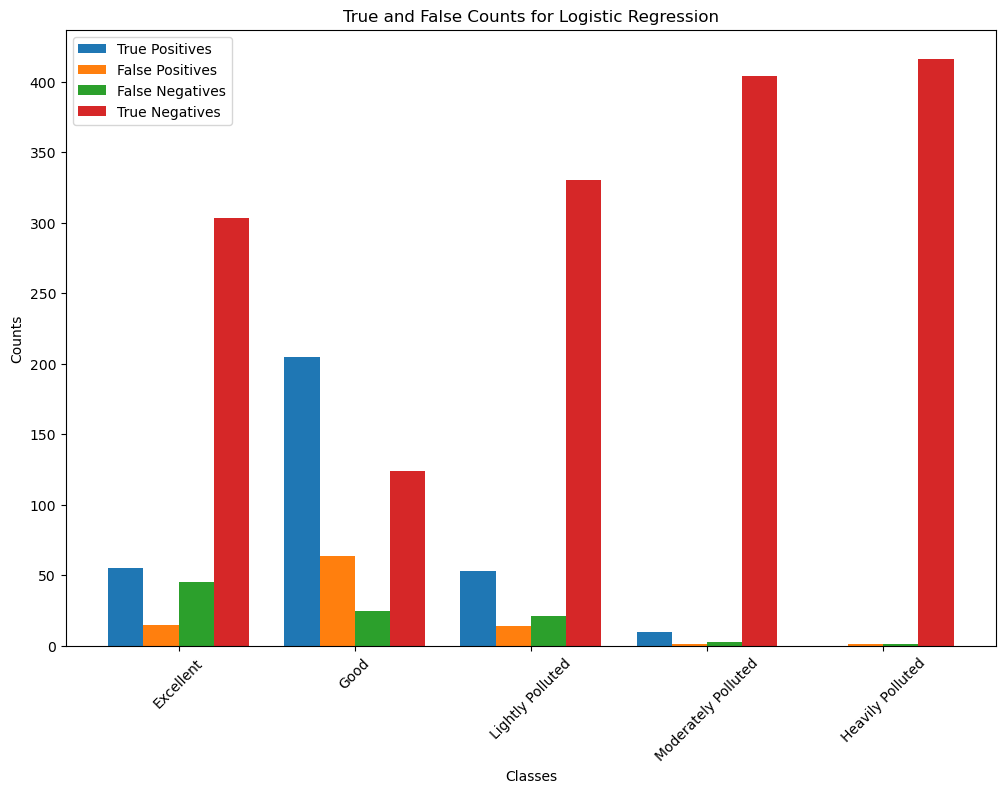

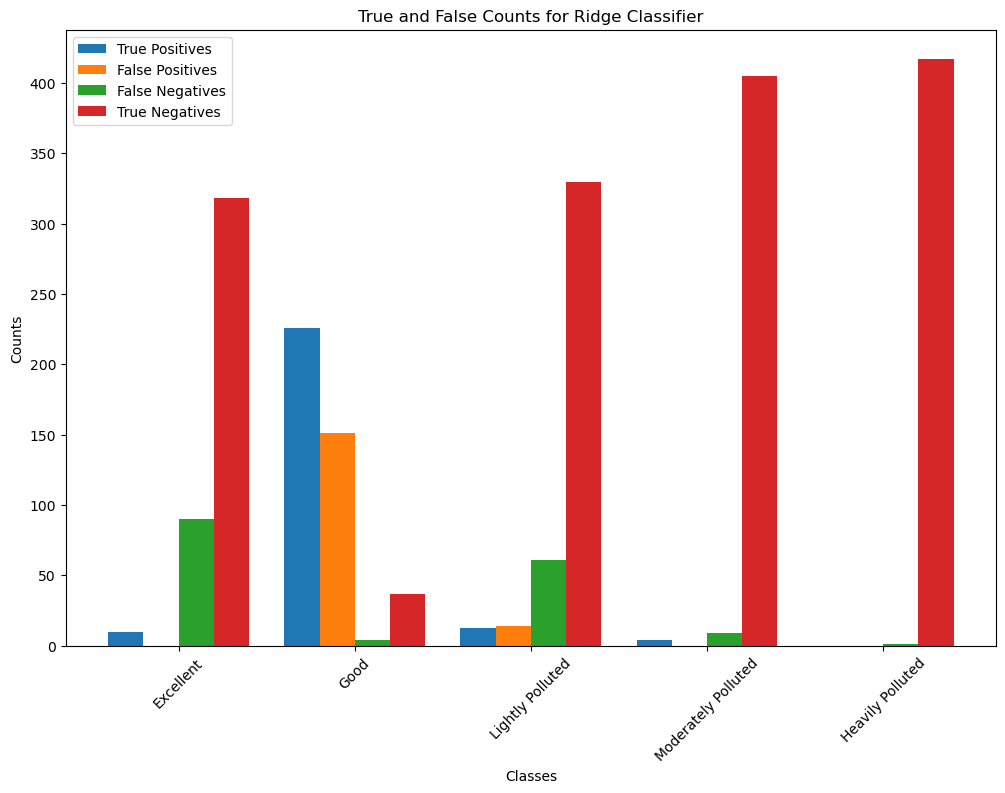

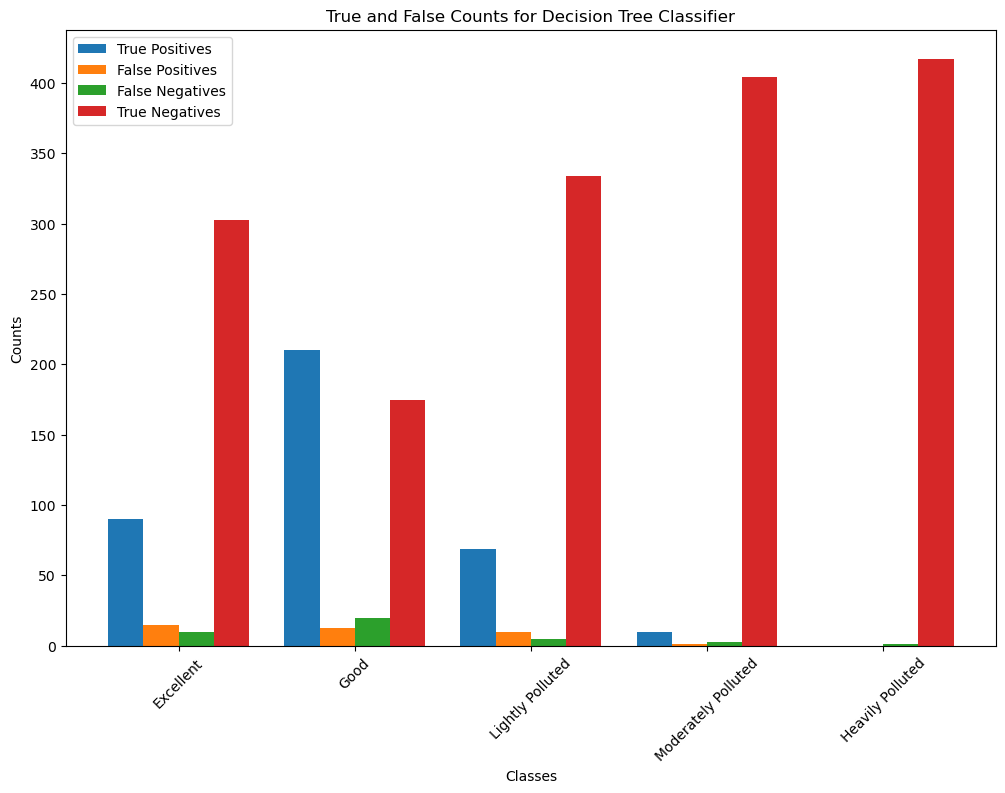

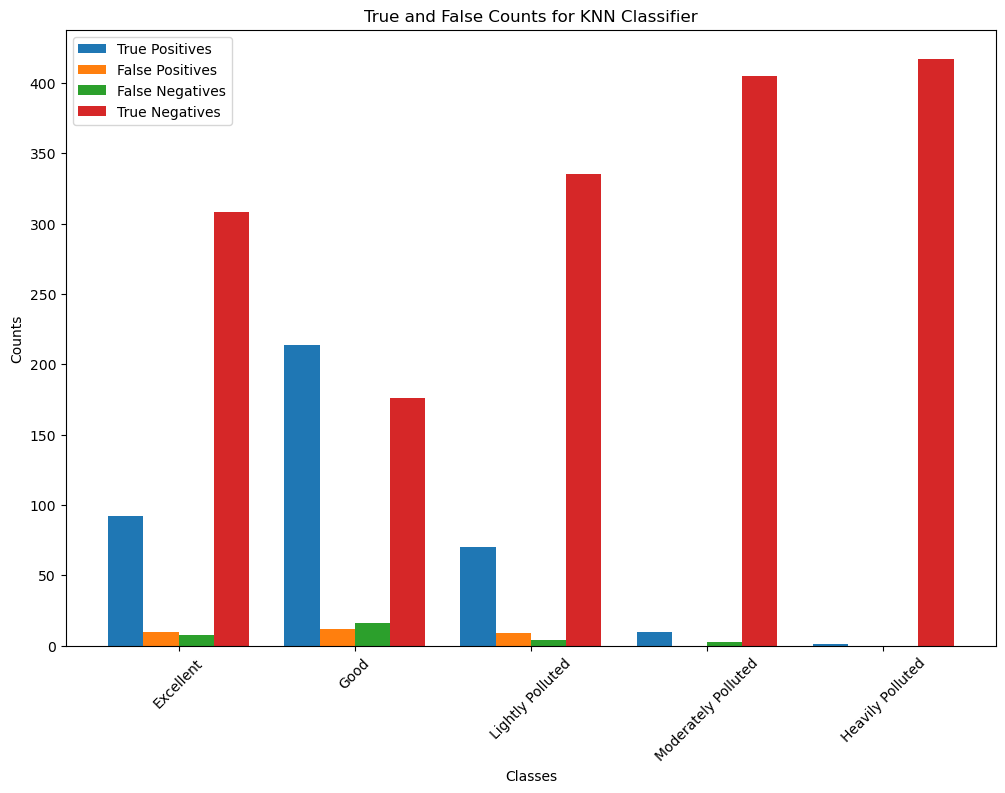

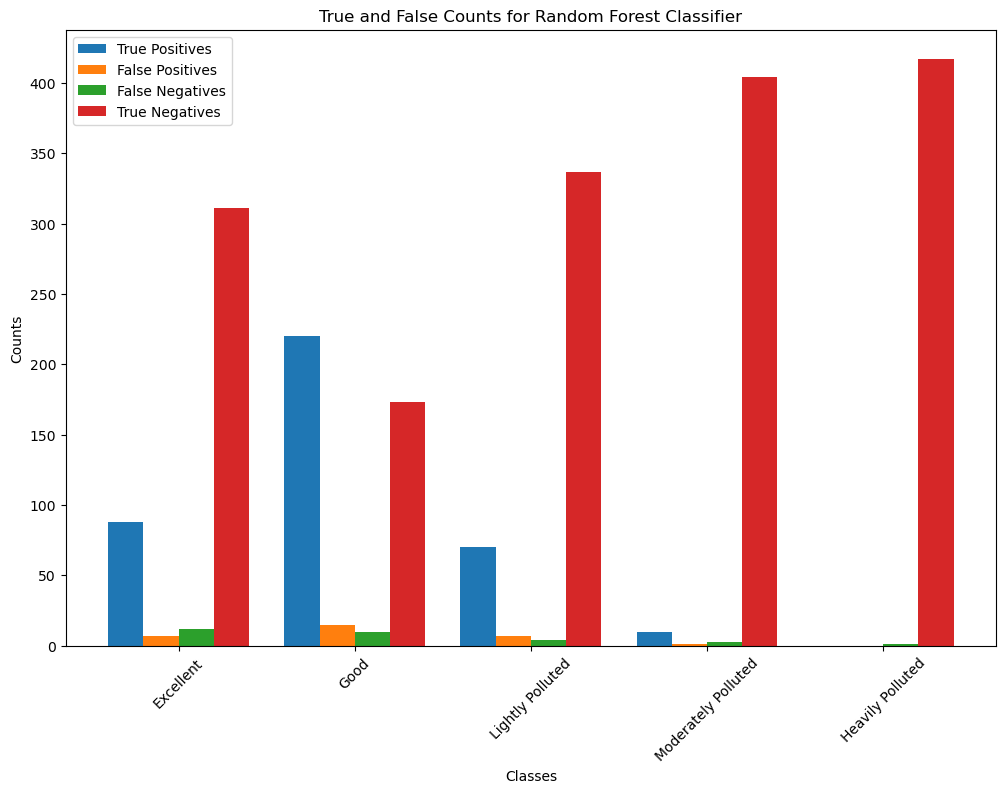

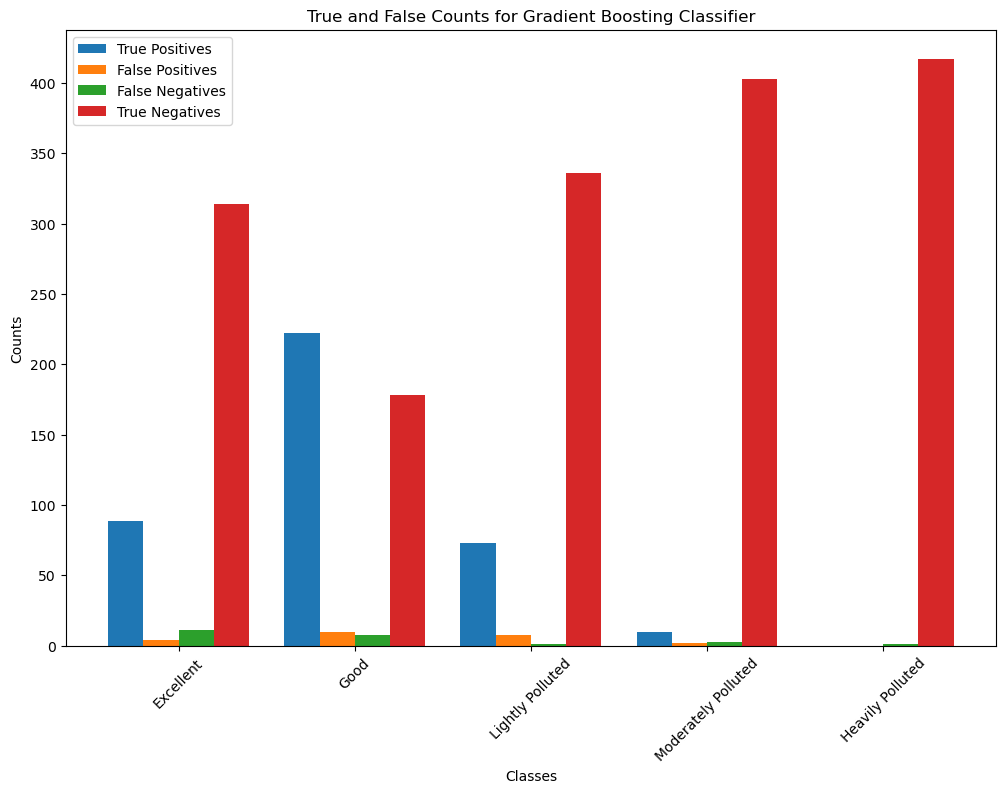

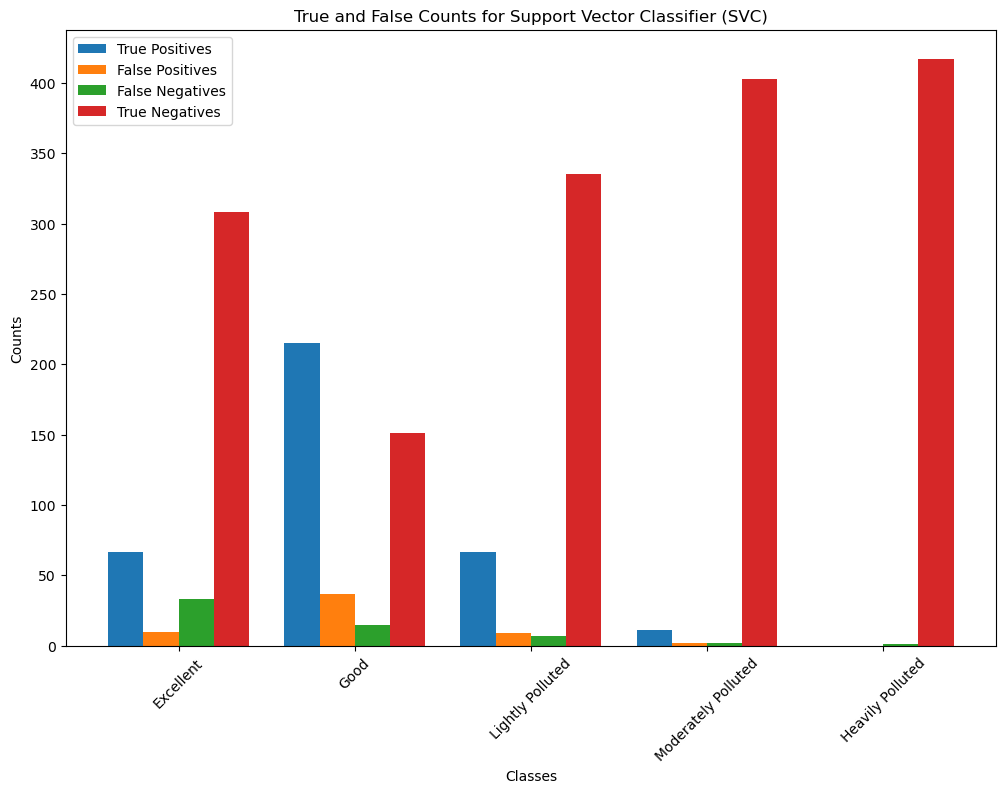

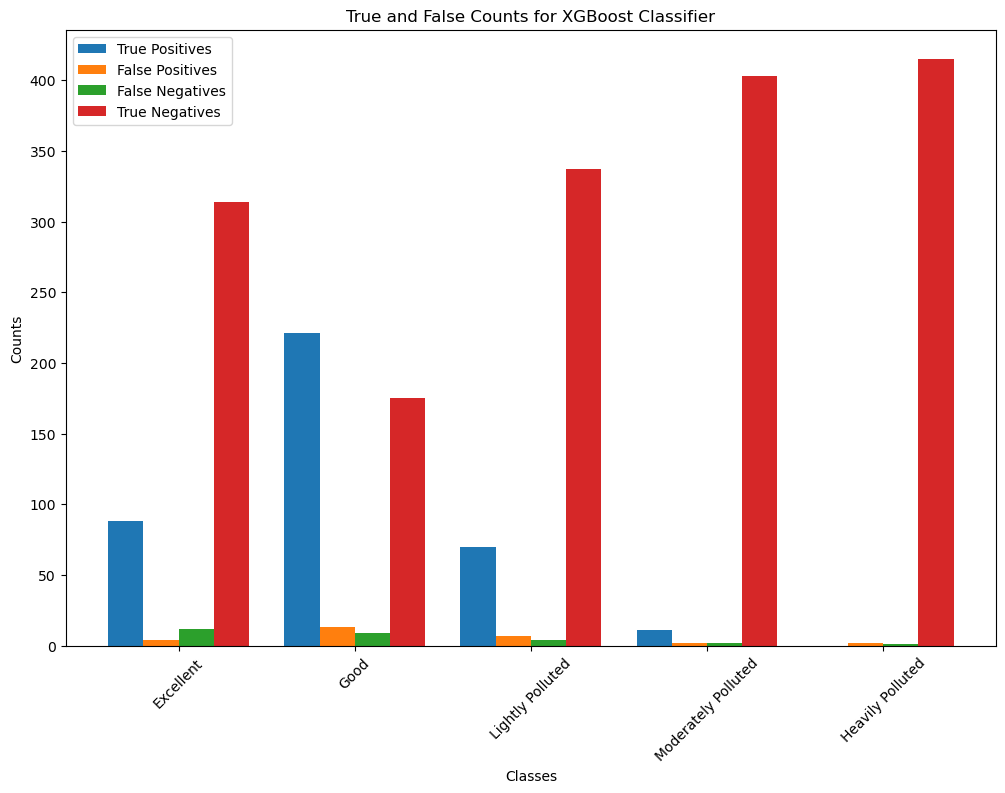

In [457]:
# Define the correct class order and their names
class_order = [0, 1, 3, 4, 2]
class_names = ['Excellent', 'Good', 'Lightly Polluted', 'Moderately Polluted', 'Heavily Polluted']

# Function to plot true and false counts
def plot_true_false_counts(cm, class_names, model_name):
    true_positives = np.diag(cm)
    false_positives = cm.sum(axis=0) - true_positives
    false_negatives = cm.sum(axis=1) - true_positives
    true_negatives = cm.sum() - (false_positives + false_negatives + true_positives)

    categories = ['True Positives', 'False Positives', 'False Negatives', 'True Negatives']
    counts = [true_positives, false_positives, false_negatives, true_negatives]

    fig, ax = plt.subplots(figsize=(12, 8))
    for i, category in enumerate(categories):
        ax.bar(np.arange(len(class_names)) + i * 0.2, counts[i], width=0.2, label=category)
    
    ax.set_xlabel('Classes')
    ax.set_ylabel('Counts')
    ax.set_title(f'True and False Counts for {model_name}')
    ax.set_xticks(np.arange(len(class_names)) + 0.3)
    ax.set_xticklabels(class_names, rotation=45)
    ax.legend()
    plt.show()

# Loop for model evaluation
for name_cc, grid_search_cc in grids_cc.items():
    try:
        # Fit the model
        grid_search_cc.fit(X_train_cc, y_train_cc)
        best_model_cc = grid_search_cc.best_estimator_
        
        # Predictions
        y_pred_cc = best_model_cc.predict(X_test_cc)
        
        # Calculate confusion matrix with sorted order
        cm = confusion_matrix(y_test_cc, y_pred_cc, labels=class_order)
        
        # Plot true and false counts
        plot_true_false_counts(cm, class_names, name_cc)

    except Exception as e:
        print(f"Error occurred with {name_cc}: {str(e)}")
        print()

C:\Users\arman\AppData\Local\Temp\ipykernel_23736\3668602993.py:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('Set1')(np.linspace(0, 1, len(model_names_cc)))


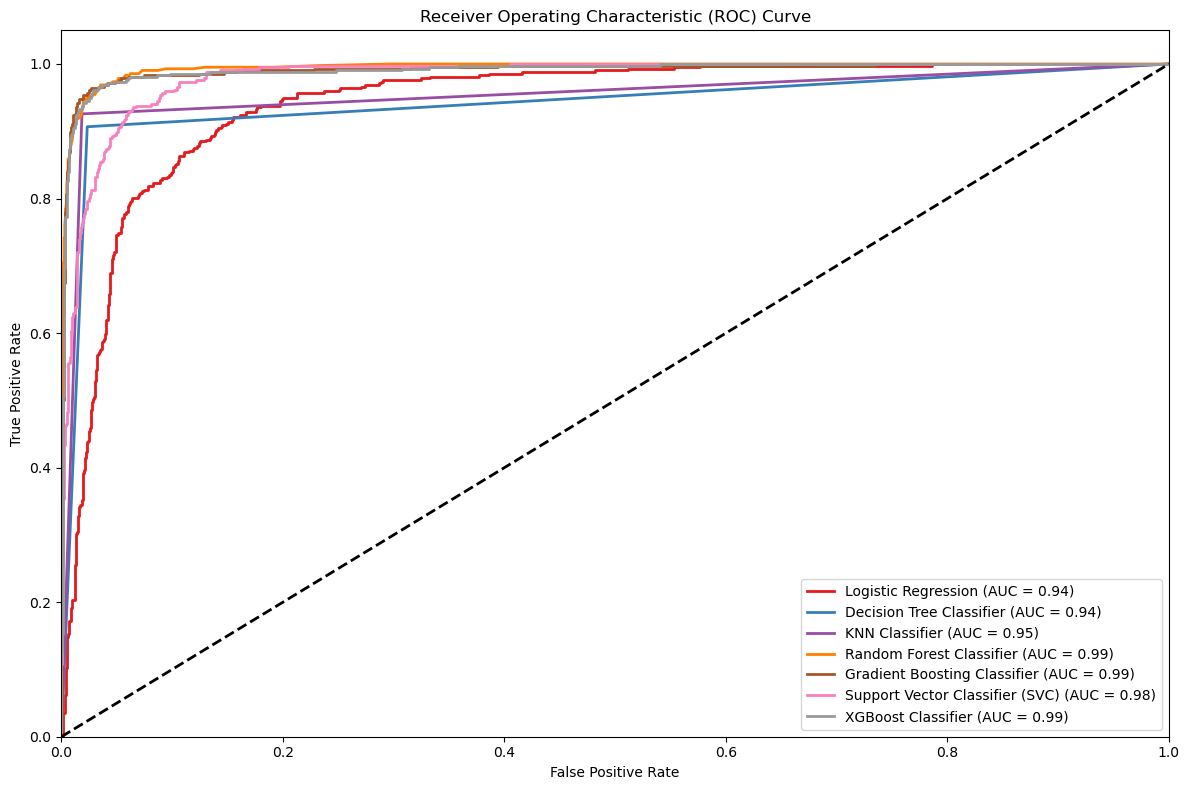

In [450]:
# Prepare the data for plotting
model_names_cc = list(results_cc.keys())
y_test_bin_cc = label_binarize(y_test_cc, classes=np.unique(y_test_cc))
n_classes = y_test_bin_cc.shape[1]

# Generate predictions for each model and store them
y_pred_proba_all_cc = []
for name_cc in model_names_cc:
    best_model_cc = grids_cc[name_cc].best_estimator_
    y_pred_proba_cc = best_model_cc.predict_proba(X_test_cc)
    y_pred_proba_all_cc.append(y_pred_proba_cc)

# Convert list to a NumPy array
y_pred_proba_all_cc = np.array(y_pred_proba_all_cc)

# Define colors
colors = plt.cm.get_cmap('Set1')(np.linspace(0, 1, len(model_names_cc)))

# Create the figure
plt.figure(figsize=(12, 8))

# Loop through the models and plot ROC curve for each one
for i, name in enumerate(model_names_cc):
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for j in range(n_classes):
        fpr[j], tpr[j], _ = roc_curve(y_test_bin_c[:, j], y_pred_proba_all_cc[i][:, j])
        roc_auc[j] = auc(fpr[j], tpr[j])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin_c.ravel(), y_pred_proba_all_cc[i].ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    # Plot ROC curve
    plt.plot(fpr["micro"], tpr["micro"],
             label=f'{name} (AUC = {roc_auc["micro"]:.2f})',
             color=colors[i], linewidth=2)

# Plot diagonal line
plt.plot([0, 1], [0, 1], 'k--', linewidth=2)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()


C:\Users\arman\AppData\Local\Temp\ipykernel_23736\1654541811.py:30: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('Set1')(np.linspace(0, 1, n_classes))


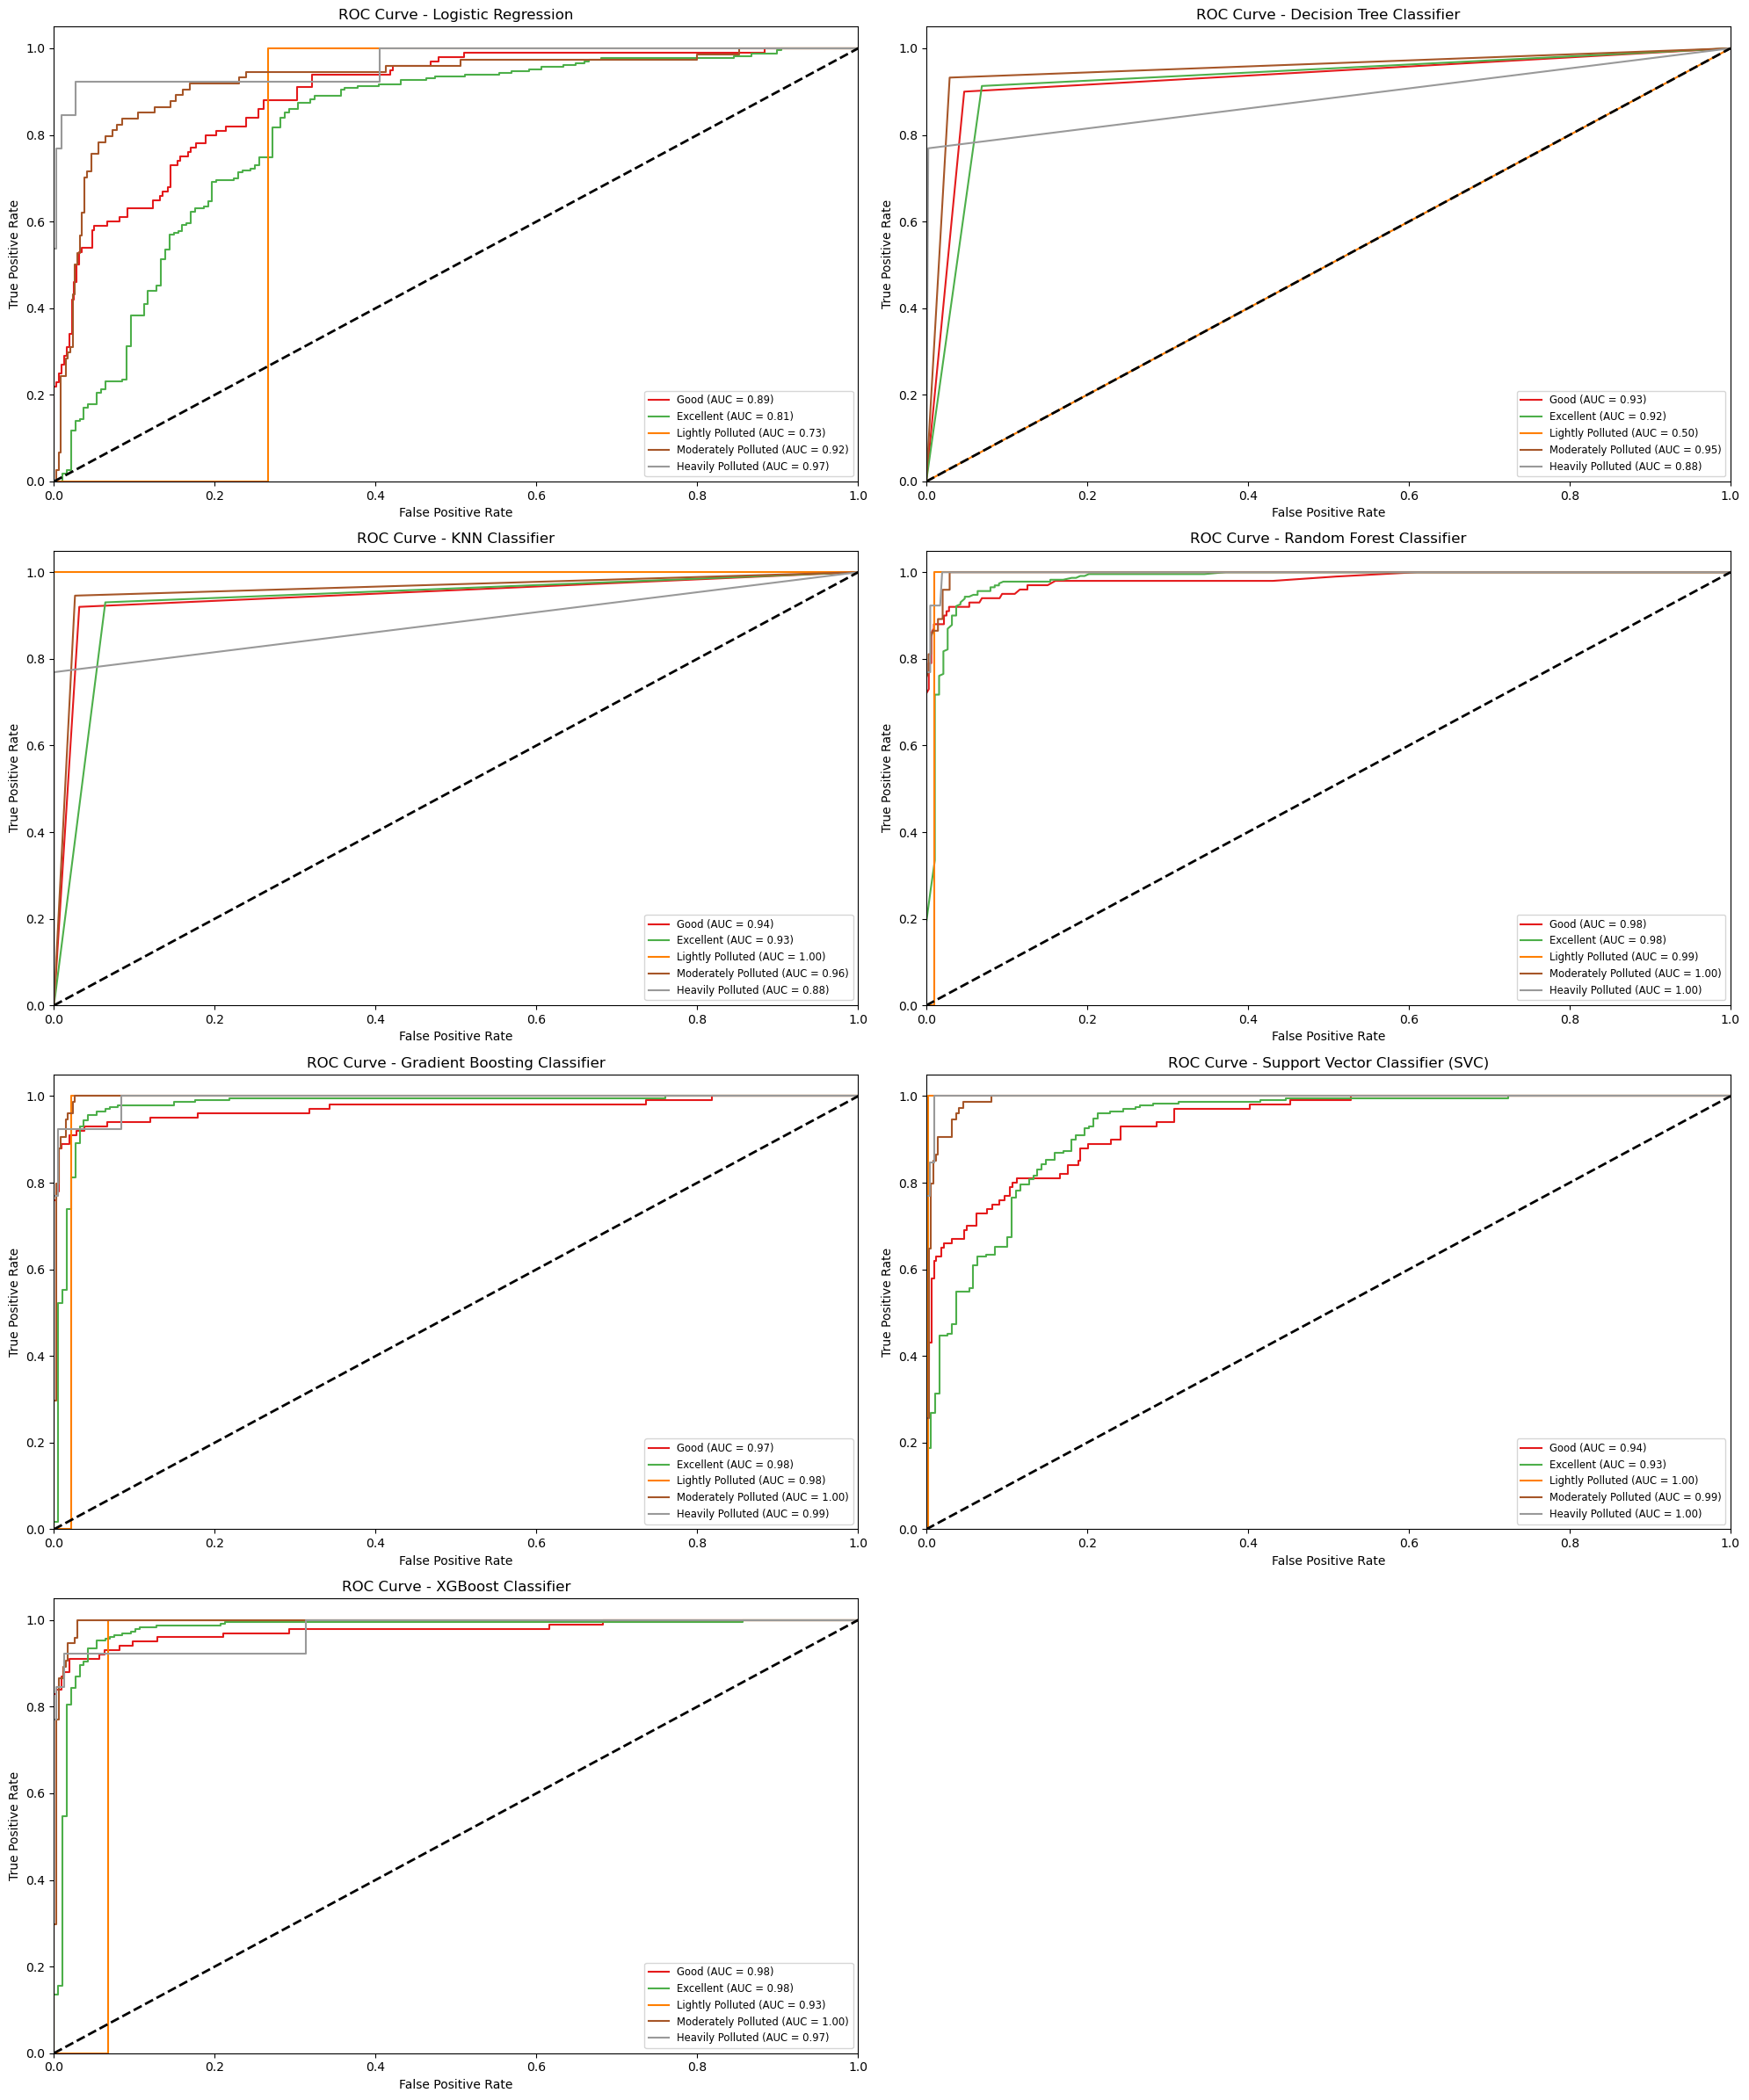

In [451]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

# Define the class names
class_names = {
    0: 'Good',
    1: 'Excellent',
    2: 'Lightly Polluted',
    3: 'Moderately Polluted',
    4: 'Heavily Polluted'
}

# Prepare the data for plotting
model_names_c = list(results_cc.keys())
y_test_bin = label_binarize(y_test_cc, classes=np.unique(y_test_cc))
n_classes = y_test_bin.shape[1]

# Calculate number of rows and columns for subplots
num_models_cc = len(model_names_cc)
ncols = 2
nrows = (num_models_cc + 1) // ncols

# Create the figure with subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 6*nrows))
axes = axes.flatten()

# Color palette
colors = plt.cm.get_cmap('Set1')(np.linspace(0, 1, n_classes))

# Loop through the models and plot ROC curve for each one
for i, name in enumerate(model_names_cc):
    # Get the best model and predict probabilities
    best_model_cc = grids_cc[name].best_estimator_
    y_pred_proba_cc = best_model_cc.predict_proba(X_test_cc)
    
    # Select the current subplot
    ax = axes[i]
    
    # Plot ROC curve for each class
    for j in range(n_classes):
        fpr, tpr, _ = roc_curve(y_test_bin_cc[:, j], y_pred_proba_cc[:, j])
        roc_auc = auc(fpr, tpr)
        
        ax.plot(fpr, tpr, 
                color=colors[j], 
                label=f'{class_names[j]} (AUC = {roc_auc:.2f})')
    
    # Plot diagonal line
    ax.plot([0, 1], [0, 1], 'k--', linewidth=2)
    
    # Set plot details
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title(f'ROC Curve - {name}')
    ax.legend(loc="lower right", fontsize='small')

# Remove any unused subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plots
plt.show()


In [459]:
# Manually define feature names
feature_names_cc = ['CO', 'O3', 'NO2', 'SO2', 'PM10', 'PM2.5']

# Now use these feature names for feature importance extraction
for name_cc, grid_search_cc in grids_cc.items():
    try:
        # Get the best estimator pipeline
        best_model_pipeline_cc = grid_search_cc.best_estimator_
        best_model_cc = best_model_pipeline_cc.named_steps['model']  # Extract the model

        # Check for feature_importances_ (tree-based models)
        if hasattr(best_model_cc, 'feature_importances_'):
            importances = best_model_cc.feature_importances_
            feature_df = pd.DataFrame({
                'Feature': feature_names_cc,
                'Importance': importances
            }).sort_values(by='Importance', ascending=False)

            feature_importance_results_cc[name_cc] = feature_df
            print(f"Feature Importances for {name_cc}:")
            print(feature_df)
            print()

        # Check for coefficients (linear models like Logistic Regression)
        elif hasattr(best_model_cc, 'coef_'):
            coefficients_cc = best_model_cc.coef_[0]  # Assuming binary classification
            feature_df_cc = pd.DataFrame({
                'Feature': feature_names_cc,
                'Coefficient': coefficients_cc
            }).sort_values(by='Coefficient', ascending=False)

            feature_importance_results_cc[name_cc] = feature_df
            print(f"Coefficients for {name_cc}:")
            print(feature_df_cc)
            print()

        else:
            print(f"{name_cc} does not have feature importances or coefficients.\n")

    except Exception as e:
        print(f"Error extracting feature importance for {name_cc}: {str(e)}\n")


Coefficients for Logistic Regression:
  Feature  Coefficient
1      O3     0.317730
4    PM10    -0.300164
3     SO2    -0.438255
2     NO2    -0.640463
0      CO    -1.737873
5   PM2.5    -5.435550

Coefficients for Ridge Classifier:
  Feature  Coefficient
3     SO2    -0.032129
1      O3    -0.045918
0      CO    -0.063398
4    PM10    -0.113794
2     NO2    -0.161568
5   PM2.5    -0.219980

Feature Importances for Decision Tree Classifier:
  Feature  Importance
5   PM2.5    0.567959
0      CO    0.123230
2     NO2    0.112429
4    PM10    0.083546
1      O3    0.059505
3     SO2    0.053331

KNN Classifier does not have feature importances or coefficients.

Feature Importances for Random Forest Classifier:
  Feature  Importance
5   PM2.5    0.429618
4    PM10    0.167118
2     NO2    0.115352
1      O3    0.113420
0      CO    0.106824
3     SO2    0.067667

Feature Importances for Gradient Boosting Classifier:
  Feature  Importance
5   PM2.5    0.596267
2     NO2    0.112122
0     

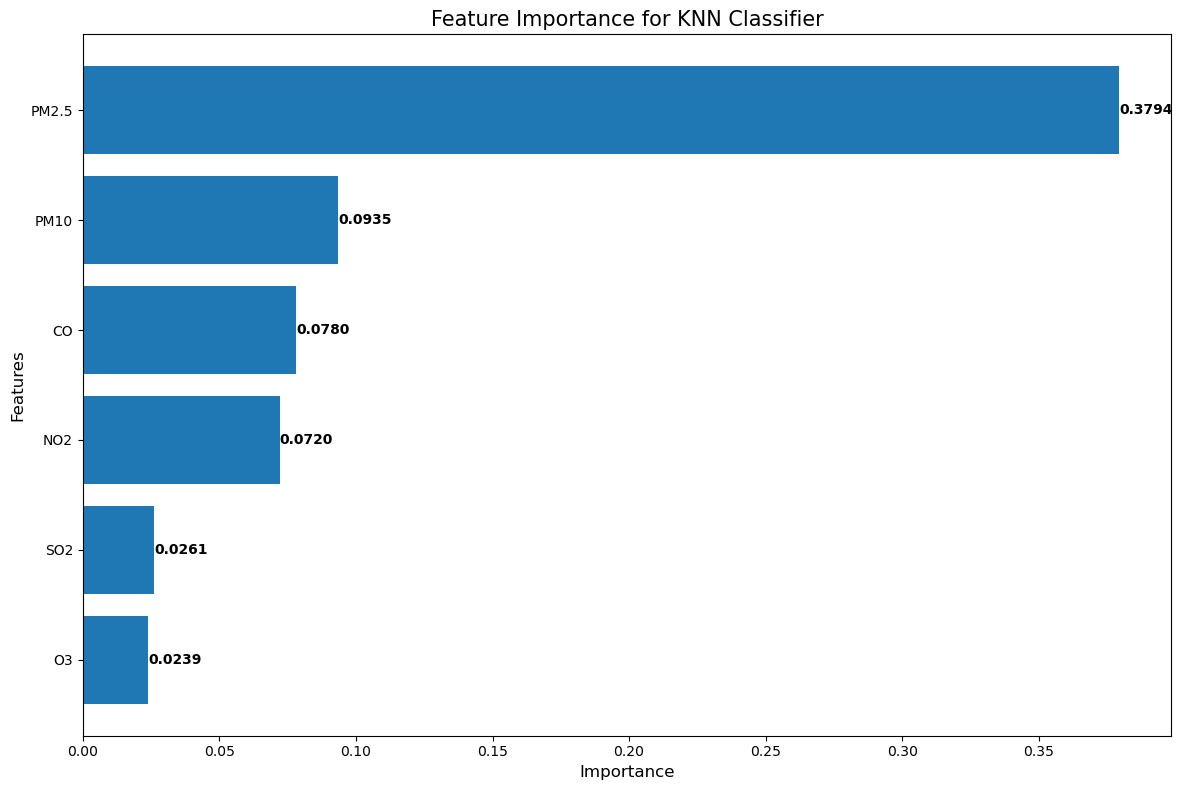

In [461]:
# Calculate permutation importance
result = permutation_importance(best_model_cc, X_test_cc, y_test_cc, n_repeats=10, random_state=42, n_jobs=-1)

# Create a DataFrame of feature importances
feature_importance = pd.DataFrame({
    'Feature': ['CO', 'O3', 'NO2', 'SO2', 'PM10', 'PM2.5'],
    'Importance': result.importances_mean
})

# Sort features by importance in descending order
feature_importance = feature_importance.sort_values('Importance', ascending=True)

# Plot feature importances vertically with numbers
plt.figure(figsize=(12, 8))
bars = plt.barh(feature_importance['Feature'], feature_importance['Importance'])
plt.title('Feature Importance for KNN Classifier', fontsize=15)
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Features', fontsize=12)

# Add value labels on the bars
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/2, 
             f'{width:.4f}', 
             ha='left', 
             va='center', 
             fontweight='bold')

plt.tight_layout()
plt.show()

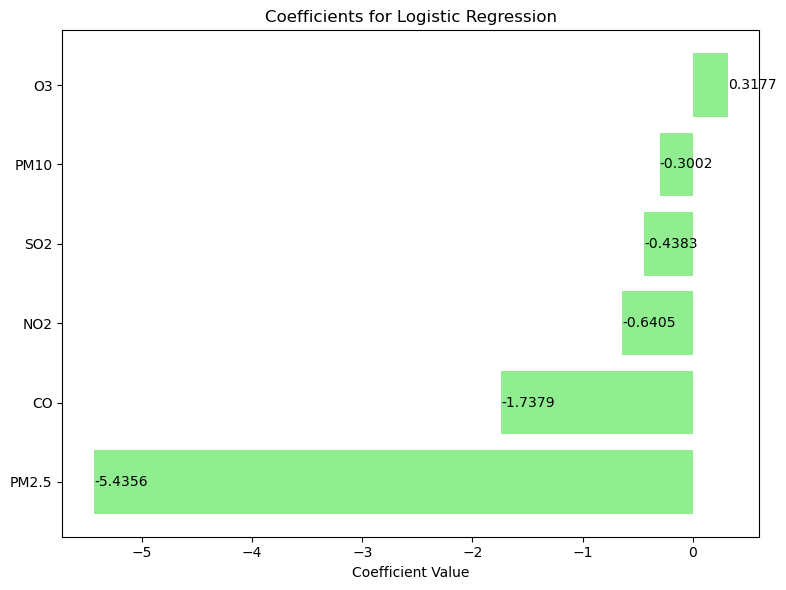

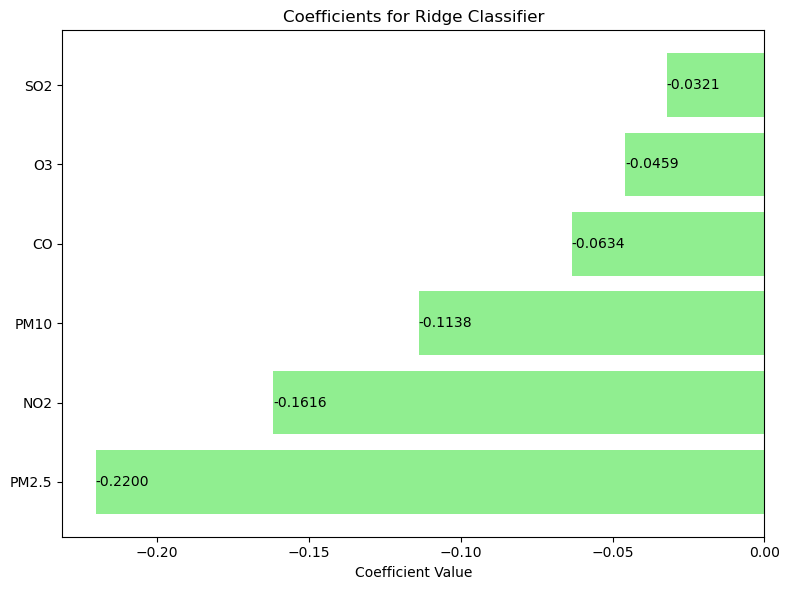

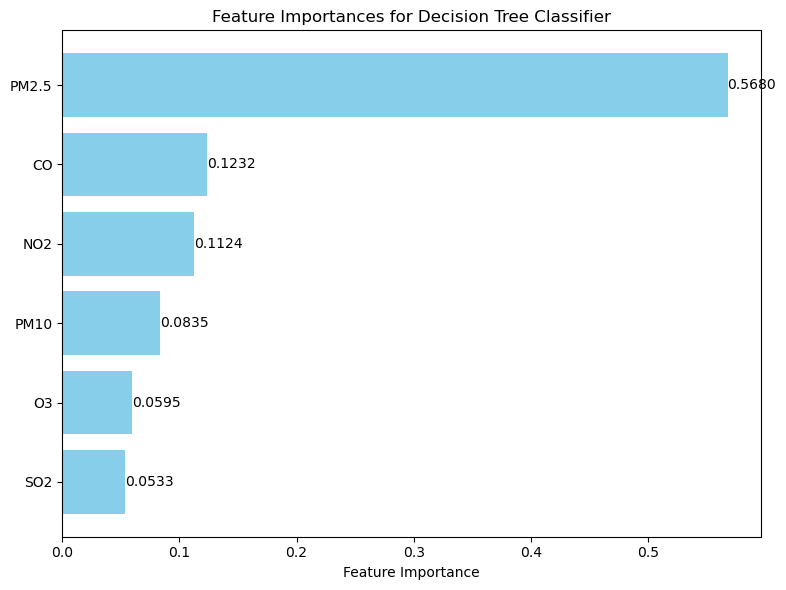

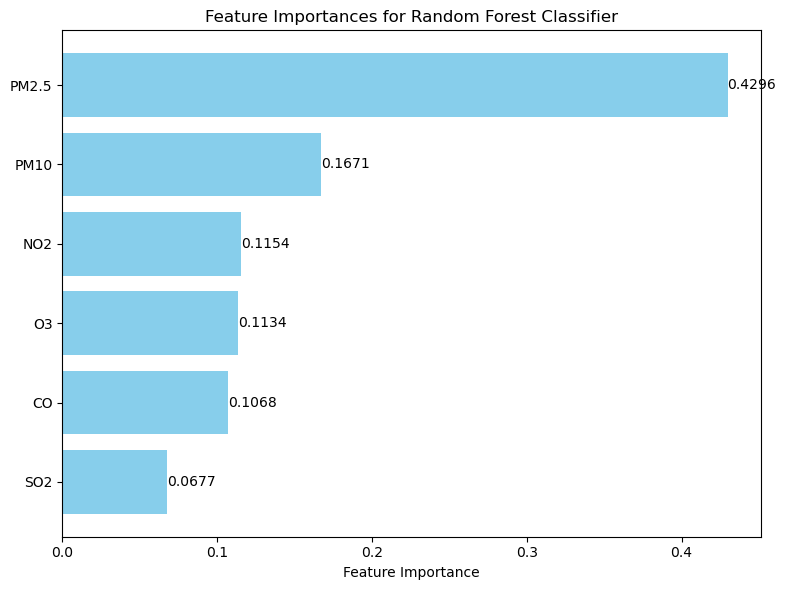

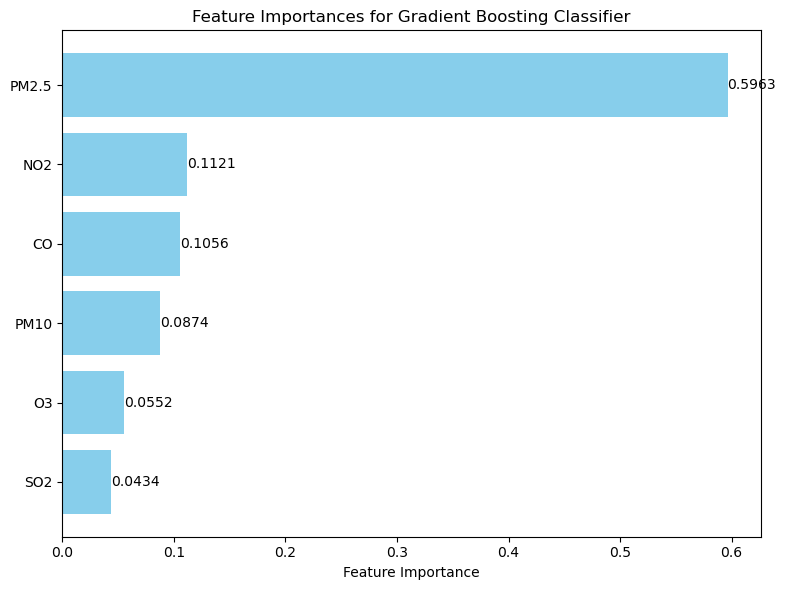

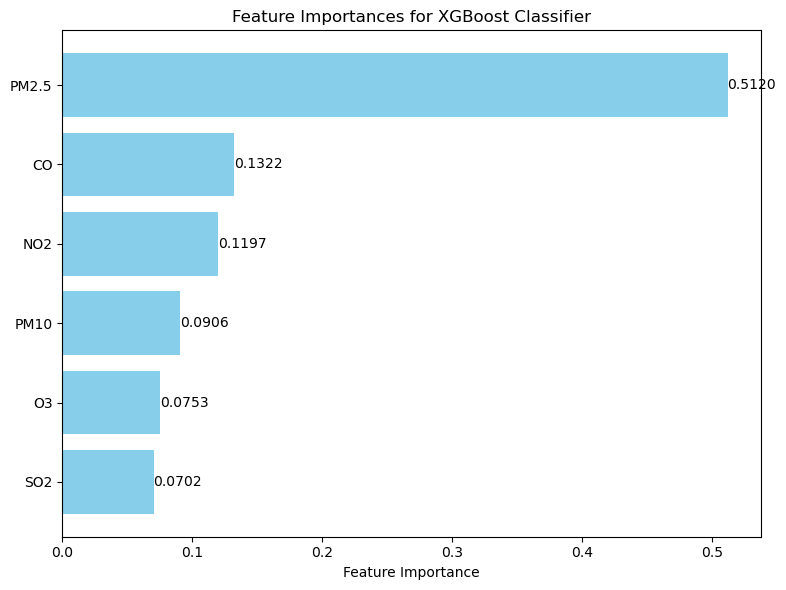

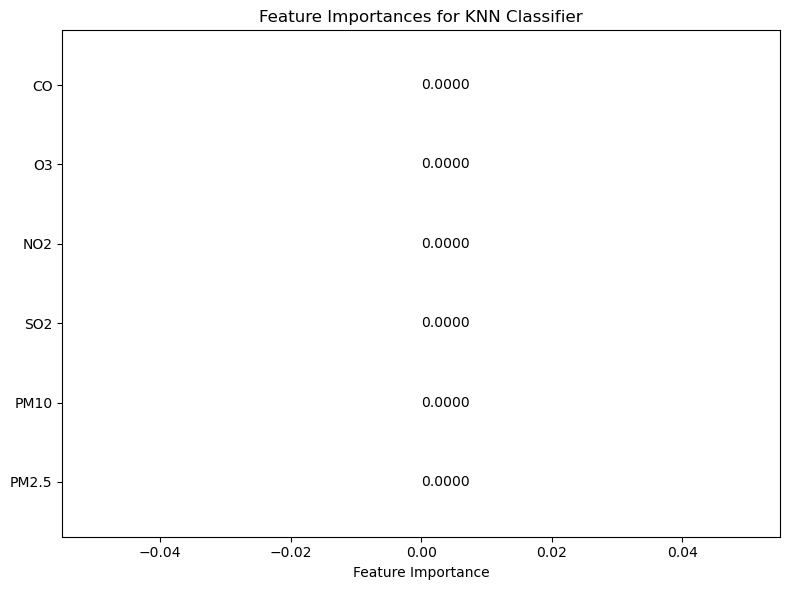

In [462]:
# Function to plot feature importance or coefficients with values
def plot_feature_importances(feature_importance_results_cc):
    for model_name, feature_df in feature_importance_results_cc.items():
        try:
            plt.figure(figsize=(8, 6))  # Set the figure size
            
            # Check if the DataFrame has 'Importance' column (tree-based models)
            if 'Importance' in feature_df.columns:
                plt.barh(feature_df['Feature'], feature_df['Importance'], color='skyblue')
                plt.xlabel('Feature Importance')
                plt.title(f'Feature Importances for {model_name}')
                
                # Add numerical values to the bars
                for index, value in enumerate(feature_df['Importance']):
                    plt.text(value, index, f"{value:.4f}", va='center', fontsize=10)

            # Check if the DataFrame has 'Coefficient' column (linear models)
            elif 'Coefficient' in feature_df.columns:
                plt.barh(feature_df['Feature'], feature_df['Coefficient'], color='lightgreen')
                plt.xlabel('Coefficient Value')
                plt.title(f'Coefficients for {model_name}')
                
                # Add numerical values to the bars
                for index, value in enumerate(feature_df['Coefficient']):
                    plt.text(value, index, f"{value:.4f}", va='center', fontsize=10)

            # Adjust layout and show the plot
            plt.gca().invert_yaxis()  # Invert y-axis for better visualization
            plt.tight_layout()
            plt.show()
        
        except Exception as e:
            print(f"Error plotting feature importance for {model_name}: {str(e)}")

# Call the function to plot results
plot_feature_importances(feature_importance_results_cc)



    PM2.5:
         PM2.5 is by far the most critical feature in the model. Its high importance suggests it significantly influences the target variable.

    NO2 (Nitrogen Dioxide):
       NO2 contributes moderately to the model and is the second most influential feature. It reflects pollution levels from vehicles and industrial emissions.

    CO (Carbon Monoxide):
        Importance: 0.1056 (~10.5%)
        CO plays a notable role. This pollutant often arises from incomplete combustion.

    PM10:
        PM10, though important, has less impact than PM2.5 due to its larger particle size and reduced health effect relative to PM2.5.

    O3 (Ozone):
        zone contributes less but still affects air quality, especially in urban and industrial areas during sunny conditions.

    SO2 (Sulfur Dioxide):
        SO2 has the least importance, suggesting it plays a minor role in predicting the air quality classification.

Insights:

    PM2.5 Dominance: The model heavily relies on PM2.5, which aligns with its well-known impact on air quality and health.
    Supporting Features: NO2, CO, and PM10 play secondary roles but still contribute meaningfully to predictions.
    SO2 and O3: These features are less significant but still included, ensuring that even small contributions are captured.

In [561]:
import pickle

# Extract the best model name
best_model_name = best_model_info['Model']

# Retrieve the corresponding model object from grids_cc
best_model = grids_cc[best_model_name].best_estimator_

# Save the best model to a pickle file
file_name = f"{best_model_name.replace(' ', '_').lower()}_best_model.pkl"
with open(file_name, 'wb') as f:
    pickle.dump(best_model, f)

# Confirmation message
print(f"The best model '{best_model_name}' has been saved successfully as '{file_name}'.")

The best model 'Gradient Boosting Classifier' has been saved successfully as 'gradient_boosting_classifier_best_model.pkl'.


# Deep Learning

## MPLs (Multilayer Perceptron)-clasification

In [436]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Load and preprocess the data
X_mpl = df[['CO', 'O3', 'NO2', 'SO2', 'PM10', 'PM2.5']].values
y_mpl = df['AQI Description'].values

# Encode the target variable
le = LabelEncoder()
y_mpl = le.fit_transform(y_mpl)
y_mpl = to_categorical(y_mpl)

# Split the data
X_train_mpl, X_test_mpl, y_train_mpl, y_test_mpl = train_test_split(X_mpl, y_mpl, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_mpl = scaler.fit_transform(X_train_mpl)
X_test_mpl = scaler.transform(X_test_mpl)

In [438]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import RandomizedSearchCV
from tensorflow.keras.callbacks import ModelCheckpoint

# Define a function to create the Keras model
def create_model(learning_rate=0.001, neurons_layer1=64, neurons_layer2=32, dropout_rate=0.3):
    model = Sequential([
        Dense(neurons_layer1, activation='relu', input_shape=(X_train_mpl.shape[1],)),
        Dropout(dropout_rate),
        Dense(neurons_layer2, activation='relu'),
        Dropout(dropout_rate),
        Dense(16, activation='relu'),
        Dense(y_train_mpl.shape[1], activation='softmax')
    ])
    model.compile(optimizer=Adam(learning_rate=learning_rate),
                  loss='categorical_crossentropy',
                  metrics=['accuracy']) 
    return model

In [439]:
from sklearn.base import BaseEstimator, ClassifierMixin

class KerasClassifierWrapper(BaseEstimator, ClassifierMixin):
    def __init__(self, build_fn=create_model, learning_rate=0.001, neurons_layer1=64, neurons_layer2=32, dropout_rate=0.3, batch_size=32, epochs=50, callbacks=None):
        self.build_fn = build_fn
        self.learning_rate = learning_rate
        self.neurons_layer1 = neurons_layer1
        self.neurons_layer2 = neurons_layer2
        self.dropout_rate = dropout_rate
        self.batch_size = batch_size
        self.epochs = epochs
        self.callbacks = callbacks
        self.model = None
        self.classes_ = None

    def fit(self, X, y):
        self.model = self.build_fn(learning_rate=self.learning_rate, neurons_layer1=self.neurons_layer1, neurons_layer2=self.neurons_layer2, dropout_rate=self.dropout_rate)
        self.model.fit(X, y, batch_size=self.batch_size, epochs=self.epochs, verbose=0, callbacks=self.callbacks)
        self.classes_ = np.unique(np.argmax(y, axis=1))  # Set the classes_ attribute
        return self

    def predict(self, X):
        predictions = self.model.predict(X)
        return np.argmax(predictions, axis=1)

    def predict_proba(self, X):
        return self.model.predict(X)

    def get_params(self, deep=True):
        return {"build_fn": self.build_fn, "learning_rate": self.learning_rate, "neurons_layer1": self.neurons_layer1, "neurons_layer2": self.neurons_layer2, "dropout_rate": self.dropout_rate, "batch_size": self.batch_size, "epochs": self.epochs, "callbacks": self.callbacks}

    def set_params(self, **params):
        for key, value in params.items():
            setattr(self, key, value)
        return self

In [440]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

# Wrap the model using the custom KerasClassifierWrapper
model = KerasClassifierWrapper(build_fn=create_model, callbacks=[checkpoint_cb])

# Define the grid of parameters to search
param_dist = {
    'learning_rate': [0.001, 0.01],
    'neurons_layer1': [32, 64, 128],
    'neurons_layer2': [16, 32, 64],
    'dropout_rate': [0.2, 0.3, 0.4],
    'batch_size': [16, 32, 64],
    'epochs': [450, 550, 650]
}

# Define RandomizedSearchCV with n_jobs=1
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=20, scoring='accuracy', cv=3, verbose=2, n_jobs=1)

# Fit RandomizedSearchCV
random_search_result = random_search.fit(X_train_mpl, y_train_mpl)

# Print the best results
print("Best Score (accuracy): {:.4f}".format(random_search_result.best_score_))
print("Best Parameters:", random_search_result.best_params_)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
[CV] END batch_size=16, dropout_rate=0.4, epochs=550, learning_rate=0.01, neurons_layer1=32, neurons_layer2=16; total time= 1.8min
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
[CV] END batch_size=16, dropout_rate=0.4, epochs=550, learning_rate=0.01, neurons_layer1=32, neurons_layer2=16; total time= 2.7min
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
[CV] END batch_size=16, dropout_rate=0.4, epochs=550, learning_rate=0.01, neurons_layer1=32, neurons_layer2=16; total time= 3.2min
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
[CV] END batch_size=64, dropout_rate=0.4, epochs=550, learning_rate=0.01, neurons_layer1=128, neurons_layer2=64; total time= 1.5min
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
[CV] END batch_size=64, dropout_rate=0.4, epochs=550, learning_rate=0.01, neurons_layer1=128, neurons_layer2=64; total time= 1.5min
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
[CV] END batch_size=64, dropout_rate=0.4, e

In [441]:
# Print the best estimator
best_estimator = random_search_result.best_estimator_
print(best_estimator)

KerasClassifierWrapper(batch_size=16,
                       callbacks=[<keras.src.callbacks.model_checkpoint.ModelCheckpoint object at 0x0000023C884C62F0>],
                       dropout_rate=0.4, epochs=550, learning_rate=0.01,
                       neurons_layer1=32, neurons_layer2=16)


In [580]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report
from tensorflow.keras.models import load_model, Sequential
from tensorflow.keras.layers import Dense, Dropout
import tensorflow as tf
import numpy as np

# Define the model creation function
def create_model(learning_rate=0.01, neurons_layer1=32, neurons_layer2=16, dropout_rate=0.4):
    model = Sequential([
        Dense(neurons_layer1, activation='relu', input_shape=(X_train_mpl.shape[1],)),
        Dropout(dropout_rate),
        Dense(neurons_layer2, activation='relu'),
        Dropout(dropout_rate),
        Dense(16, activation='relu'),
        Dense(y_train_mpl.shape[1], activation='softmax')
    ])
    model.compile(optimizer=Adam(learning_rate=learning_rate),
                  loss='categorical_crossentropy',
                  metrics=['accuracy', tf.keras.metrics.AUC()])
    return model

# Create and compile the best model with specified parameters
best_model = create_model(learning_rate=0.01, 
                          neurons_layer1=32, 
                          neurons_layer2=16, 
                          dropout_rate=0.4)

# Define a checkpoint callback to save the best model based on validation loss
checkpoint_cb = ModelCheckpoint(filepath='best_mlp_model.keras',
                                monitor='val_loss',
                                save_best_only=True,
                                mode='min',
                                verbose=1)

# Train the model with the specified parameters
history_mpl = best_model.fit(X_train_mpl, y_train_mpl, 
                             epochs=550, 
                             batch_size=16, 
                             validation_split=0.2,
                             callbacks=[checkpoint_cb],
                             verbose=1)

# Evaluate the best model and handle multiple metrics
evaluation_results = best_model.evaluate(X_test_mpl, y_test_mpl, verbose=0)
test_loss_mpl, test_accuracy, test_auc = evaluation_results

# Print the metrics
print(f'Test Loss: {test_loss_mpl:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')
print(f'Test AUC: {test_auc:.4f}')

# Load the best model
best_model_mpl = load_model('best_mlp_model.keras', custom_objects={'AUC': tf.keras.metrics.AUC})

# Make predictions with the best model
predictions_mpl = best_model_mpl.predict(X_test_mpl)
predicted_classes_mpl = np.argmax(predictions_mpl, axis=1)
true_classes_mpl = np.argmax(y_test_mpl, axis=1)

# Print classification report
print(classification_report(true_classes_mpl, predicted_classes_mpl, target_names=le.classes_, zero_division=0))

Epoch 1/550
59/84 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5071 - auc_1: 0.7913 - loss: 1.2720
Epoch 1: val_loss improved from inf to 0.72813, saving model to best_mlp_model.keras
84/84 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.5389 - auc_1: 0.8164 - loss: 1.2060 - val_accuracy: 0.7552 - val_auc_1: 0.9412 - val_loss: 0.7281
Epoch 2/550
78/84 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6926 - auc_1: 0.9216 - loss: 0.7738
Epoch 2: val_loss improved from 0.72813 to 0.64390, saving model to best_mlp_model.keras
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6927 - auc_1: 0.9217 - loss: 0.7724 - val_accuracy: 0.7642 - val_auc_1: 0.9481 - val_loss: 0.6439
Epoch 3/550
78/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7232 - auc_1: 0.9325 - loss: 0.7106
Epoch 3: val_loss improved from 0.64390 to 0.59193, saving model to best_mlp_model.keras
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7233 - auc_1: 0.9329 - loss: 0.7096 - val_accuracy: 0.7701 - val_auc_1: 0.9519 

High Accuracy: The model achieved an accuracy of 84.45% and an excellent AUC score of 0.9735, indicating strong classification performance overall.
    Class Imbalance:
        The Heavily Polluted class has very poor performance (precision=0.00, recall=0.00) due to extremely low support (only 1 sample).
        The Good and Lightly Polluted classes performed the best with high precision and recall.
    Moderately Polluted class: Despite having only 13 samples, the model captured it well with recall=0.92.

This performance highlights the effectiveness of the Multi-Layer Perceptron (MPL) model with the specified hyperparameters.

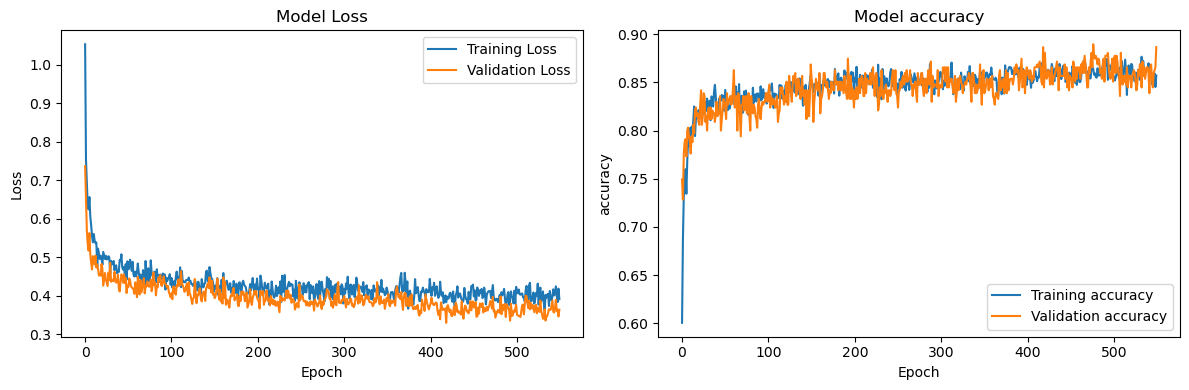

In [471]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_mpl.history['loss'], label='Training Loss')
plt.plot(history_mpl.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_mpl.history['accuracy'], label='Training accuracy')
plt.plot(history_mpl.history['val_accuracy'], label='Validation accuracy')
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.legend()
plt.tight_layout()
plt.show()

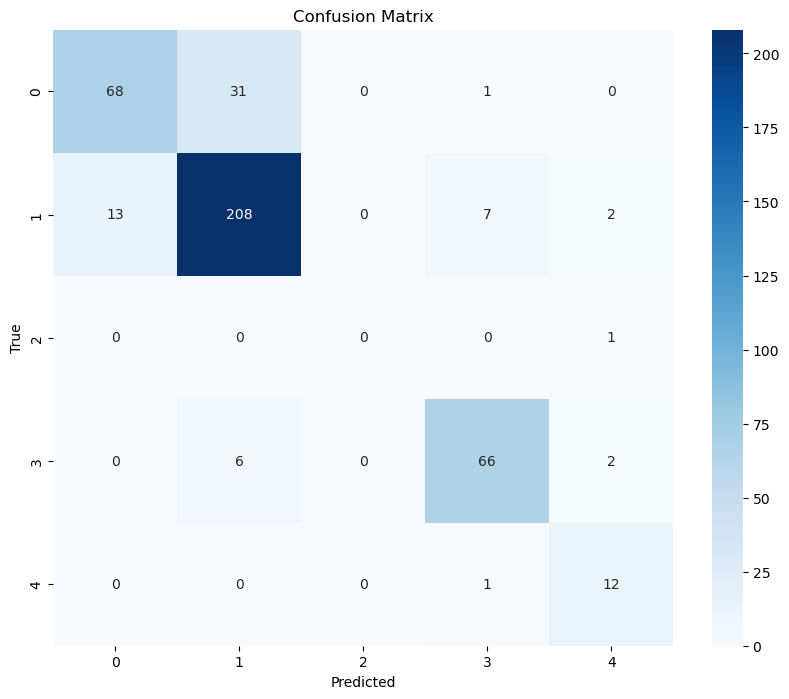

In [472]:
cm_mpl = confusion_matrix(true_classes_mpl, predicted_classes_mpl)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_mpl, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

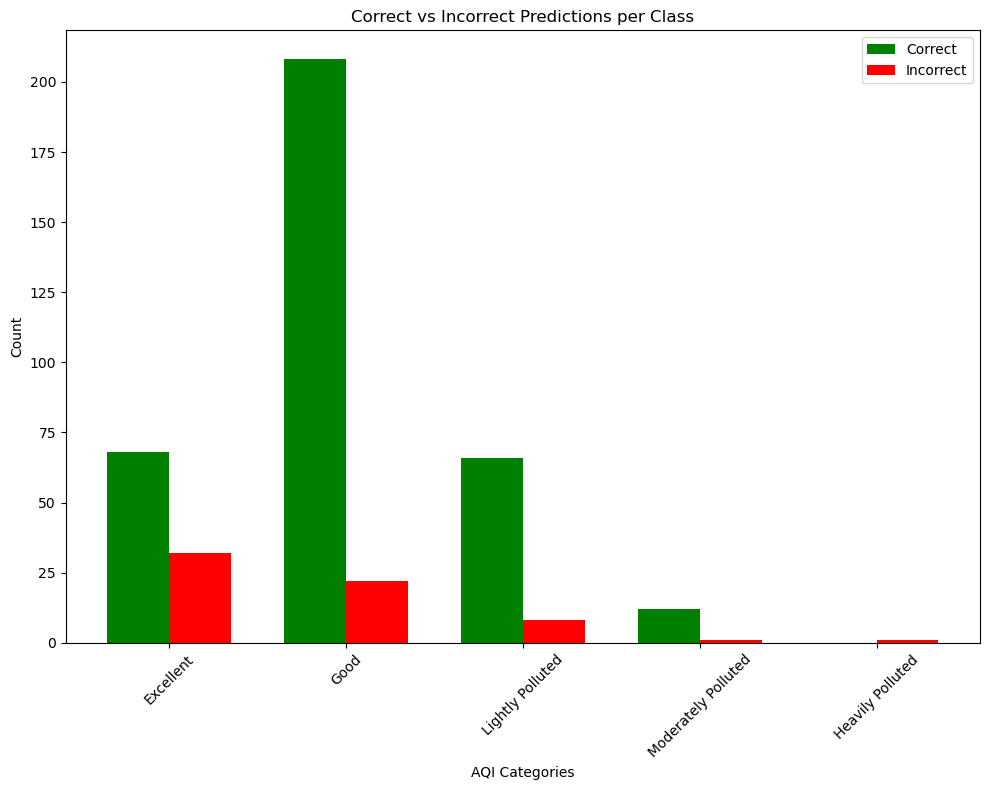

In [473]:
# Correct class names and their order
aqi_categories_mpl = ['Excellent', 'Good', 'Lightly Polluted', 'Moderately Polluted', 'Heavily Polluted']
correct_class_order = [0, 1, 4, 2, 3]  # Order of classes in the one-hot encoded data

# Assuming true_classes_mpl and predicted_classes_mpl are already defined and need mapping
mapped_true_classes = [correct_class_order[i] for i in true_classes_mpl]
mapped_predicted_classes = [correct_class_order[i] for i in predicted_classes_mpl]

# Generate the confusion matrix
cm_mpl = confusion_matrix(mapped_true_classes, mapped_predicted_classes)

# Calculate true positives (diagonal elements) and false predictions
correct_predictions_mpl = np.diagonal(cm_mpl)
incorrect_predictions_mpl = cm_mpl.sum(axis=1) - correct_predictions_mpl  # Row-wise total minus correct predictions

# Plotting the bar chart
fig, ax = plt.subplots(figsize=(10, 8))

# X-axis labels (AQI categories)
labels = aqi_categories_mpl  # Use meaningful class names

# Bar positions and values
x = np.arange(len(labels))  # Positions for bars
width = 0.35  # Width of the bars

# Create bars for correct and incorrect predictions
bars1 = ax.bar(x - width/2, correct_predictions_mpl, width, label='Correct', color='g')
bars2 = ax.bar(x + width/2, incorrect_predictions_mpl, width, label='Incorrect', color='r')

# Adding labels and title
ax.set_xlabel('AQI Categories')
ax.set_ylabel('Count')
ax.set_title('Correct vs Incorrect Predictions per Class')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45)  # Rotate labels for better readability
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()


In [474]:
from collections import Counter

# Define the correct class order if needed
correct_class_order = [0, 1, 4, 2, 3]  # Ensure the actual order of classes here.

# Convert one-hot encoded y_test to class labels
y_test_mpl_labels = [correct_class_order[i] for i in np.argmax(y_test_mpl, axis=1)]

# Count the occurrences of each class
class_counts = Counter(y_test_mpl_labels)

# Print the corrected counts
for class_label, count in sorted(class_counts.items()):
    print(f"Class {class_label}: {count} occurrences")

Class 0: 100 occurrences
Class 1: 230 occurrences
Class 2: 74 occurrences
Class 3: 13 occurrences
Class 4: 1 occurrences


C:\Users\arman\AppData\Local\Temp\ipykernel_23736\587123880.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('Set1')(np.linspace(0, 1, n_classes))


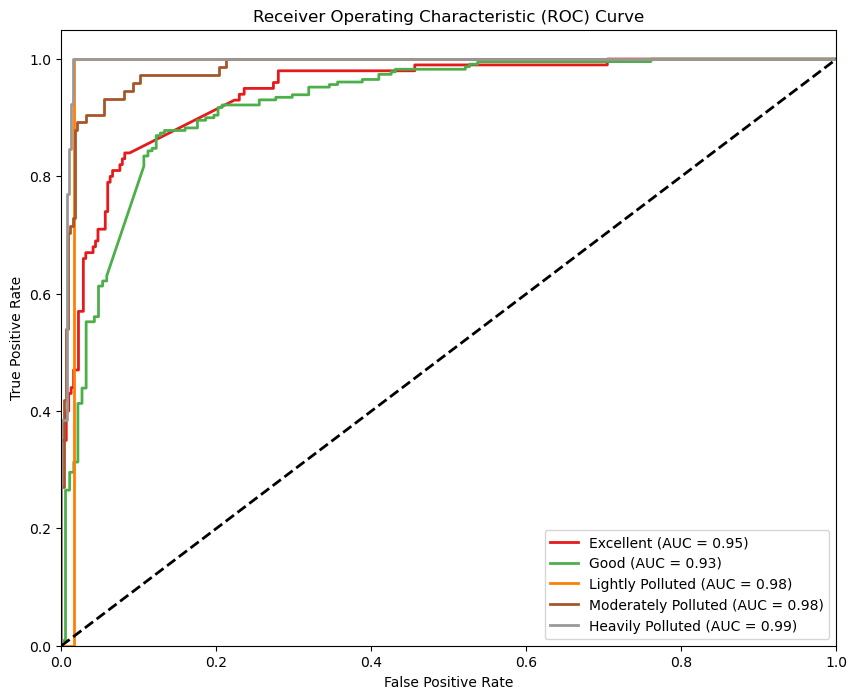

In [475]:
# Define the class names
class_names_mpl = ['Excellent', 'Good', 'Lightly Polluted', 'Moderately Polluted', 'Heavily Polluted']

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes_mpl = len(class_names_mpl)

for i in range(n_classes_mpl):
    fpr[i], tpr[i], _ = roc_curve(y_test_mpl[:, i], predictions_mpl[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize=(10, 8))
colors = plt.cm.get_cmap('Set1')(np.linspace(0, 1, n_classes))

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'{class_names_mpl[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step


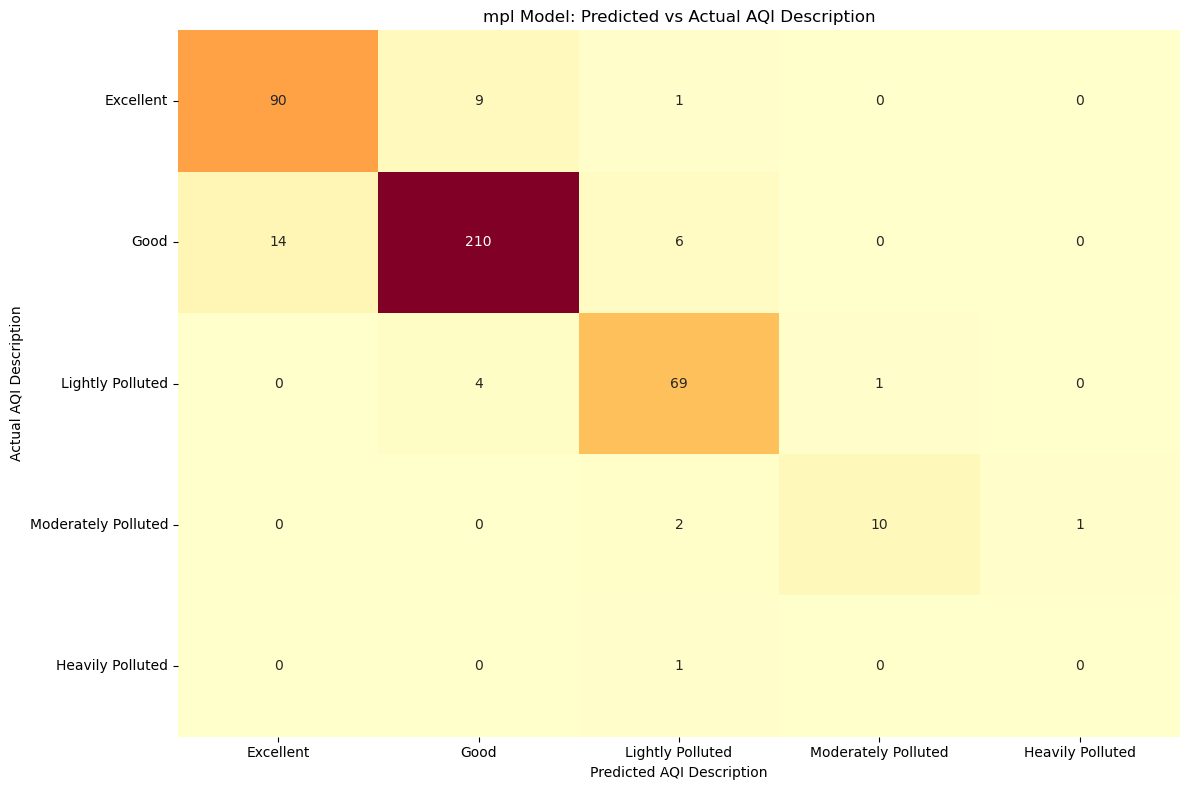


Confusion Matrix:
                     Excellent  Good  Lightly Polluted  Moderately Polluted  \
Excellent                   90     9                 1                    0   
Good                        14   210                 6                    0   
Lightly Polluted             0     4                69                    1   
Moderately Polluted          0     0                 2                   10   
Heavily Polluted             0     0                 1                    0   

                     Heavily Polluted  
Excellent                           0  
Good                                0  
Lightly Polluted                    0  
Moderately Polluted                 1  
Heavily Polluted                    0  


In [476]:
# Get predictions
y_pred_mpl = model_mpl.predict(X_test_mpl)

# Define the correct order of class labels
correct_class_order = [0, 1, 4, 2, 3]  # Adjust this order if it differs

# Map the indices to the correct class labels
y_pred_classes_mpl = [correct_class_order[i] for i in np.argmax(y_pred_mpl, axis=1)]
y_true_classes_mpl = [correct_class_order[i] for i in np.argmax(y_test_mpl, axis=1)]

# Create confusion matrix
cm_mpl = confusion_matrix(y_true_classes_mpl, y_pred_classes_mpl)

# Define the AQI categories in correct order
aqi_categories_mpl = ['Excellent', 'Good', 'Lightly Polluted', 'Moderately Polluted', 'Heavily Polluted']

# Create a DataFrame for the confusion matrix
cm_df_mpl = pd.DataFrame(cm_mpl, index=aqi_categories_mpl, columns=aqi_categories_mpl)

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(cm_df_mpl, annot=True, cmap='YlOrRd', fmt='d', cbar=False)

plt.title('mpl Model: Predicted vs Actual AQI Description')
plt.xlabel('Predicted AQI Description')
plt.ylabel('Actual AQI Description')

plt.tight_layout()
plt.show()

# Print the confusion matrix
print("\nConfusion Matrix:")
print(cm_df_mpl)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


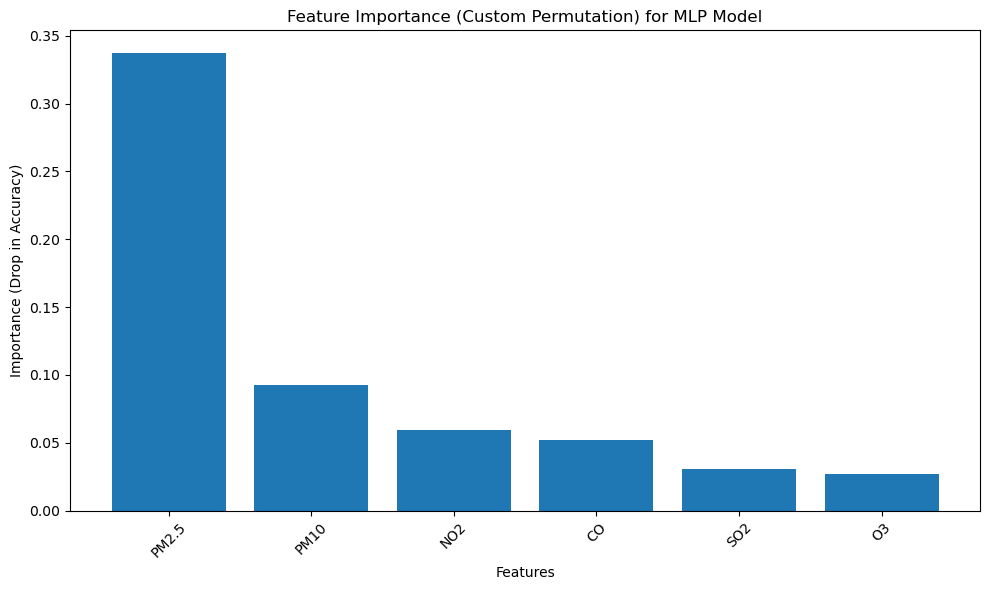

In [484]:
from sklearn.metrics import accuracy_score

# Function to calculate permutation importance
def permutation_importance_custom(model, X, y, n_repeats=10):
    baseline_acc = accuracy_score(np.argmax(y, axis=1), np.argmax(model.predict(X), axis=1))  # Original accuracy
    importances = np.zeros(X.shape[1])
    
    for i in range(X.shape[1]):  # Iterate over features
        shuffled_acc = []
        for _ in range(n_repeats):
            X_permuted = X.copy()
            np.random.shuffle(X_permuted[:, i])  # Shuffle the feature
            acc = accuracy_score(np.argmax(y, axis=1), np.argmax(model.predict(X_permuted), axis=1))
            shuffled_acc.append(acc)
        importances[i] = baseline_acc - np.mean(shuffled_acc)  # Drop in accuracy
    
    return importances

# Run permutation importance
importances = permutation_importance_custom(best_model_mpl, X_test_mpl, y_test_mpl, n_repeats=10)

# Feature names
feature_names = ['CO', 'O3', 'NO2', 'SO2', 'PM10', 'PM2.5']

# Sort and plot the importance values
sorted_indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_names)), importances[sorted_indices], align='center')
plt.xticks(range(len(feature_names)), np.array(feature_names)[sorted_indices], rotation=45)
plt.xlabel('Features')
plt.ylabel('Importance (Drop in Accuracy)')
plt.title('Feature Importance (Custom Permutation) for MLP Model')
plt.tight_layout()
plt.show()


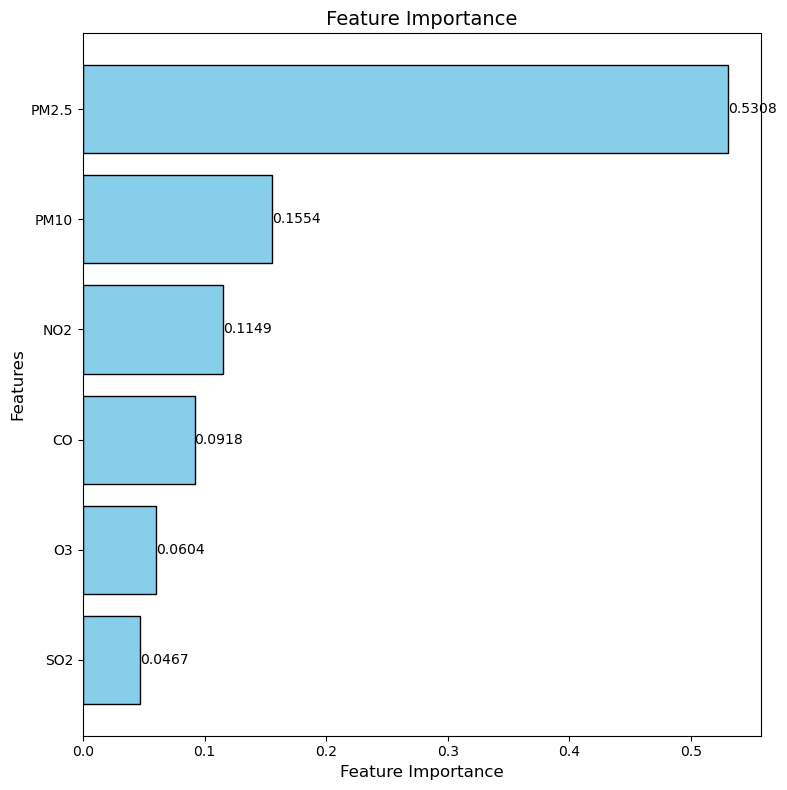

In [589]:
# Normalize the feature importances to ensure they sum to 1
normalized_importances = importances / np.sum(importances)

# Create a DataFrame for displaying normalized feature importances
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Normalized Importance': normalized_importances
}).sort_values(by='Normalized Importance', ascending=False)

# Plot normalized feature importances
plt.figure(figsize=(8, 8))
bars = plt.barh(range(len(feature_importance_df)), feature_importance_df['Normalized Importance'], color='skyblue', edgecolor='black')
plt.yticks(range(len(feature_importance_df)), feature_importance_df['Feature'])
plt.gca().invert_yaxis()  # Most important feature at the top

# Add normalized importance values on each bar
for bar, importance in zip(bars, feature_importance_df['Normalized Importance']):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, 
             f'{importance:.4f}', ha='left', va='center', fontsize=10)

# Formatting
plt.xlabel('Feature Importance', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.title(' Feature Importance ', fontsize=14)
plt.tight_layout()
plt.show()


In [562]:
import joblib
from tensorflow.keras.models import load_model
import tensorflow as tf

# Load the best model (if it's not already in memory)
best_model_mpl = load_model('best_mlp_model.keras', custom_objects={'AUC': tf.keras.metrics.AUC})

# Save the model as a pickle file
joblib.dump(best_model_mpl, 'best_mlp_classification_model.pkl')

print("Model saved as pickle file: best_mlp_classification_model.pkl")

# To load the model later, you can use:
# loaded_model = joblib.load('best_mlp_model.pkl')

Model saved as pickle file: best_mlp_classification_model.pkl


## MPLs (Regresion)

In [497]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import backend as K

In [531]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load and preprocess the data
X_mpl_r = df[['CO', 'O3', 'NO2', 'SO2', 'PM10', 'PM2.5']].values
y_mpl_r = df['AQI'].values  # This is a continuous numeric value for regression

# Split the data
X_train_mpl_r, X_test_mpl_r, y_train_mpl_r, y_test_mpl_r = train_test_split(X_mpl_r, y_mpl_r, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_mpl_r = scaler.fit_transform(X_train_mpl_r)
X_test_mpl_r = scaler.transform(X_test_mpl_r)

In [534]:
from joblib import parallel_backend
from sklearn.model_selection import RandomizedSearchCV
from scikeras.wrappers import KerasRegressor
from scipy.stats import randint, uniform

def create_model(neurons=64, dropout_rate=0.2, learning_rate=0.001):
    model = Sequential([
        Dense(neurons, activation='relu', input_shape=(X_train_mpl_r.shape[1],)),
        Dropout(dropout_rate),
        Dense(neurons // 2, activation='relu'),
        Dropout(dropout_rate),
        Dense(1)
    ])
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mae')
    return model

param_dist = {
    'model__neurons': randint(32, 128),
    'model__dropout_rate': uniform(0.1, 0.5),
    'model__learning_rate': uniform(0.0001, 0.01),
    'batch_size': randint(16, 64),
    'epochs': randint(300, 500)
}

model = KerasRegressor(model=create_model, verbose=0)

random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=10,
    cv=3,
    scoring='neg_mean_absolute_error',
    n_jobs=2,
    verbose=1
)

with parallel_backend('threading', n_jobs=2):
    random_search_result = random_search.fit(X_train_mpl_r, y_train_mpl_r)

best_model = random_search_result.best_estimator_
best_params = random_search_result.best_params_

print("Best parameters:", best_params)

y_pred = best_model.predict(X_test_mpl_r)
mae = mean_absolute_error(y_test_mpl_r, y_pred)
r2 = r2_score(y_test_mpl_r, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"R-squared Score: {r2}")

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best parameters: {'batch_size': 22, 'epochs': 381, 'model__dropout_rate': 0.11060969310248417, 'model__learning_rate': 0.0018505523167281056, 'model__neurons': 122}
Mean Absolute Error: 6.181818852584327
R-squared Score: 0.9086205741252031


In [541]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_absolute_error, r2_score

# Define the model with best hyperparameters
def create_model():
    model = Sequential()
    
    # Input layer and single hidden layer
    model.add(Dense(122, activation='relu', input_shape=(X_train_mpl_r.shape[1],)))  # Neurons from hyperparameters
    model.add(Dropout(0.11060969310248417))  # Dropout rate from hyperparameters
    
    # Output layer
    model.add(Dense(1, activation='linear'))  # For regression
    
    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.0018505523167281056),  # Learning rate from hyperparameters
                  loss='mean_squared_error',
                  metrics=['mean_absolute_error'])
    return model

# Create the model
model = create_model()

# Define callbacks
checkpoint_cb = ModelCheckpoint(
    filepath='best_mlp_regression_model.keras',
    monitor='val_loss',
    save_best_only=True,
    mode='min',
    verbose=1
)

early_stopping_cb = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

# Train the model
history = model.fit(
    X_train_mpl_r, y_train_mpl_r,
    validation_split=0.2,
    epochs=381,  # Epochs from hyperparameters
    batch_size=22,  # Batch size from hyperparameters
    callbacks=[checkpoint_cb, early_stopping_cb],
    verbose=1
)

# Evaluate the model on the test set
test_loss, test_mae = model.evaluate(X_test_mpl_r, y_test_mpl_r, verbose=0)
print(f"Test Loss (MSE): {test_loss:.4f}")
print(f"Test MAE: {test_mae:.4f}")

# Make predictions
y_pred = model.predict(X_test_mpl_r).flatten()

# Calculate additional metrics
mae = mean_absolute_error(y_test_mpl_r, y_pred)
r2 = r2_score(y_test_mpl_r, y_pred)

print(f"Mean Absolute Error: {mae:.4f}")
print(f"R-squared Score: {r2:.4f}")


Epoch 1/381
42/61 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6965.1997 - mean_absolute_error: 75.3652
Epoch 1: val_loss improved from inf to 7066.41699, saving model to best_mlp_regression_model.keras
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 6889.1104 - mean_absolute_error: 74.9076 - val_loss: 7066.4170 - val_mean_absolute_error: 76.2070
Epoch 2/381
44/61 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6105.4834 - mean_absolute_error: 70.0524
Epoch 2: val_loss improved from 7066.41699 to 5739.27295, saving model to best_mlp_regression_model.keras
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 6038.4336 - mean_absolute_error: 69.6529 - val_loss: 5739.2729 - val_mean_absolute_error: 68.4217
Epoch 3/381
56/61 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4874.4961 - mean_absolute_error: 62.2576
Epoch 3: val_loss improved from 5739.27295 to 3785.11230, saving model to best_mlp_regression_model.keras
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4823.5469 - mean_absolute_error: 61.9114 - val_loss:

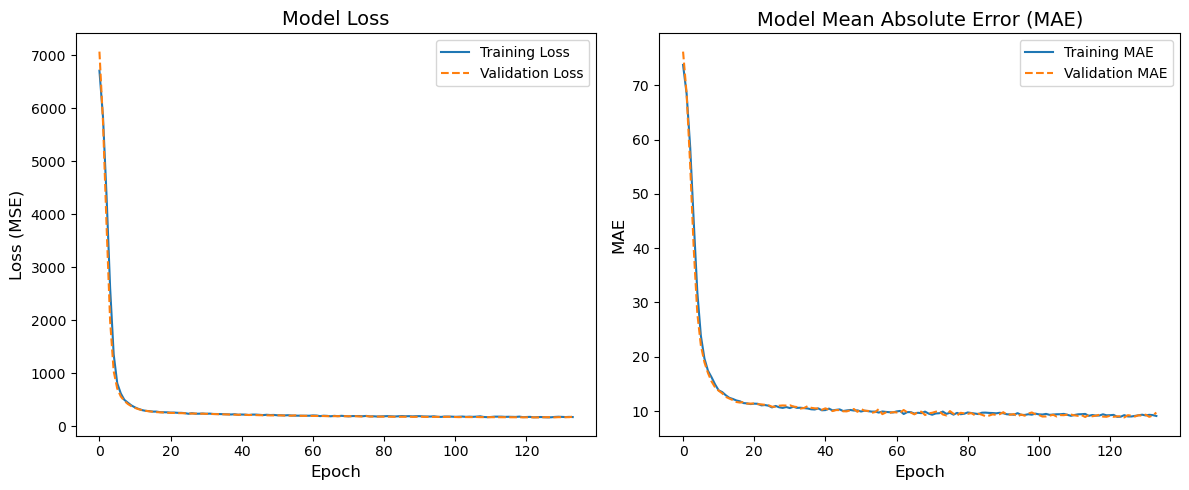

In [575]:
import matplotlib.pyplot as plt

# Validate that the keys exist in history object
if 'loss' in history.history and 'val_loss' in history.history and 'mean_absolute_error' in history.history and 'val_mean_absolute_error' in history.history:
    plt.figure(figsize=(12, 5))

    # Plot Loss
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss', linestyle='--')
    plt.title('Model Loss', fontsize=14)
    plt.xlabel('Epoch', fontsize=12)
    plt.ylabel('Loss (MSE)', fontsize=12)
    plt.legend(fontsize=10)

    # Plot Mean Absolute Error (MAE)
    plt.subplot(1, 2, 2)
    plt.plot(history.history['mean_absolute_error'], label='Training MAE')
    plt.plot(history.history['val_mean_absolute_error'], label='Validation MAE', linestyle='--')
    plt.title('Model Mean Absolute Error (MAE)', fontsize=14)
    plt.xlabel('Epoch', fontsize=12)
    plt.ylabel('MAE', fontsize=12)
    plt.legend(fontsize=10)

    # Adjust layout
    plt.tight_layout()
    plt.show()
else:
    print("One or more keys (loss, val_loss, mean_absolute_error, val_mean_absolute_error) are missing in history.history.")


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


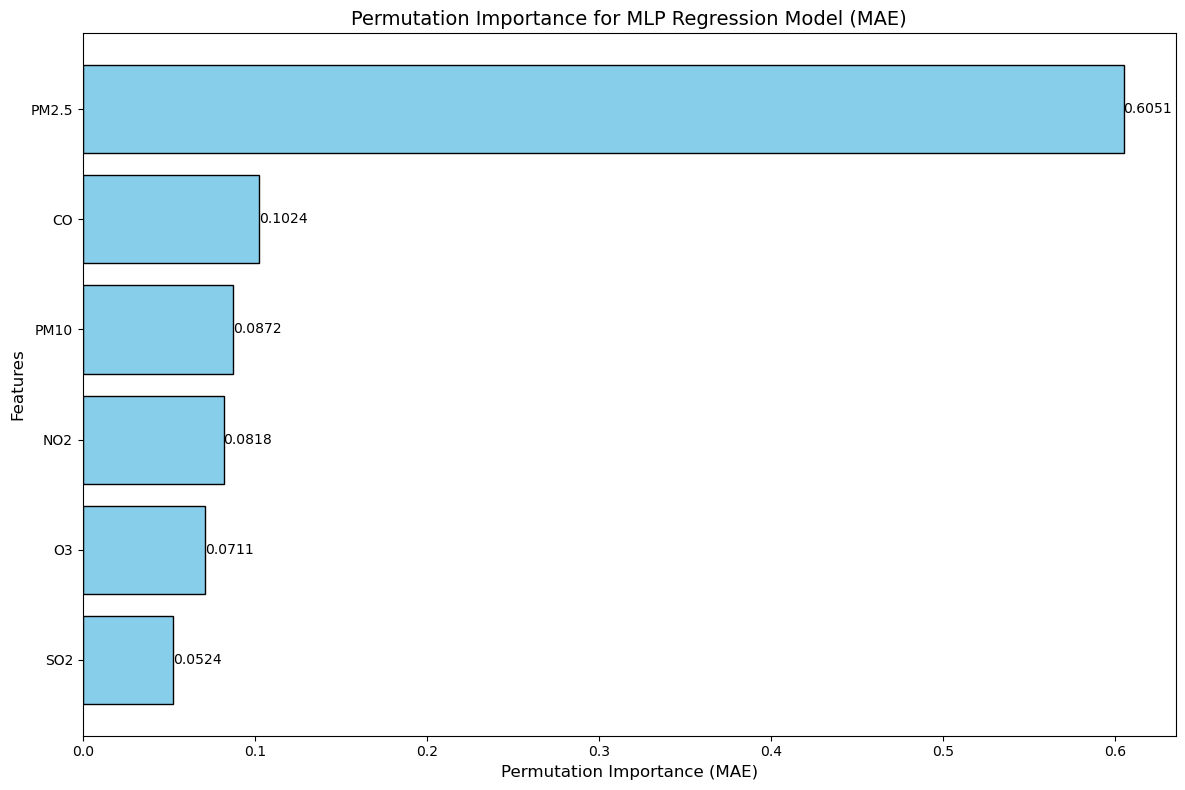

Permutation Importance values (based on MAE):
PM2.5: 0.6051
CO: 0.1024
PM10: 0.0872
NO2: 0.0818
O3: 0.0711
SO2: 0.0524


In [577]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_absolute_error
import pandas as pd

# Custom scoring function for the Keras model (based on MAE)
def keras_scoring_mae(model, X, y):
    y_pred = model.predict(X).flatten()
    return -mean_absolute_error(y, y_pred)

# Evaluate the permutation importance with a custom scoring function (MAE)
r = permutation_importance(model, X_test_mpl_r, y_test_mpl_r, scoring=keras_scoring_mae, n_repeats=10, random_state=42)

# Assuming your original DataFrame is named df
feature_names = df[['CO', 'O3', 'NO2', 'SO2', 'PM10', 'PM2.5']].columns

# Normalize the permutation importance to ensure they sum to 1
normalized_importances = r.importances_mean / np.sum(r.importances_mean)

# Create a DataFrame for displaying normalized feature importances
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Normalized Importance': normalized_importances
}).sort_values(by='Normalized Importance', ascending=False)

# Plot normalized feature importances
plt.figure(figsize=(12, 8))
bars = plt.barh(range(len(feature_importance_df)), feature_importance_df['Normalized Importance'], color='skyblue', edgecolor='black')
plt.yticks(range(len(feature_importance_df)), feature_importance_df['Feature'])
plt.gca().invert_yaxis()  # Most important feature at the top

# Add normalized importance values on each bar
for bar, importance in zip(bars, feature_importance_df['Normalized Importance']):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, 
             f'{importance:.4f}', ha='left', va='center', fontsize=10)

# Formatting
plt.xlabel('Permutation Importance (MAE)', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.title('Permutation Importance for MLP Regression Model (MAE)', fontsize=14)
plt.tight_layout()
plt.show()

# Print the normalized permutation importance values
print("Permutation Importance values (based on MAE):")
for index, row in feature_importance_df.iterrows():
    print(f"{row['Feature']}: {row['Normalized Importance']:.4f}")

In [549]:
# Save the final model
model.save("final_mlp_model_regresion.keras")
print("Final model saved as 'final_mlp_model_regresion.keras'")

Final model saved as 'final_mlp_model_regresion.keras'


In [564]:
import joblib

# Save the model as a pickle file
joblib.dump(model, 'best_mlp_regression_model.pkl')

print("Model saved as pickle file: best_mlp_regression_model.pkl")

Model saved as pickle file: best_mlp_regression_model.pkl


# Conclusion

Conclusion
Dominance of PM2.5: Across all models, PM2.5 consistently emerges as the most critical feature, emphasizing its direct impact on air quality and human health.
Consistency Across Models: Gradient Boosting and MLP models align in identifying PM2.5, CO, NO2, PM10, O3, and SO2 as key contributors, reflecting the robustness of feature importance analysis.
Model Performance:
•	Gradient Boosting outperformed others in both regression (MAE: 4.576557) and classification (Accuracy: 0.9426), highlighting its suitability for AQI tasks.
•	MLP models demonstrated competitive performance with flexibility in feature importance.
________________________________________
Recommendations and Future Work
Target PM2.5 in Interventions:
•	Focus regulatory measures and public health campaigns on reducing PM2.5 levels, as it is the most impactful feature across all models.
Feature Engineering:
•	Incorporate meteorological factors such as temperature, humidity, and wind speed to improve predictions. These factors often influence pollutant dispersion and concentration.
Regionalized Models:
•	Develop separate models for specific regions to account for localized factors like traffic density, industrial activities, and seasonal trends.
Model Combination:
•	Use ensemble approaches (e.g., stacking Gradient Boosting and MLP models) to leverage the strengths of both models for robust predictio
